In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/usr/local/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Function for numeric data
class Num_check():
    
    def __init__(self, df, col):
        self.df = df
        self.col = col

#     def num_removeOutlier(data):
#         data = np.array(data)
#         mean = np.mean(data, axis=0)
#         std = np.std(data, axis=0)
#         final_list = [x for x in data if (x > mean - 2 * std)]
#         final_list = [x for x in final_list if (x < mean + 2 * std)]
#         return final_list


    def num_find_outliers(self):
        outlier_df = self.df[np.abs(self.df[self.col] - self.df[self.col].mean()) > 2 * self.df[self.col].std()]
        return outlier_df
        print('Outlier df shape: {}'.format(outlier_df.shape))
    
    def num_dist(self):
        x = self.df[self.col]
        sns.distplot(x, hist=False, rug=True);
        
    def num_count_null_check(self):
        print("Count: {}\nNull:  {}\nPCT:   {}\n".format(self.df[self.col].count(), self.df[self.col].isnull().sum(), 
                                                100 * self.df[self.col].isnull().sum()/
                                                     (self.df[self.col].count()+ self.df[self.col].isnull().sum())))
    def max_min_check(self):
        print("Maximum: {}\nMinimum: {}\n".format(self.df[self.col].max(), self.df[self.col].min()))
                

In [3]:
# Function for categorical data
class Cat_check():
    def __init__(self, df, col):
        self.df = df
        self.col = col

    def cat_count_null_check(self):
        print("Count: {}\nNull:  {}\nPCT:   {}\n".format(self.df[self.col].count(), self.df[self.col].isnull().sum(), 
                                                100 * self.df[self.col].isnull().sum()/
                                                     (self.df[self.col].count()+ self.df[self.col].isnull().sum())))
        

    def cat_unique_value_dist(self):
        plt.rcParams['figure.figsize'] = (40,20)
        self.df[self.col].value_counts().plot(kind='bar')

    def cat_top_last_10(self):
        Top_10_job_title = self.df[self.col].value_counts().head(10)
        Last_10_job_title = self.df[self.col].value_counts().tail(10)
        print('Top  10:\n{}\n\nLast 10:\n{}\n'.format(Top_10_job_title, Last_10_job_title))

In [4]:
# Function for datetime data
class Date_check():
    
    def __init__(self, df, col):
        self.df = df
        self.col = col
    
    def bin_dist(self):
        # Create bin edges 
        step_size = (self.df[self.col].dt.to_period('M').astype(int).max() - 
                     self.df[self.col].dt.to_period('M').astype(int).min())
        bin_edges = pd.date_range(start=self.df[self.col].dt.to_period('M').min(),                                 
                                  periods=5, freq='M').tolist()
        print(bin_edges)
        plt.hist(self.df[self.col].dt.year, bins=bin_edges, edgecolor="k")
        plt.xticks(bins)
        plt.show()

    def num_count_null_check(self):
        print("Count: {}\nNull:  {}\nPCT:   {}\n".format(self.df[self.col].count(), self.df[self.col].isnull().sum(), 
                                                100 * self.df[self.col].isnull().sum()/
                                                     (self.df[self.col].count()+ self.df[self.col].isnull().sum())))
    def max_min_check(self):
        print("Maximum: {}\nMinimum: {}\n".format(self.df[self.col].max(), self.df[self.col].min()))
        
    def group_year_week(self):
        print(custdemo.groupby([self.df[self.col].dt.year, self.df[self.col].dt.week]).size())
        

# Task 1 - Requestment

<img src='Task1_required.png'>

---

# Check Dataset Quality
* __Data Quality Framework Table__

<img src='Data_Quality_Framework.png'>

---

# __CustomerDemographic__

__DataFrame__

In [5]:
custdemo = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerDemographic', 
                             skiprows = 1, header=0)
custdemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,1;DROP TABLE users,No,6.0
1,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,No,5.0
2,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,N,á,No,16.0
3,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,N,á,Yes,17.0
4,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,N,ì¬íê³¼íì ì´íì°êµ¬ì,Yes,8.0


__Dataset Overview__

In [6]:
custdemo.dtypes

customer_id                                     int64
first_name                                     object
last_name                                      object
gender                                         object
past_3_years_bike_related_purchases             int64
DOB                                    datetime64[ns]
job_title                                      object
job_industry_category                          object
wealth_segment                                 object
deceased_indicator                             object
default                                        object
owns_car                                       object
tenure                                        float64
dtype: object

In [7]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [8]:
custdemo.describe(include='all')

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
count,4000.000000,4000,3875,4000,4000.000000,3913,3494,3344,4000,4000,3698.0,4000,3913.000000
unique,NaN,3139,3725,6,NaN,3448,195,9,3,2,90.0,2,NaN
top,NaN,Max,Ramsdell,Female,NaN,1978-01-30 00:00:00,Business Systems Development Analyst,Manufacturing,Mass Customer,N,100.0,Yes,NaN
freq,NaN,5,3,2037,NaN,7,45,799,2000,3998,113.0,2024,NaN
first,NaN,NaN,NaN,NaN,NaN,1843-12-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2002-03-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2000.500000,NaN,NaN,NaN,48.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.657041
std,1154.844867,NaN,NaN,NaN,28.715005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.660146
min,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
25%,1000.750000,NaN,NaN,NaN,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.000000


__Missing Value Check__

In [9]:
custdemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

## Columns Check
---

### 1. DOB (dtype: date, missing value: 87)

In [10]:
print ('Minimum Date: {}\nMaximum Date: {}'.format(custdemo.DOB.min(),custdemo.DOB.max()))

Minimum Date: 1843-12-21 00:00:00
Maximum Date: 2002-03-11 00:00:00


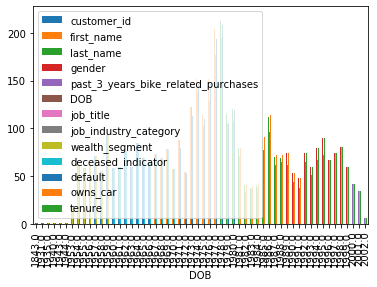

In [11]:
custdemo.groupby(custdemo.DOB.dt.year).count().plot(kind="bar")

(array([1.000e+00, 0.000e+00, 5.000e+00, 3.825e+03, 8.200e+01]),
 array([1800, 1850, 1900, 1950, 2000, 2050]),
 <a list of 5 Patch objects>)

([<matplotlib.axis.XTick at 0x1207d28d0>,
 <a list of 6 Text xticklabel objects>)

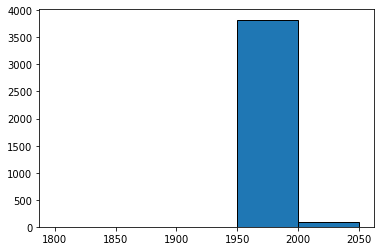

In [12]:
bins= [1800, 1850, 1900, 1950, 2000, 2050]
plt.hist(custdemo.DOB.dt.year, bins=bins, edgecolor="k")
plt.xticks(bins)
plt.show()

Text(0, 0.5, 'pct')

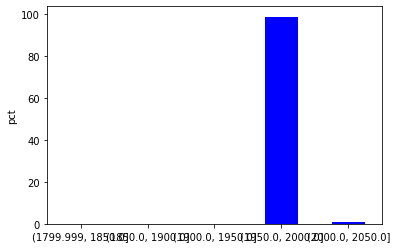

In [13]:
out = pd.cut(custdemo.DOB.dt.year, bins=bins, include_lowest=True)
out_norm = out.value_counts(sort=False, normalize=True).mul(100)
ax = out_norm.plot.bar(rot=0, color="b", figsize=(6,4))
plt.ylabel("pct")
plt.show()

In [14]:
pd.options.display.max_rows = 4000
custdemo.groupby([custdemo.DOB.dt.year, custdemo.DOB.dt.week]).size()

DOB     DOB 
1843.0  51.0     1
1931.0  43.0     1
1935.0  34.0     1
1940.0  38.0     1
1943.0  32.0     1
1944.0  4.0      1
1953.0  32.0     1
        34.0     1
        36.0     2
        37.0     2
        38.0     1
        41.0     1
        42.0     2
        43.0     2
        45.0     1
        46.0     1
        47.0     1
        48.0     1
        49.0     1
        50.0     1
        53.0     1
1954.0  1.0      1
        2.0      1
        3.0      2
        4.0      1
        6.0      3
        7.0      2
        8.0      1
        10.0     1
        11.0     1
        12.0     3
        15.0     1
        17.0     3
        18.0     2
        19.0     3
        21.0     1
        24.0     1
        25.0     3
        26.0     1
        27.0     1
        28.0     1
        29.0     1
        33.0     5
        34.0     2
        35.0     2
        37.0     1
        38.0     2
        39.0     1
        40.0     2
        43.0     4
        44.0     2
        47.0     1

### Problem Summary - DOB
| Problem  | Solution  |   
|---|---|
|Contain 87 missing values   | Filled the missing cells by the most frequent date  |
|One outlier (1843)  | Drop it  |


### 2. job_title  (dtype: object, missing value: 506)

Count: 3494
Null:  506
PCT:   12.65

Top  10:
Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Legal Assistant                         41
Recruiting Manager                      41
General Manager                         40
Associate Professor                     39
Structural Engineer                     39
Desktop Support Technician              38
Name: job_title, dtype: int64

Last 10:
Database Administrator II       4
Geologist II                    4
Database Administrator I        4
Computer Systems Analyst III    4
Programmer Analyst IV           4
Administrative Assistant II     4
Health Coach I                  3
Research Assistant III          3
Health Coach III                3
Developer I                     1
Name: job_title, dtype: int64



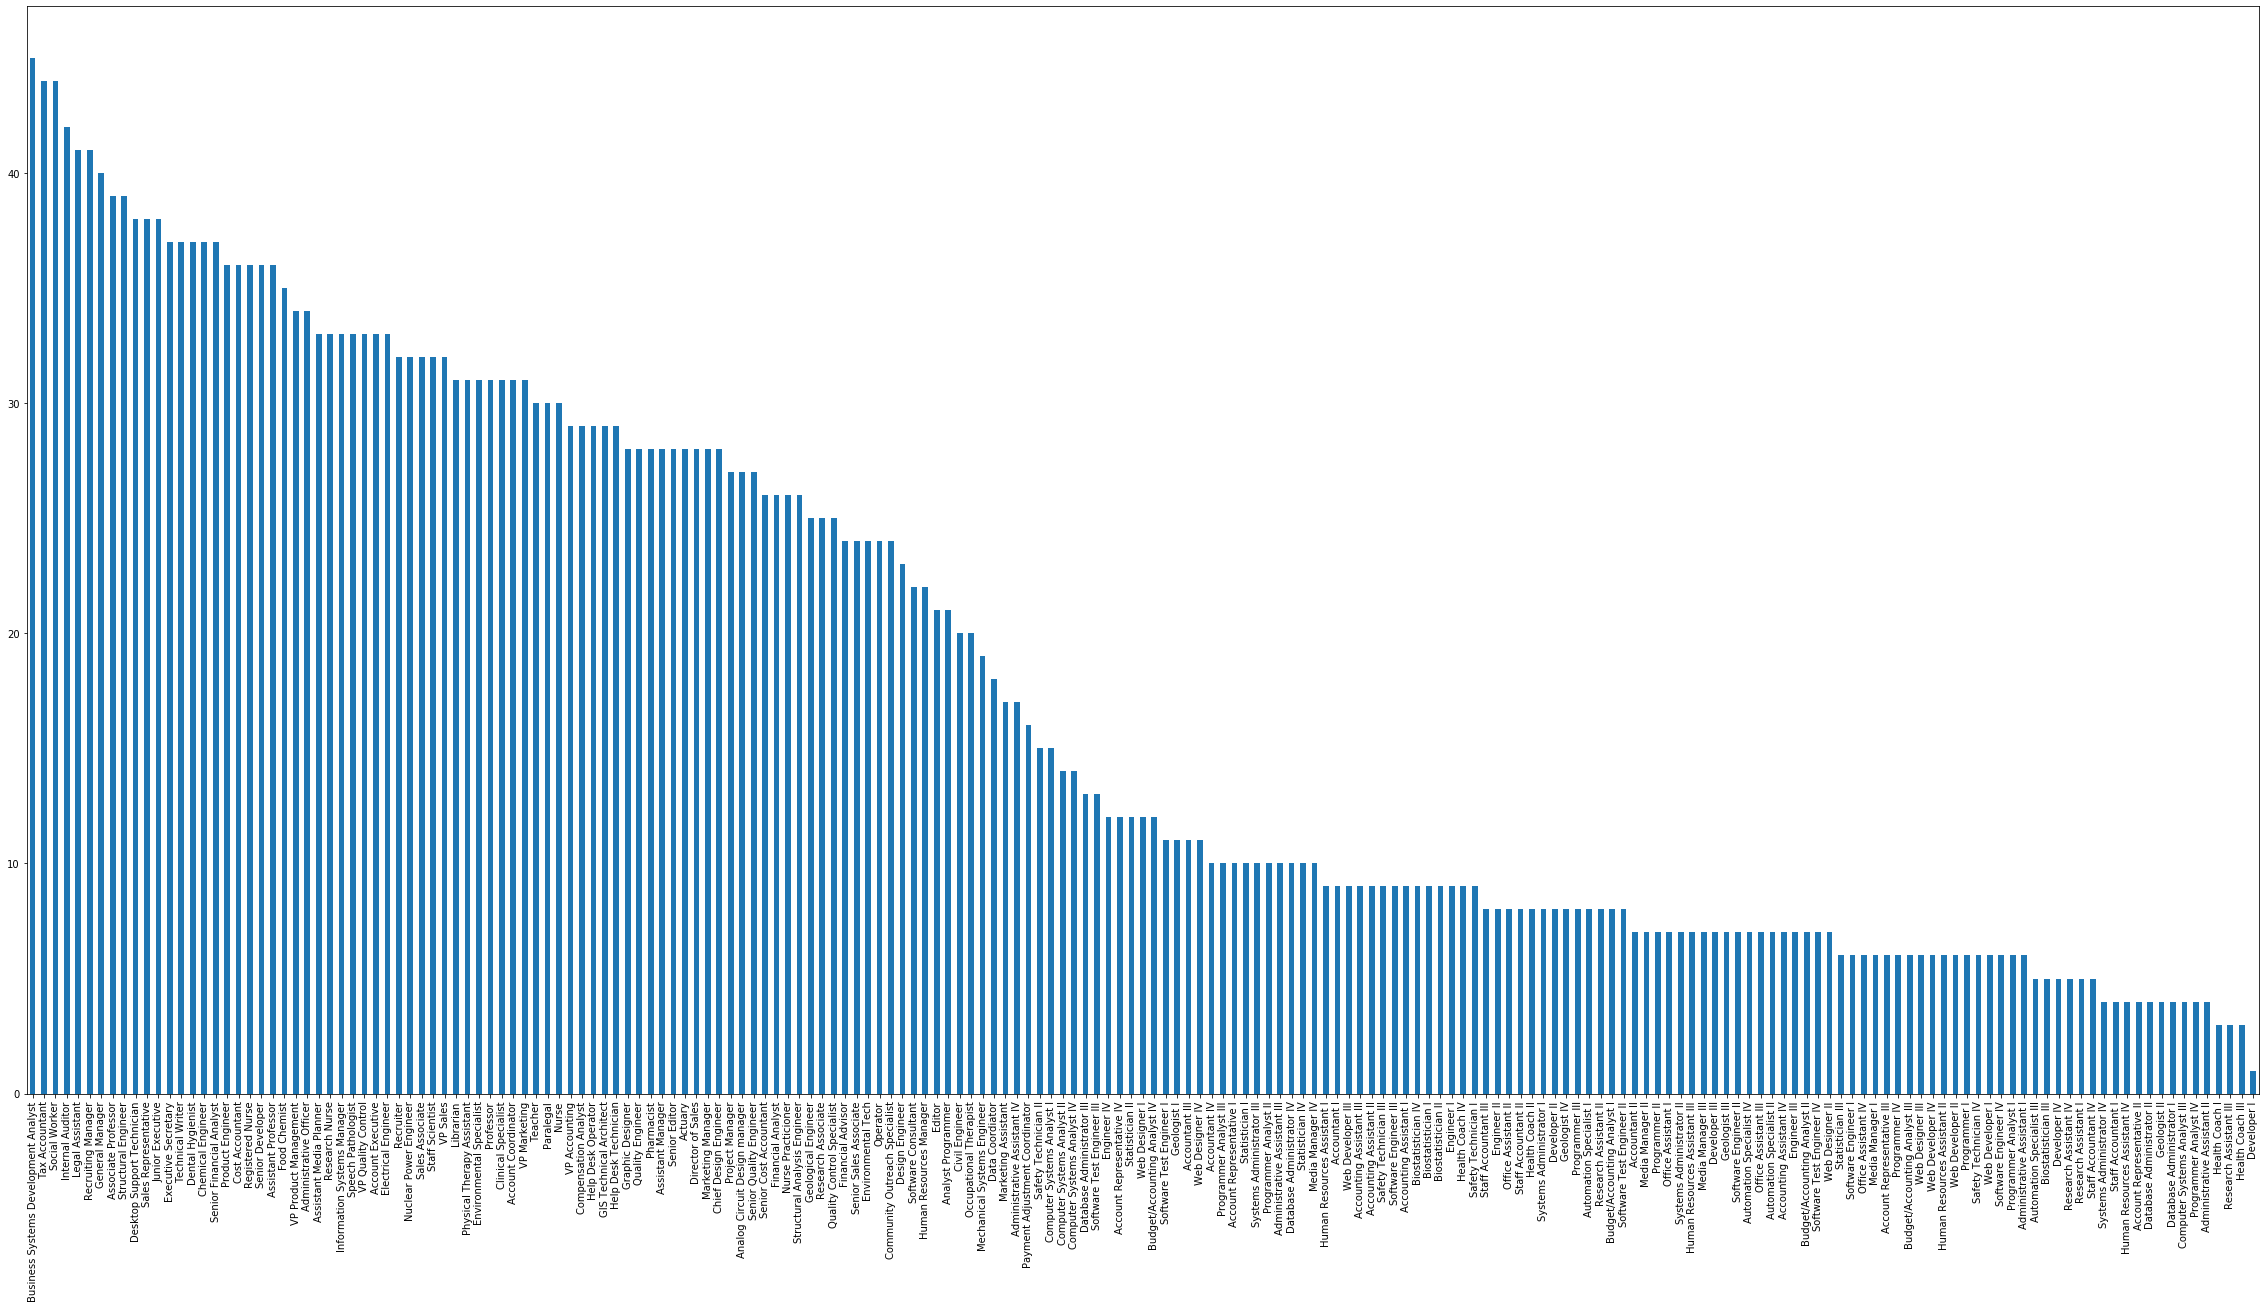

In [15]:
job_title= Cat_check(custdemo, 'job_title')

public_method_names = [method for method in dir(job_title) if callable(getattr(job_title, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(job_title, method)()  # call

### Problem Summary - job_title
| Problem  | Solution  |   
|---|---|
|Contain 506 missing values   | Filled the missing cells by the 'UNKNOW' Label  |


### 3. job_industry_category   (dtype: object, missing value: 656)

Count: 3344
Null:  656
PCT:   16.4

Top  10:
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

Last 10:
Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64



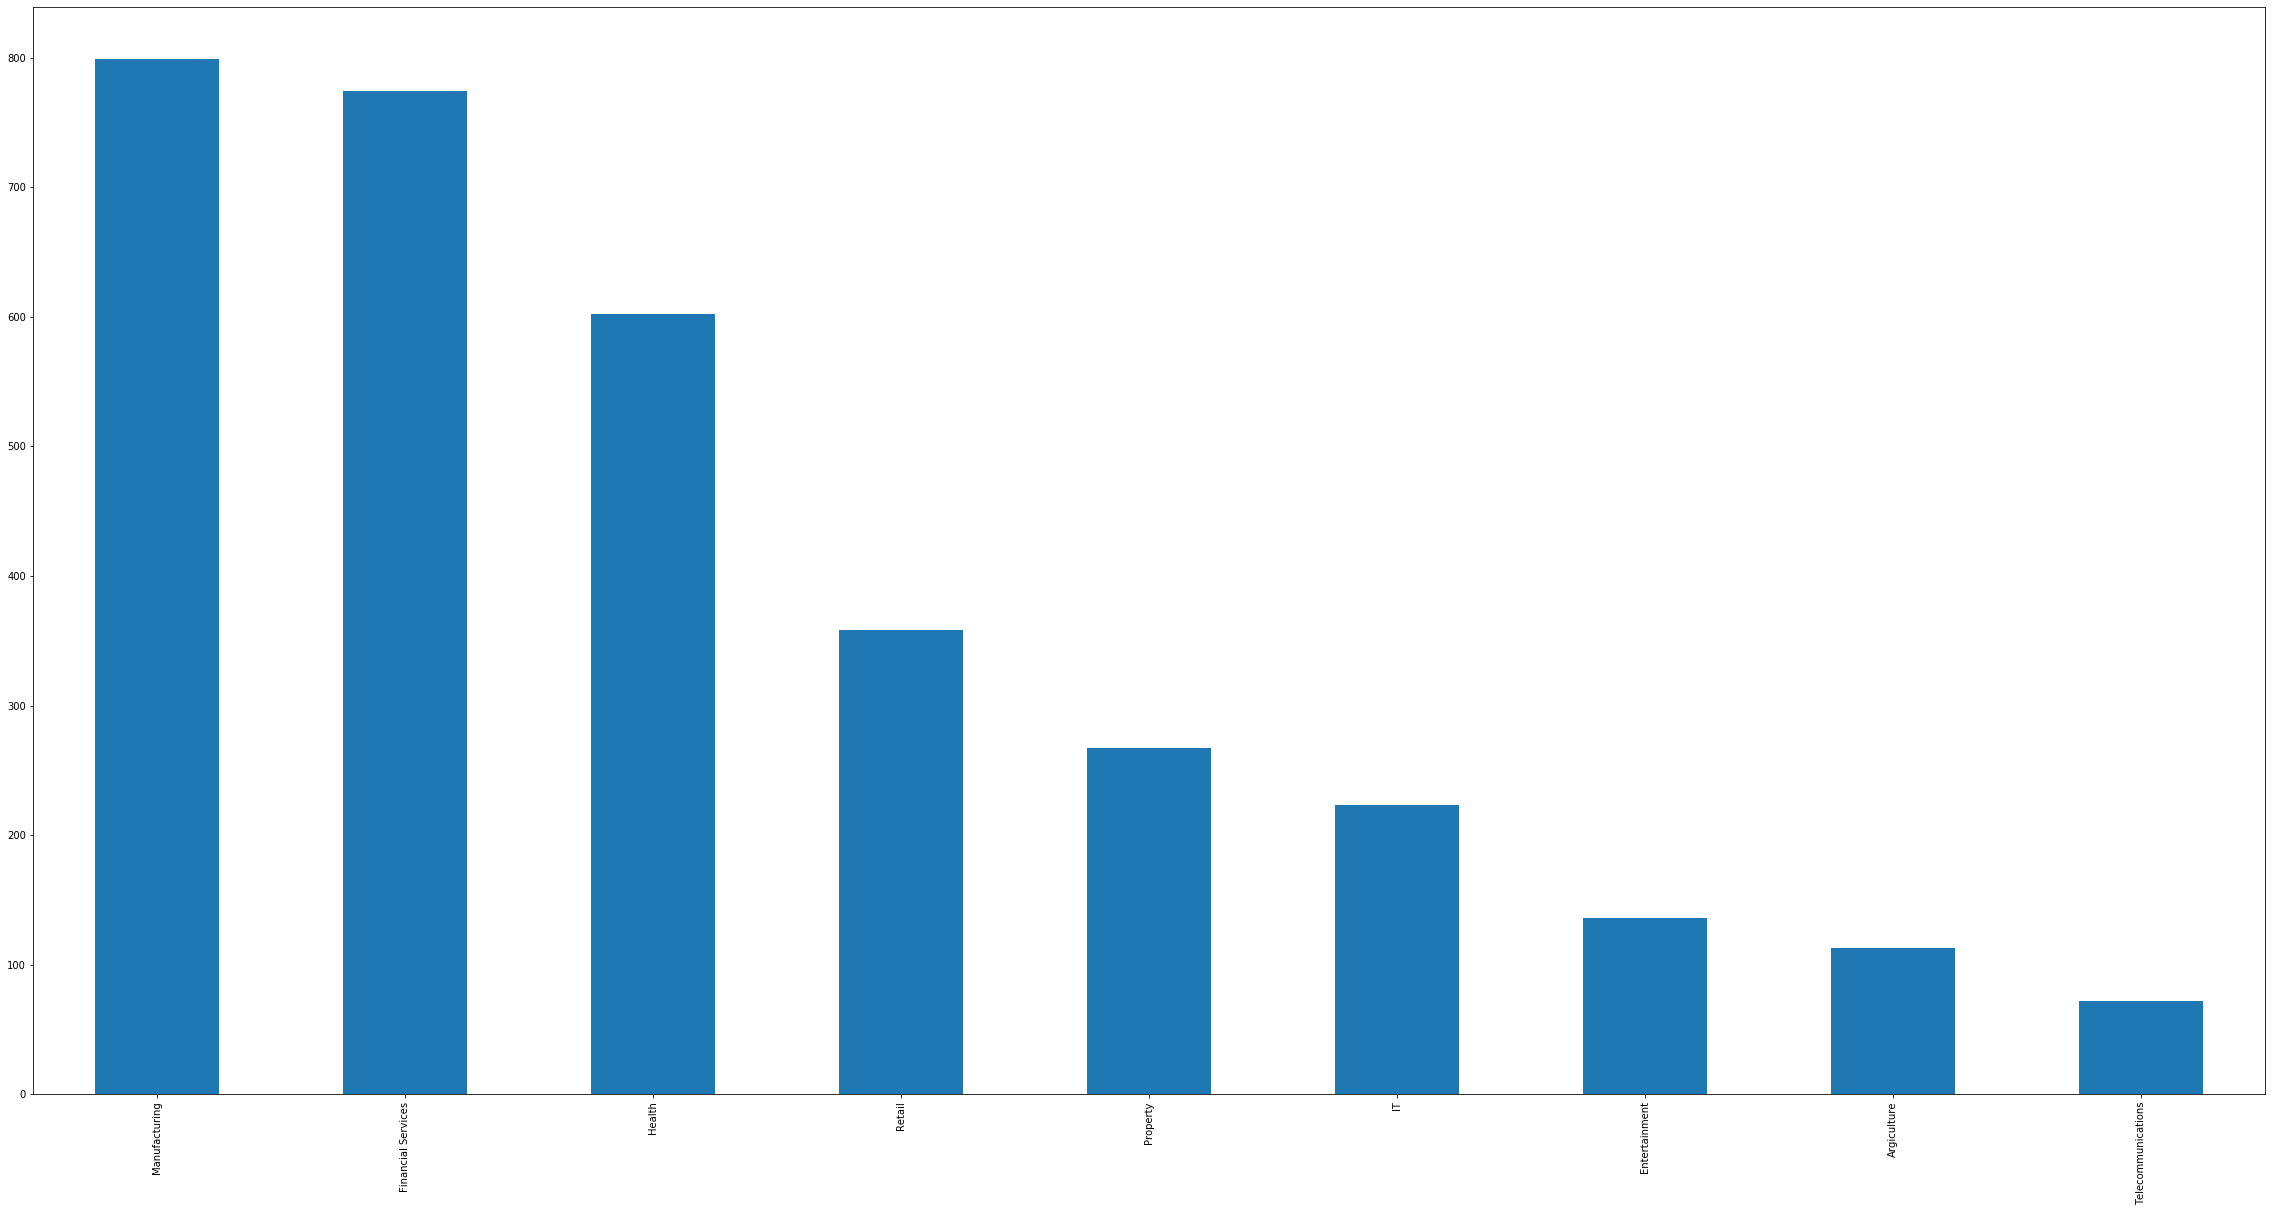

In [16]:
job_industry_category= Cat_check(custdemo, 'job_industry_category')

public_method_names = [method for method in dir(job_industry_category) if callable(getattr(job_industry_category, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(job_industry_category, method)()  # call

### Problem Summary - job_industry_category
| Problem  | Solution  |   
|---|---|
|Contain 656 missing values   | Filled the missing cells by the 'UNKNOW' Label  |


### 4. wealth_segment   (dtype: object, missing value: 0)

In [17]:
custdemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

Count: 4000
Null:  0
PCT:   0.0

Top  10:
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

Last 10:
Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64



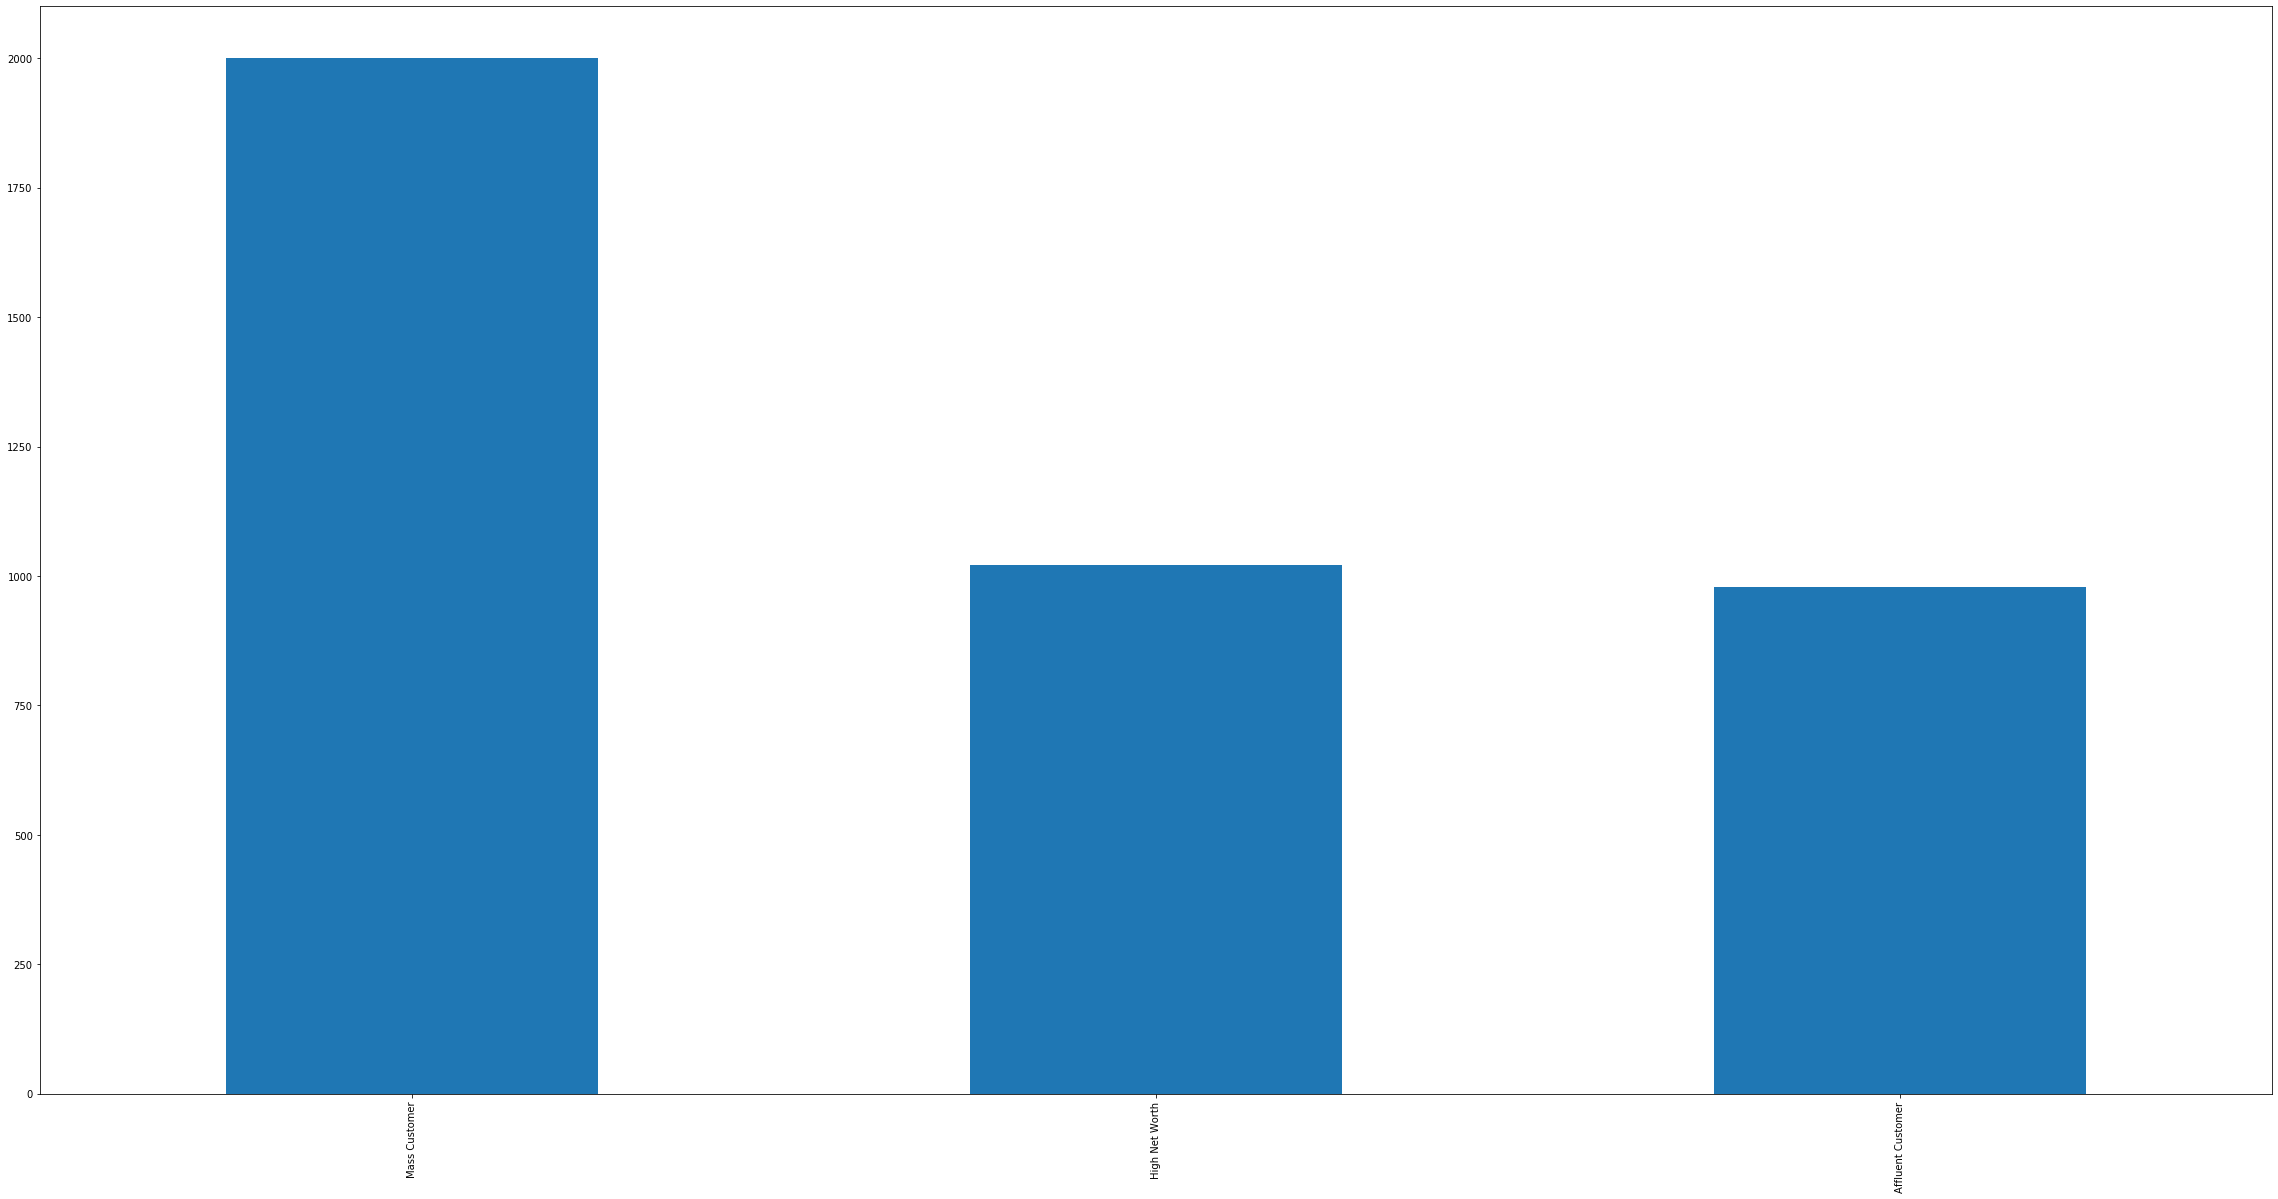

In [18]:
wealth_segment= Cat_check(custdemo, 'wealth_segment')

public_method_names = [method for method in dir(wealth_segment) if callable(getattr(wealth_segment, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(wealth_segment, method)()  # call

### 4. wealth_segment   (dtype: object, missing value: 0)

Count: 4000
Null:  0
PCT:   0.0

Top  10:
N    3998
Y       2
Name: deceased_indicator, dtype: int64

Last 10:
N    3998
Y       2
Name: deceased_indicator, dtype: int64



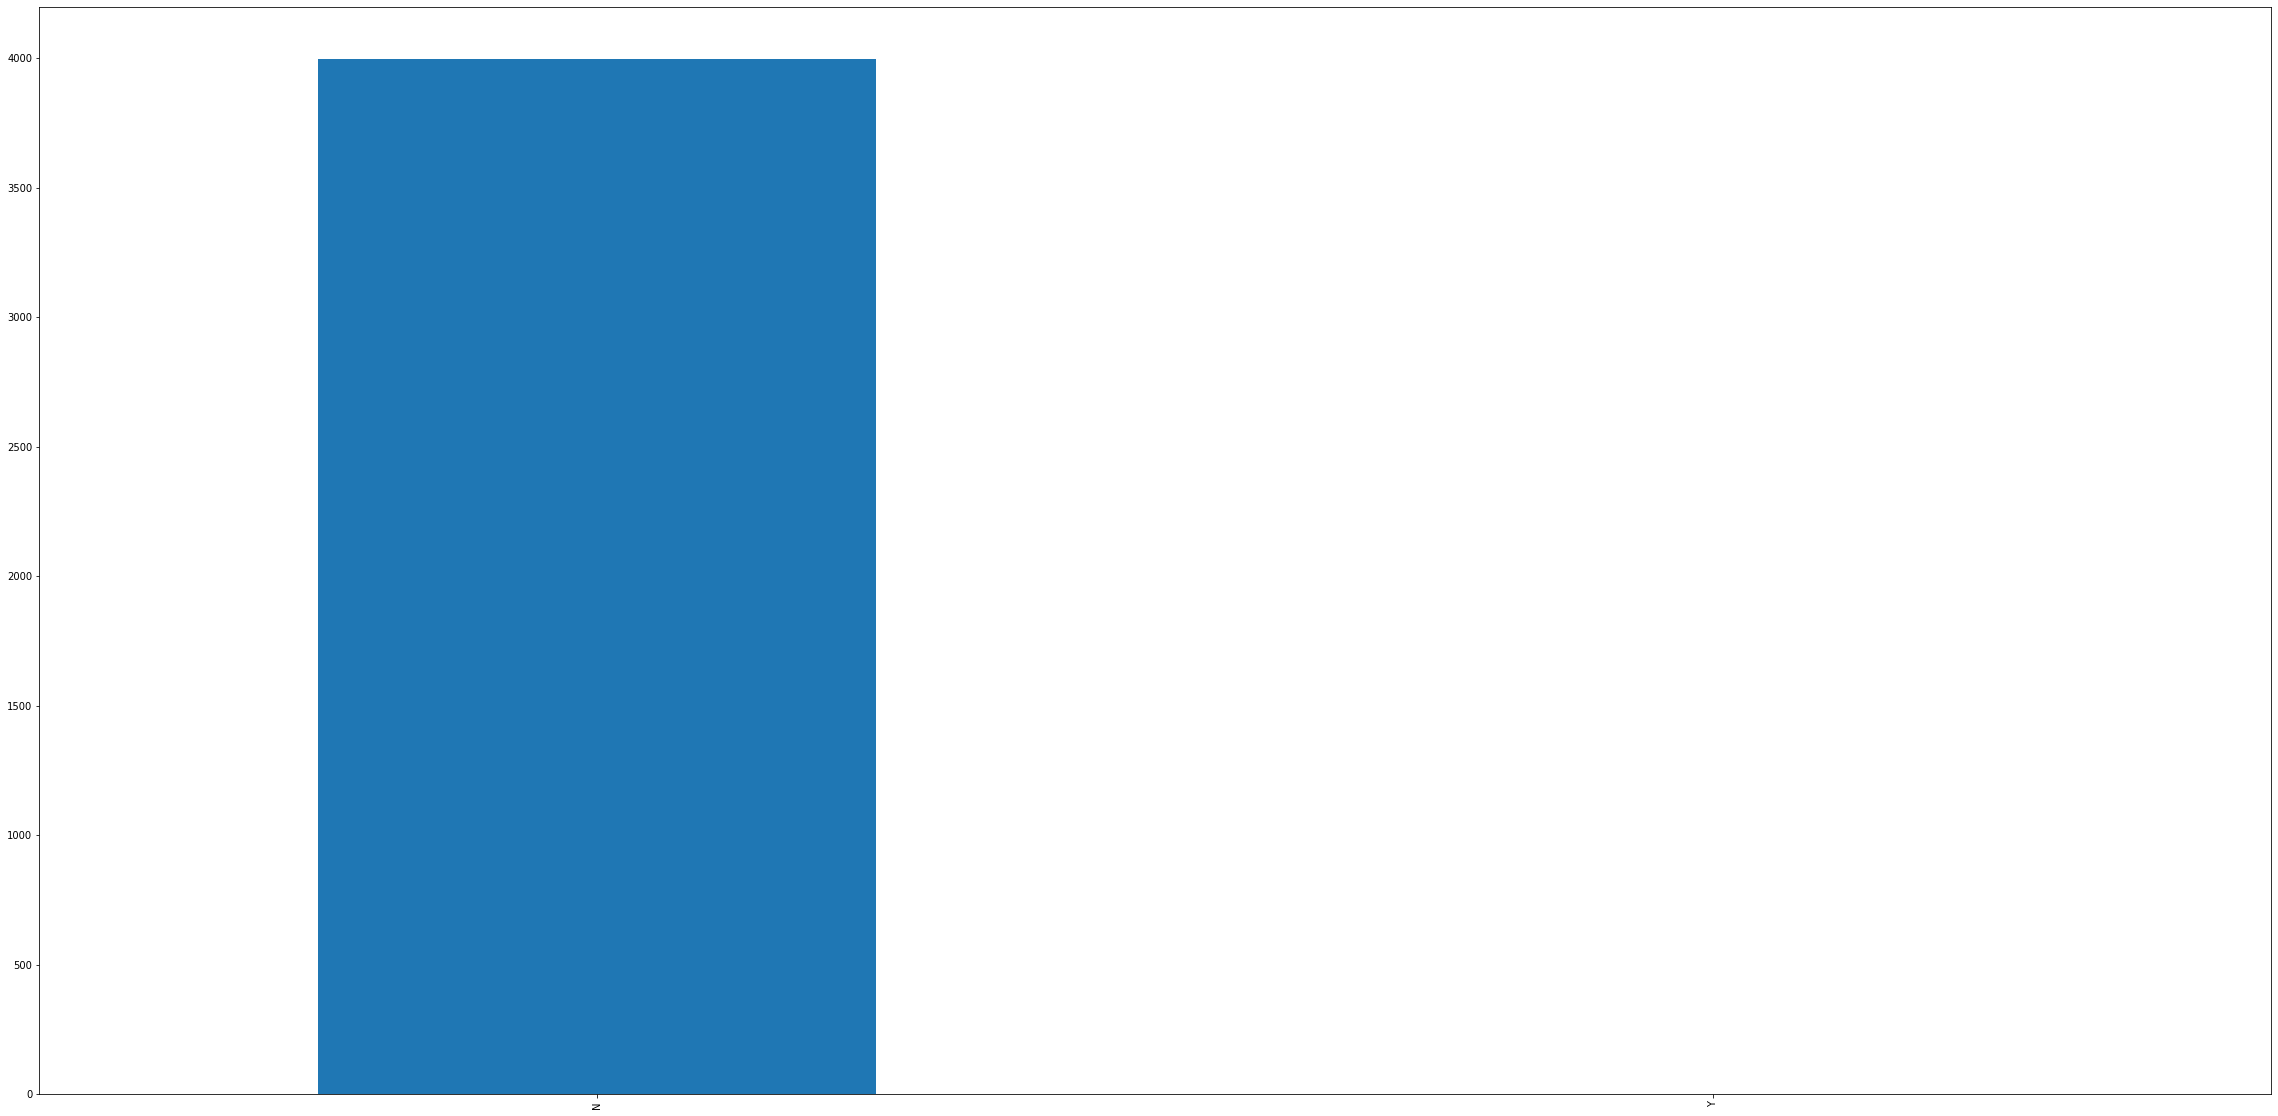

In [19]:
deceased_indicator= Cat_check(custdemo, 'deceased_indicator')

public_method_names = [method for method in dir(wealth_segment) if callable(getattr(deceased_indicator, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(deceased_indicator, method)()  # call

### 5. default   (dtype: object, missing value: 0)

In [20]:
custdemo.default.nunique()

90

Count: 3698
Null:  302
PCT:   7.55

Top  10:
100                                               113
1                                                 112
-1                                                111
-100                                               99
â°â´âµâââ                                          53
Ù¡Ù¢Ù£                                             53
ï½ï½¨(Â´âï½â©                                      52
../../../../../../../../../../../etc/passwd%00     50
â°â´âµ                                             48
!@#$%^&*()                                         48
Name: default, dtype: int64

Last 10:
-0.5                                      32
<img src=x onerror=alert('hi') />         31
ç¤¾æç§å­¸é¢èªå­¸ç ç©¶æ                    31
'"''''"                                   31
ð¾ ð ð ð ð ð ð ð                          31
testâ testâ«                              31
/dev/null; touch /tmp/blns.fail ; echo    30
âªâªtestâª                                29
ì¸ëë°í ë¥´       

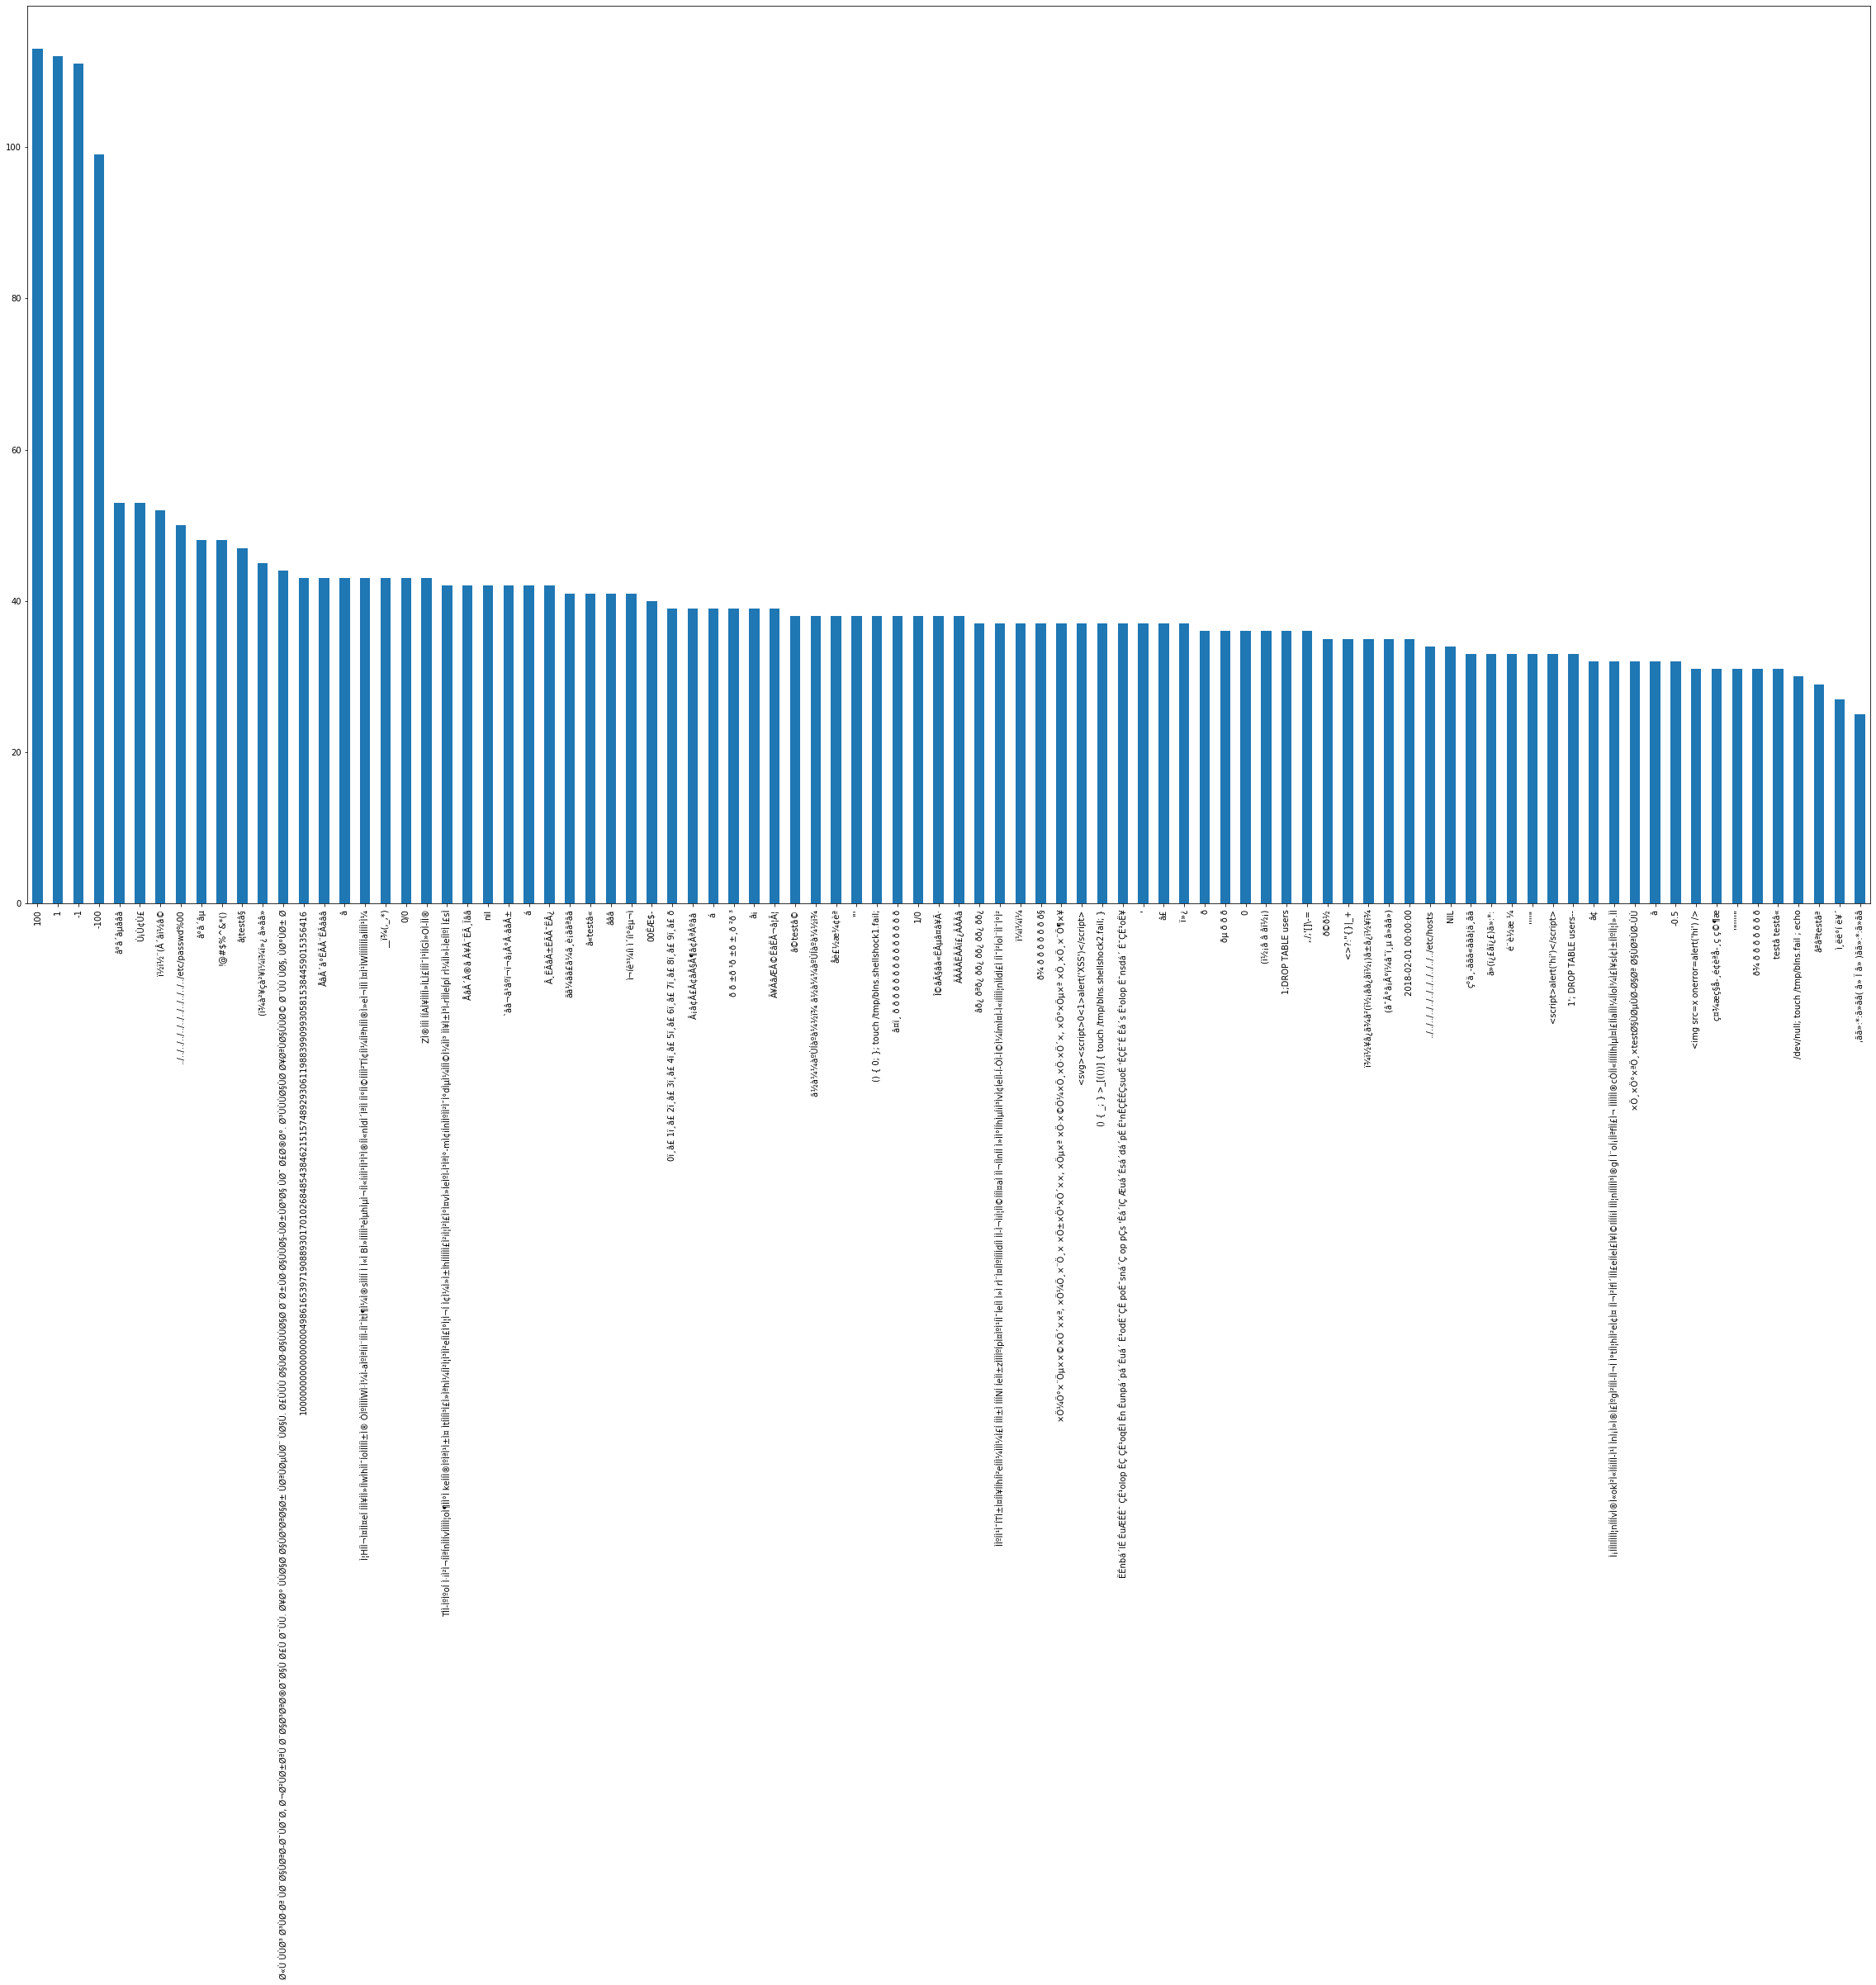

In [21]:
default= Cat_check(custdemo, 'default')

public_method_names = [method for method in dir(default) if callable(getattr(default, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(default, method)()  # call

### Problem Summary - default
| Problem  | Solution  |   
|---|---|
|The columns contains unreadble data. | Discuss with client, need more details or asking whether can drop or not  |

### 6. owns_car   (dtype: object, missing value: 0)

Count: 4000
Null:  0
PCT:   0.0

Top  10:
Yes    2024
No     1976
Name: owns_car, dtype: int64

Last 10:
Yes    2024
No     1976
Name: owns_car, dtype: int64



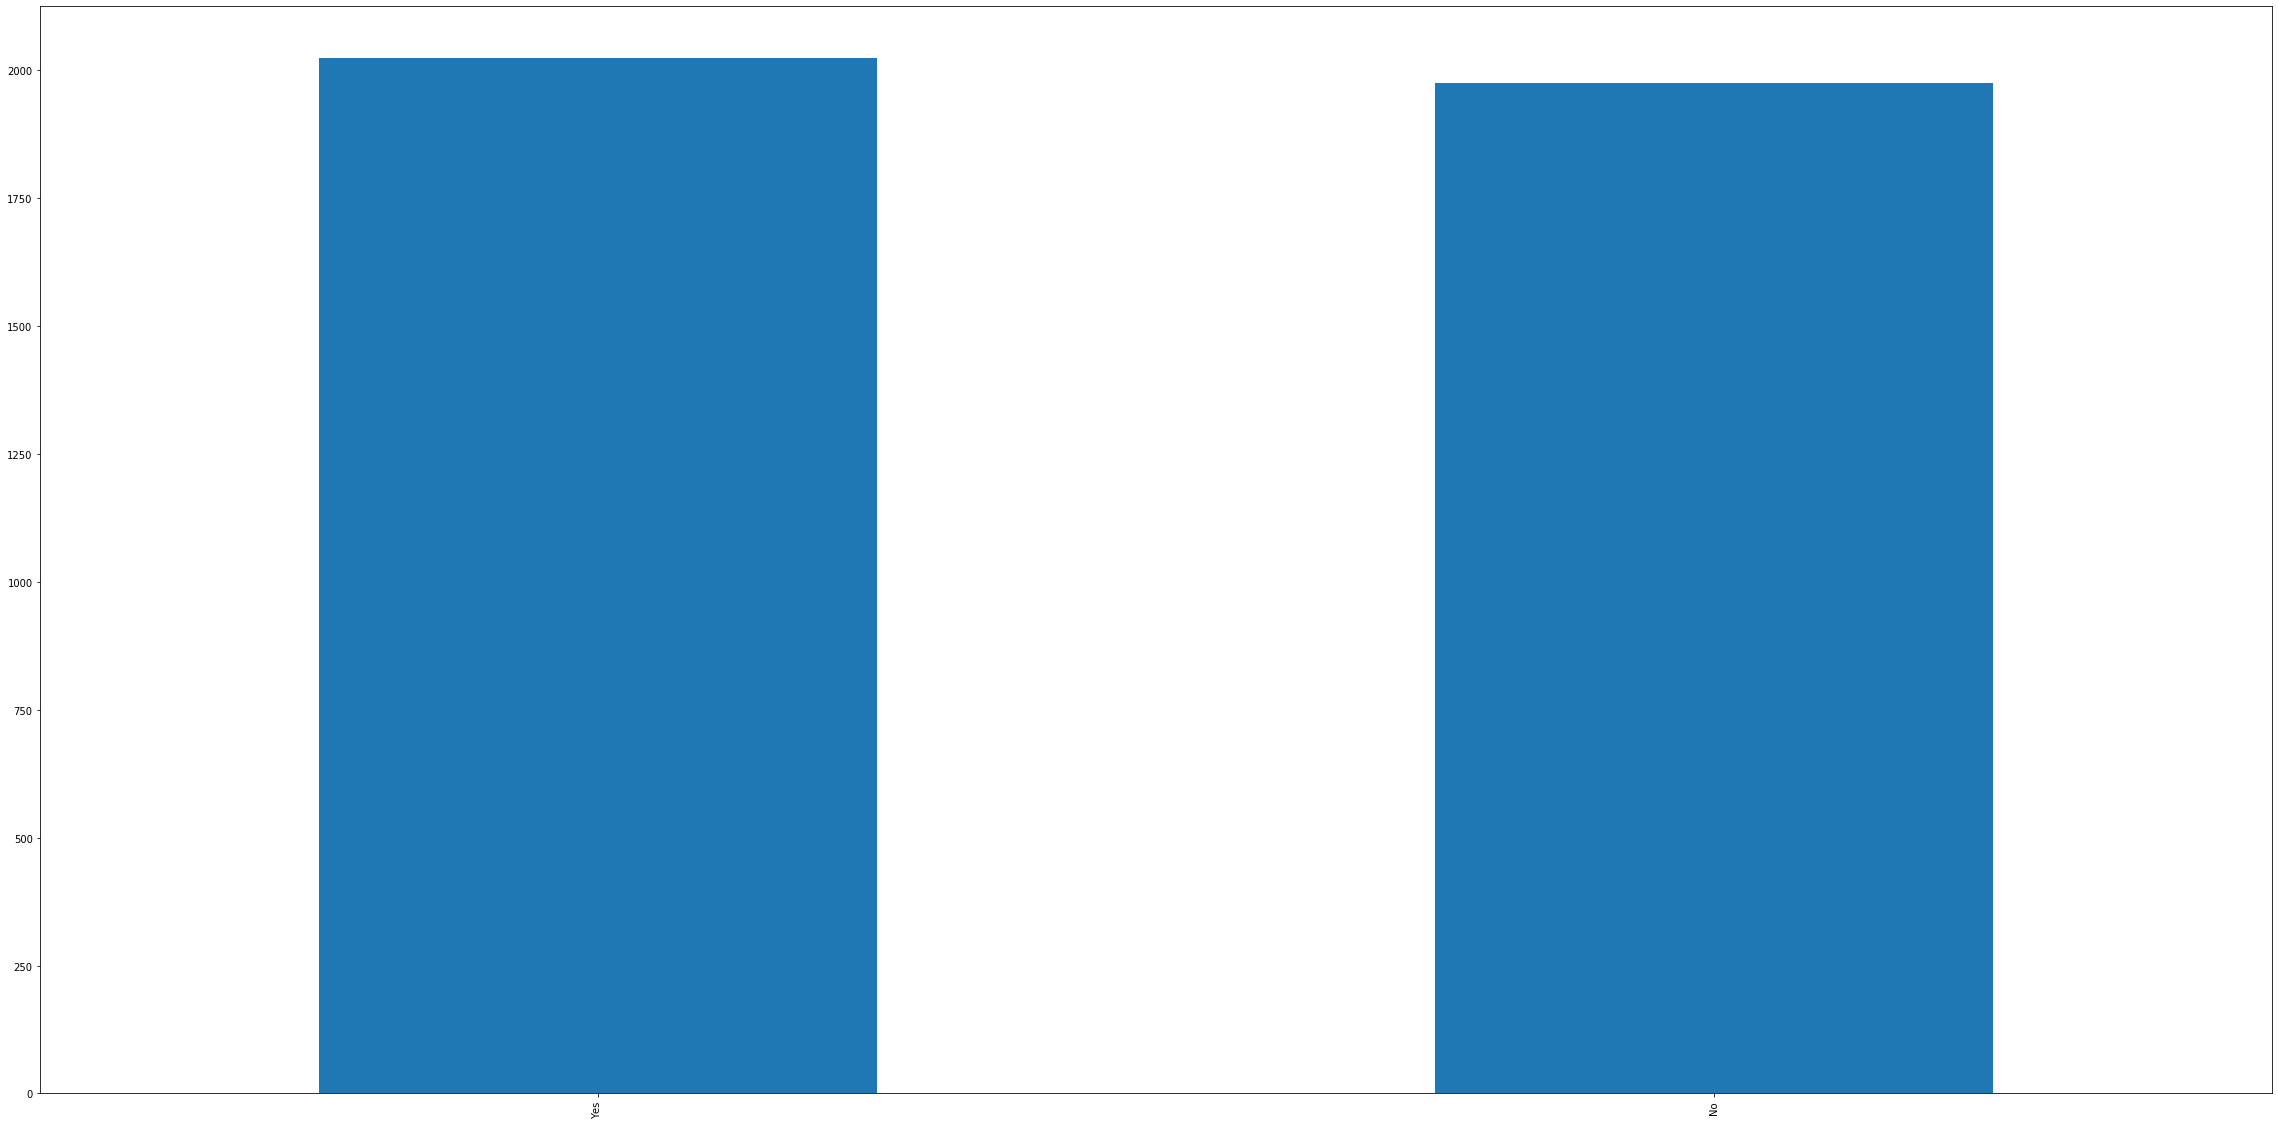

In [22]:
owns_car= Cat_check(custdemo, 'owns_car')

public_method_names = [method for method in dir(owns_car) if callable(getattr(owns_car, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(owns_car, method)()  # call

### 7. tenure   (dtype: float, missing value: 87)

Maximum: 22.0
Minimum: 1.0

Count: 3913
Null:  87
PCT:   2.175



/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1348,595,Nikola,Jeanon,Male,72,1973-05-12,VP Marketing,Financial Services,Mass Customer,N,á,No,22.0
1388,3404,Thomasine,McCloch,Female,2,1973-08-01,GIS Technical Architect,Property,Affluent Customer,N,â,No,22.0
1480,484,Mason,Kohrsen,Male,64,1974-04-24,Programmer IV,Manufacturing,Mass Customer,N,TÌÌ­ÌºÌºoÍ Ì·iÌ²Ì¬ÍÌªÍnÌÌÍvÍÌÌÌÌ¦oÌ¶ÌÌ°Ì keÍÍÌ...,No,22.0
1493,3000,Tann,McCard,Male,28,1974-05-15,Compensation Analyst,Financial Services,Affluent Customer,N,testâ testâ«,No,22.0
1512,2417,Cacilia,Swetland,Female,27,1974-06-24,Nurse,NaN,Affluent Customer,N,â£,No,22.0
1514,3394,Barde,Spoward,Male,39,1974-06-26,Environmental Specialist,Health,Mass Customer,N,100,No,22.0
1515,1366,Zacharia,Rigler,Male,10,1974-06-30,Computer Systems Analyst IV,Retail,Affluent Customer,N,Â¸ËÃâÄ±ËÃÂ¯ËÂ¿,No,22.0
1516,815,Caryn,Sampey,Female,47,1974-07-06,NaN,Manufacturing,Mass Customer,N,<img src=x onerror=alert('hi') />,Yes,22.0
1542,1621,Sibley,Eliyahu,Female,10,1974-09-09,Social Worker,Health,Mass Customer,N,`ââ¬â¹âºï¬ï¬â¡Â°Â·ââÂ±,No,22.0
1594,2567,Tobe,Spirit,Male,97,1975-01-13,Systems Administrator IV,Financial Services,Mass Customer,N,ï»¿,No,22.0


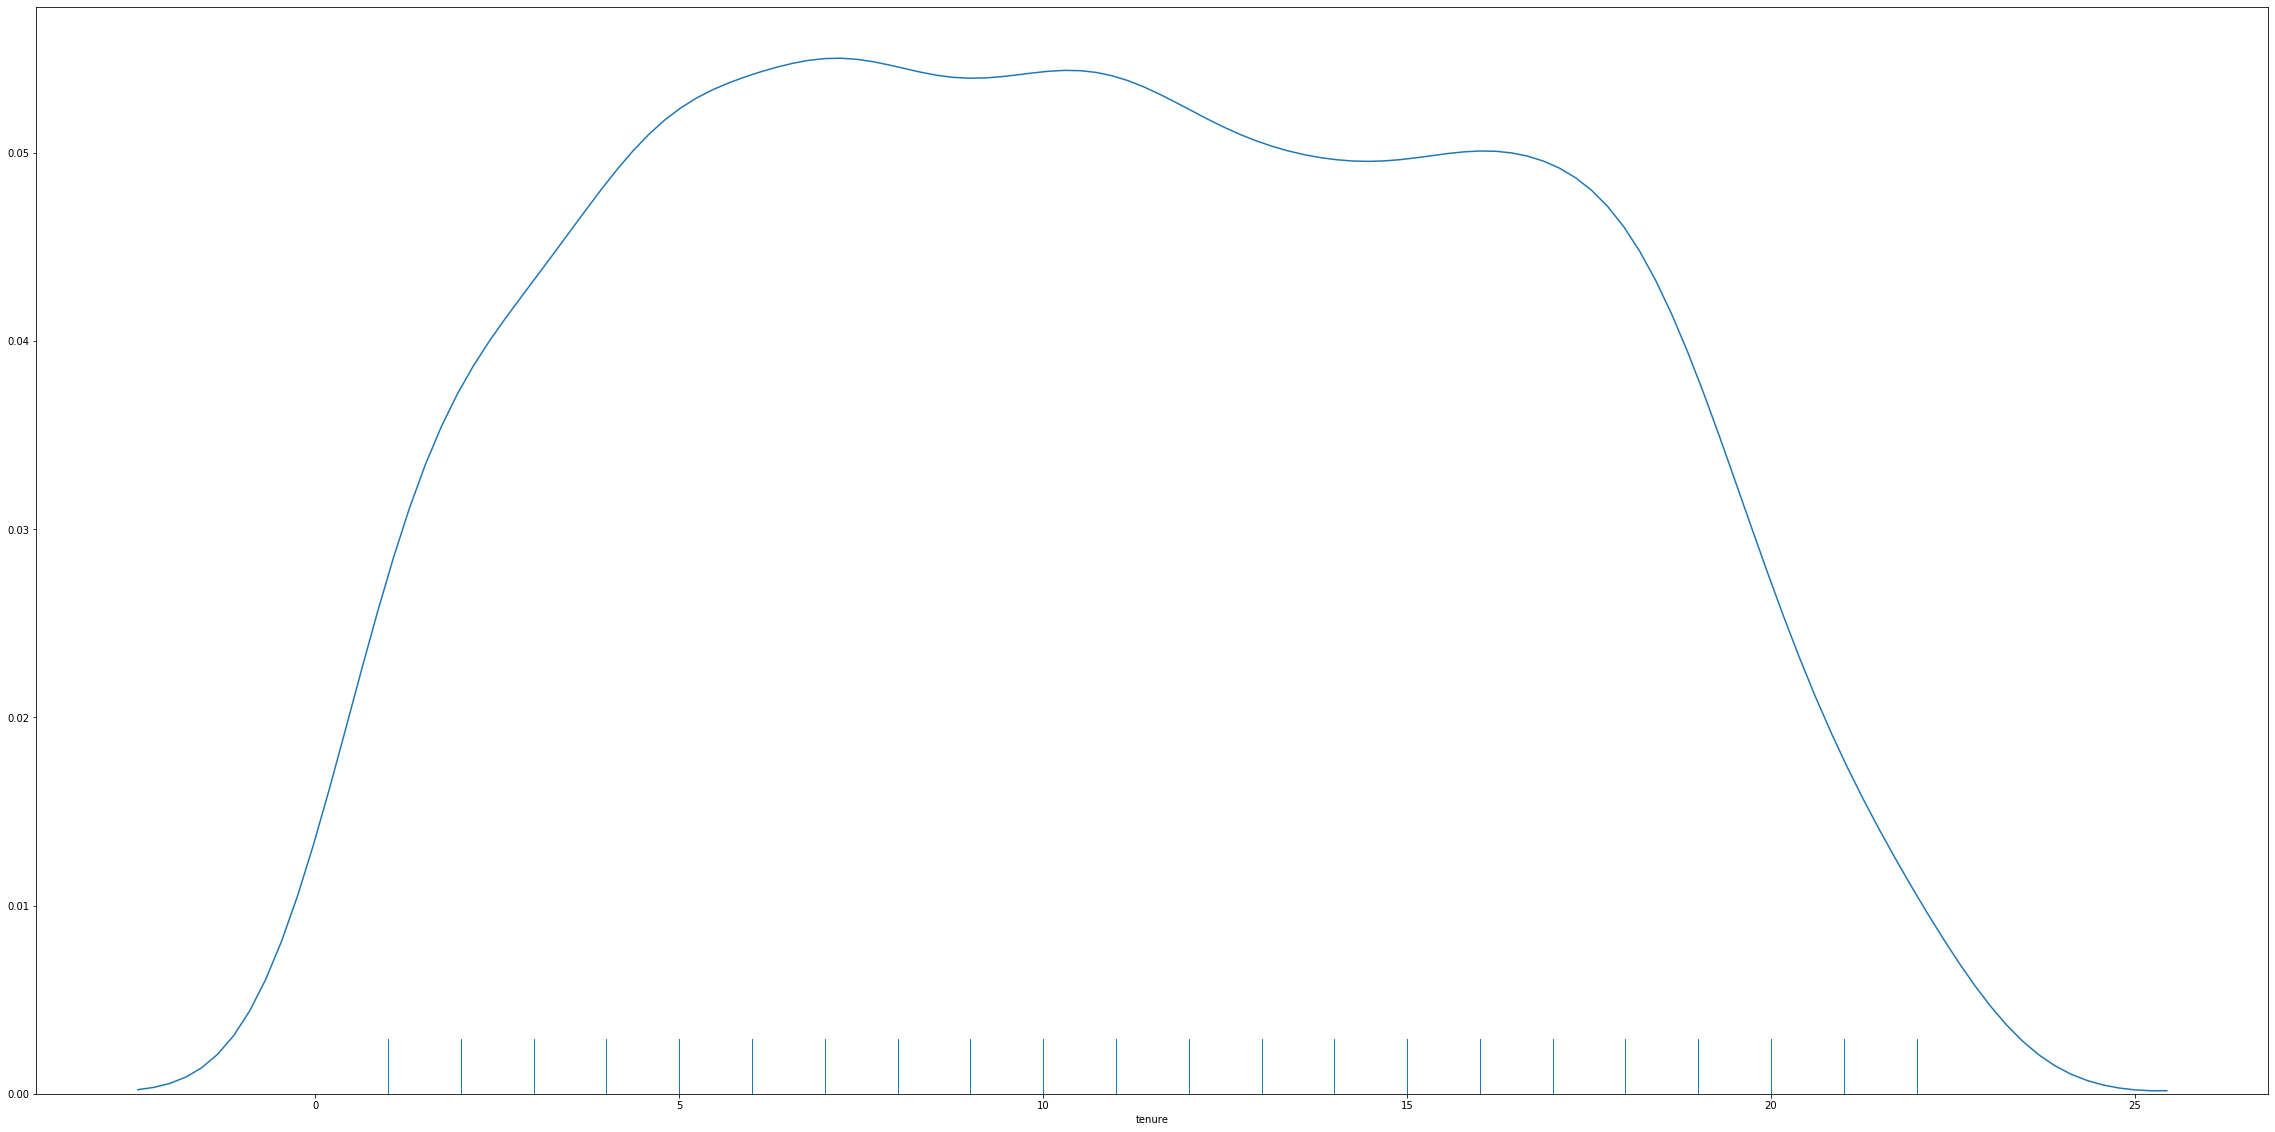

In [23]:
tenure= Num_check(custdemo, 'tenure')

public_method_names = [method for method in dir(tenure) if callable(getattr(tenure, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(tenure, method)()  # call

### Dealing with outliers

In [24]:
t_o = Num_check(custdemo, 'tenure')
tenure_outlier = t_o.num_find_outliers()
tenure_outlier.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
1348,595,Nikola,Jeanon,Male,72,1973-05-12,VP Marketing,Financial Services,Mass Customer,N,á,No,22.0
1388,3404,Thomasine,McCloch,Female,2,1973-08-01,GIS Technical Architect,Property,Affluent Customer,N,â,No,22.0
1480,484,Mason,Kohrsen,Male,64,1974-04-24,Programmer IV,Manufacturing,Mass Customer,N,TÌÌ­ÌºÌºoÍ Ì·iÌ²Ì¬ÍÌªÍnÌÌÍvÍÌÌÌÌ¦oÌ¶ÌÌ°Ì keÍÍÌ...,No,22.0
1493,3000,Tann,McCard,Male,28,1974-05-15,Compensation Analyst,Financial Services,Affluent Customer,N,testâ testâ«,No,22.0
1512,2417,Cacilia,Swetland,Female,27,1974-06-24,Nurse,NaN,Affluent Customer,N,â£,No,22.0


In [25]:
tenure_outlier.tenure

1348    22.0
1388    22.0
1480    22.0
1493    22.0
1512    22.0
1514    22.0
1515    22.0
1516    22.0
1542    22.0
1594    22.0
1618    22.0
1646    22.0
1719    22.0
1720    22.0
1807    22.0
1825    22.0
1839    22.0
1867    22.0
1880    22.0
1893    22.0
1907    22.0
1917    22.0
1929    22.0
2010    22.0
2015    22.0
2016    22.0
2052    22.0
2066    22.0
2109    22.0
2312    22.0
2336    22.0
2353    22.0
2407    22.0
2474    22.0
2727    22.0
2781    22.0
2811    22.0
2829    22.0
2832    22.0
2876    22.0
2877    22.0
2914    22.0
2945    22.0
2972    22.0
3000    22.0
3009    22.0
3024    22.0
3026    22.0
3032    22.0
3056    22.0
3068    22.0
3075    22.0
3168    22.0
3517    22.0
3539    22.0
Name: tenure, dtype: float64

### Problem Summary - tenure
| Problem  | Solution  |   
|---|---|
|87 missing values |Assign a mean tenure value |
|55 outliers (> 2 std)| All outliers are tenure = '22', it seems reasonable and it's not occured by typing mistake, I will keep it|

### 8. gender   (dtype: object, missing value: 0)

Count: 4000
Null:  0
PCT:   0.0

Top  10:
Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

Last 10:
Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64



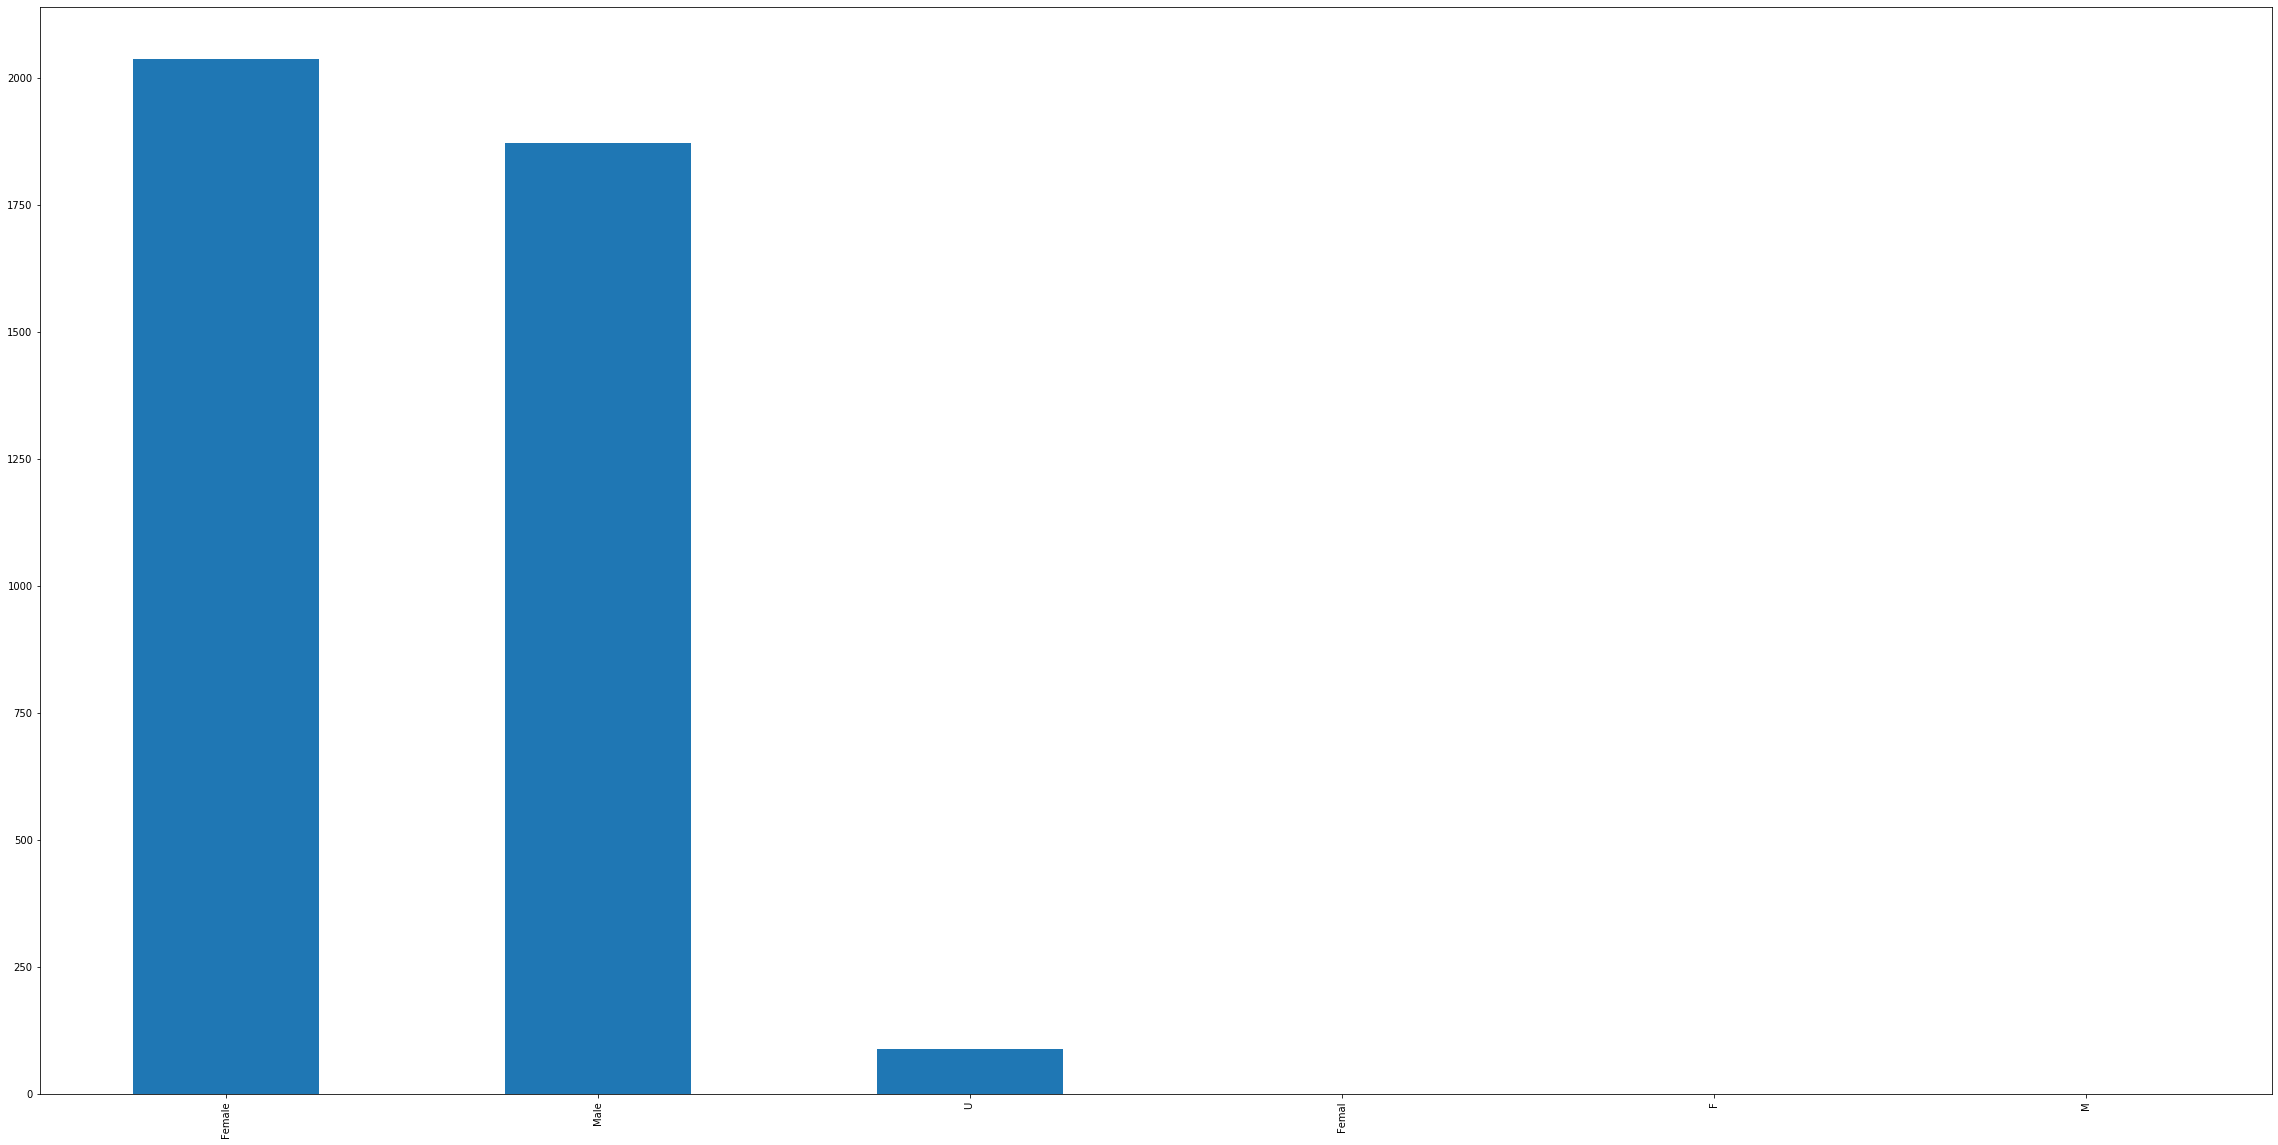

In [26]:
gender= Cat_check(custdemo, 'gender')

public_method_names = [method for method in dir(gender) if callable(getattr(gender, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(gender, method)()  # call

### Problem Summary - gender
| Problem  | Solution  |   
|---|---|
|3 unregular input (M, F, Femal) |convert to the regular description (Male, Female)|
|Unknow label (U) count: 88 | check with the customer, understand this 'U' meaning (I guess is UNKNOWN)

### 9. past_3_years_bike_related_purchases   (dtype: int64, missing value: 0)

Maximum: 99
Minimum: 0

Count: 4000
Null:  0
PCT:   0.0



,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure


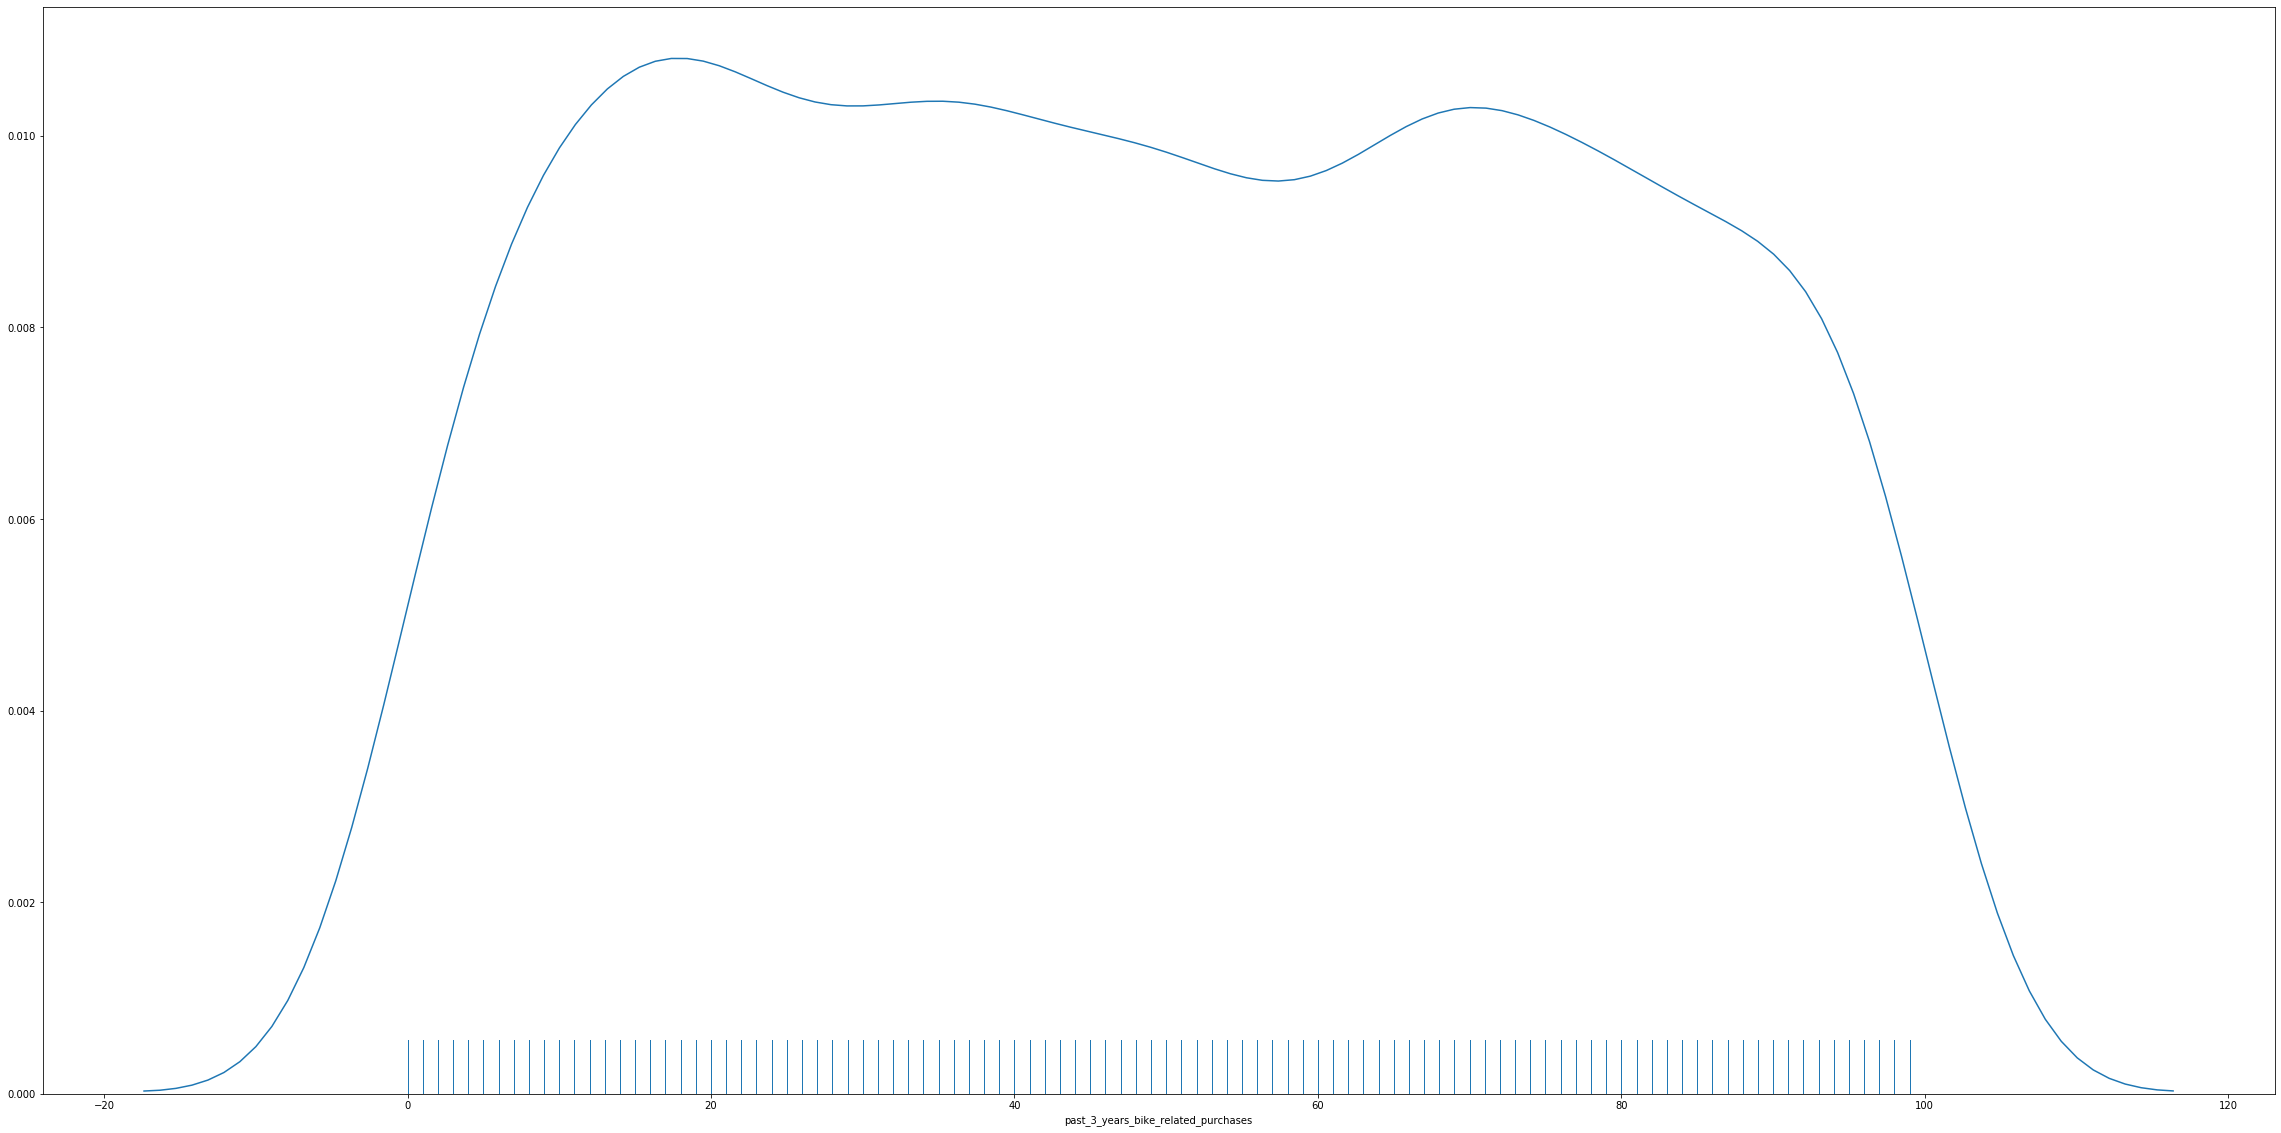

In [27]:
past_3= Num_check(custdemo, 'past_3_years_bike_related_purchases')

public_method_names = [method for method in dir(past_3) if callable(getattr(past_3, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(past_3, method)()  # call

# CustomerAddress


__DataFrame__

In [28]:
custadd = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='CustomerAddress', 
                             skiprows = 1, header=0)
custadd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [29]:
custadd.describe(include='all')

,customer_id,address,postcode,state,country,property_valuation
count,3999.000000,3999,3999.000000,3999,3999,3999.000000
unique,NaN,3996,NaN,5,1,NaN
top,NaN,3 Mariners Cove Terrace,NaN,NSW,Australia,NaN
freq,NaN,2,NaN,2054,3999,NaN
mean,2003.987997,NaN,2985.755939,NaN,NaN,7.514379
std,1154.576912,NaN,844.878364,NaN,NaN,2.824663
min,1.000000,NaN,2000.000000,NaN,NaN,1.000000
25%,1004.500000,NaN,2200.000000,NaN,NaN,6.000000
50%,2004.000000,NaN,2768.000000,NaN,NaN,8.000000
75%,3003.500000,NaN,3750.000000,NaN,NaN,10.000000


In [30]:
custadd.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [31]:
custadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [32]:
custadd.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country', 'property_valuation'], dtype='object')

### 1. customer_id   (dtype: int, missing value: 0)

Maximum: 4003
Minimum: 1

Count: 3999
Null:  0
PCT:   0.0



,customer_id,address,postcode,state,country,property_valuation


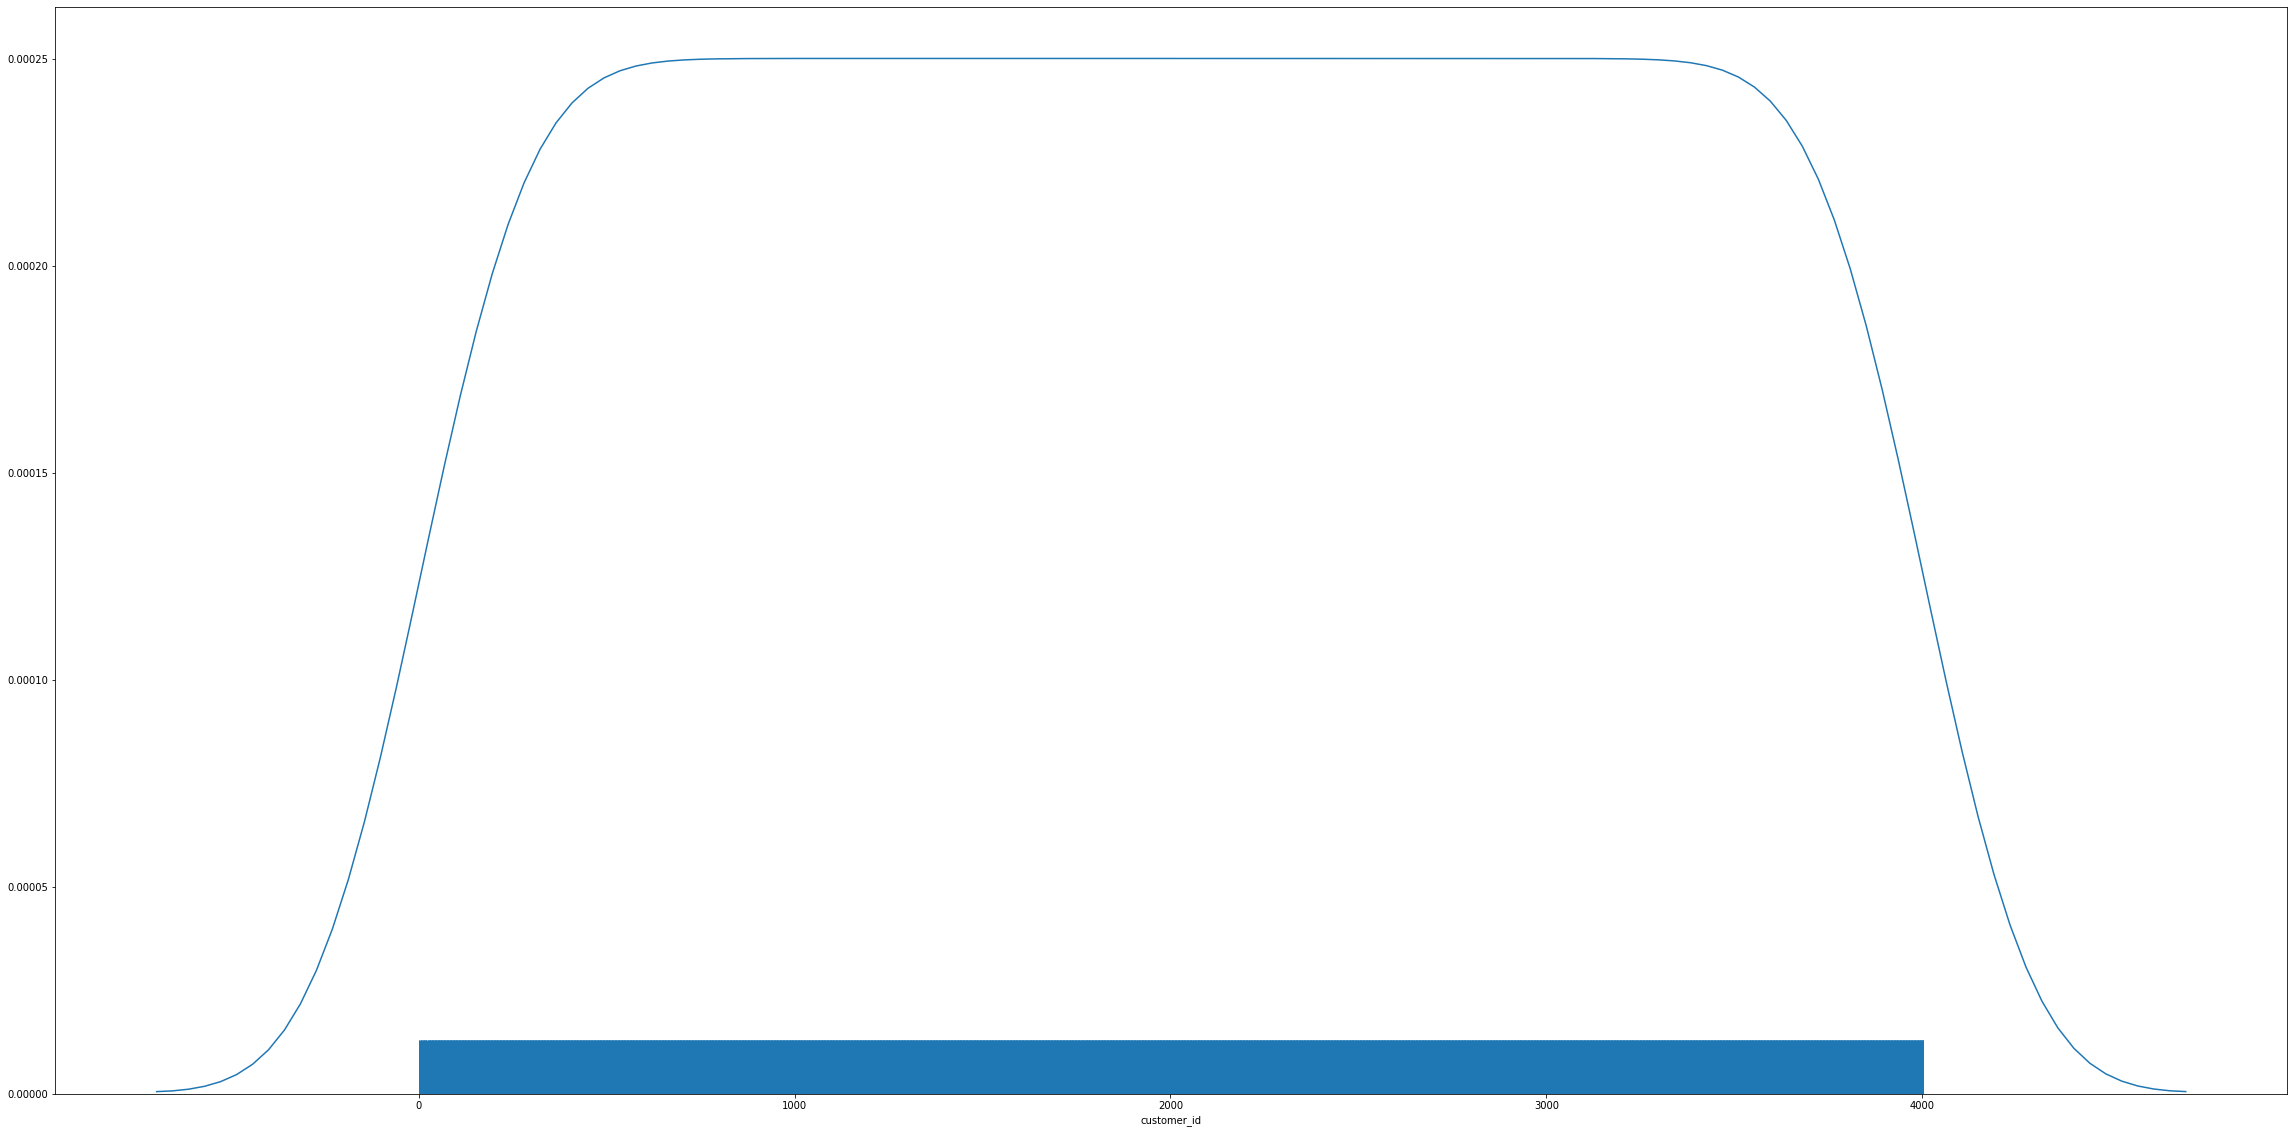

In [33]:
cust_id= Num_check(custadd, 'customer_id')

public_method_names = [method for method in dir(cust_id) if callable(getattr(cust_id, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(cust_id, method)()  # call

### 2. address   (dtype: object, missing value: 0)

Count: 3999
Null:  0
PCT:   0.0

Top  10:
2047    1
653     1
2728    1
677     1
2724    1
673     1
2720    1
669     1
2716    1
665     1
Name: customer_id, dtype: int64

Last 10:
1334    1
3379    1
1330    1
3375    1
1326    1
3371    1
1322    1
3367    1
1318    1
2049    1
Name: customer_id, dtype: int64



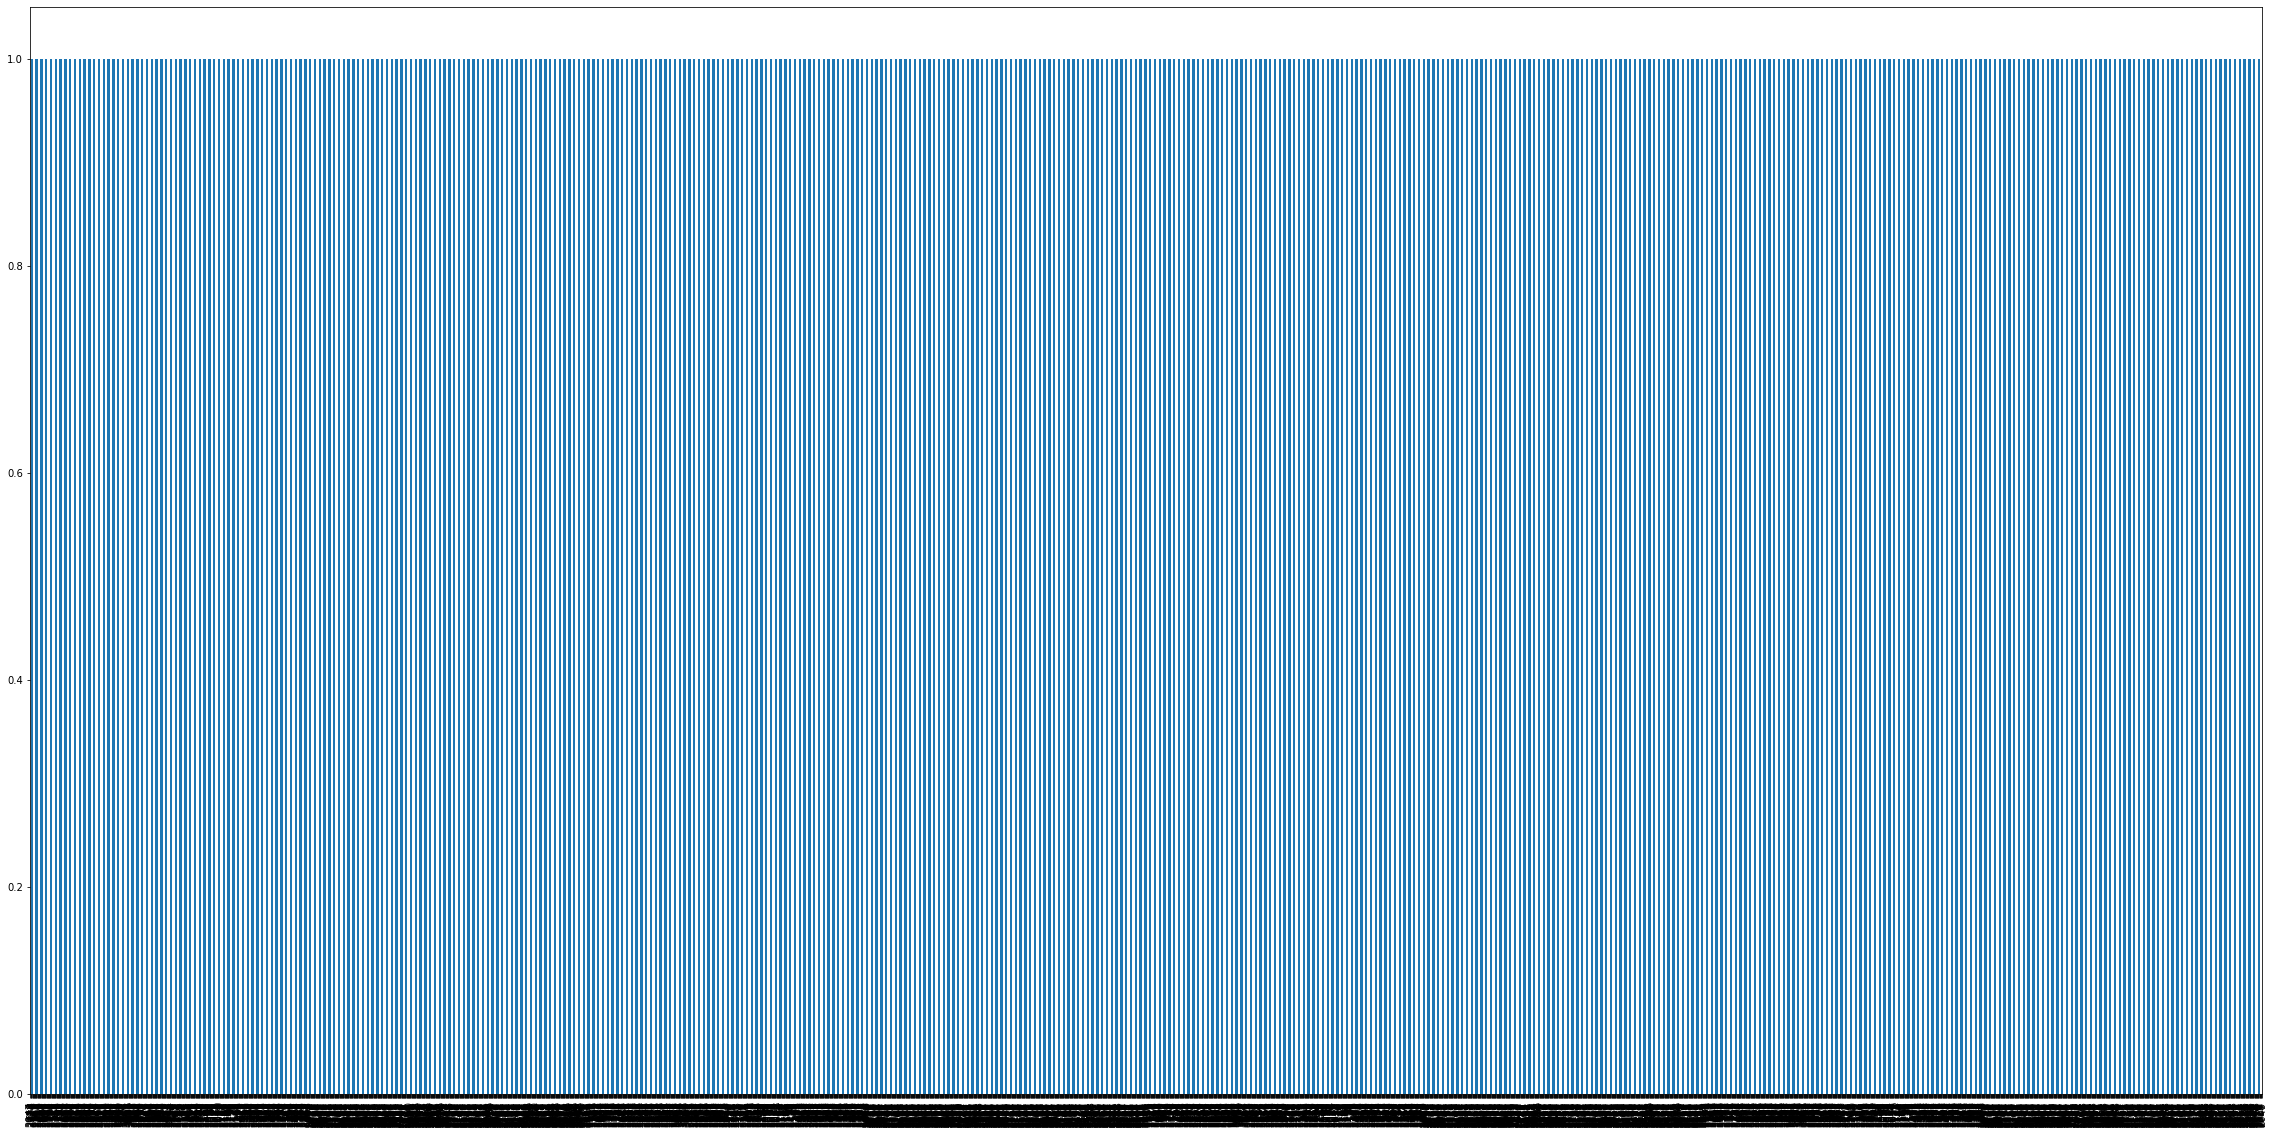

In [34]:
add= Cat_check(custadd, 'customer_id')

public_method_names = [method for method in dir(add) if callable(getattr(add, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(add, method)()  # call

### 3. postcode   (dtype: int, missing value: 0)

Maximum: 4883
Minimum: 2000

Count: 3999
Null:  0
PCT:   0.0



,customer_id,address,postcode,state,country,property_valuation
21,26,52 Carey Alley,4740,QLD,Australia,5
23,28,48 Eagan Avenue,4868,QLD,Australia,4
32,37,54 Sage Plaza,4726,QLD,Australia,1
33,38,90 Lawn Parkway,4805,QLD,Australia,4
117,122,5 Prairie Rose Road,4817,QLD,Australia,2
128,133,19392 7th Trail,4744,QLD,Australia,1
189,194,362 Mayer Terrace,4680,QLD,Australia,5
197,202,107 Elmside Parkway,4811,QLD,Australia,5
255,260,15 Straubel Way,4680,QLD,Australia,2
266,271,6262 Elgar Avenue,4735,QLD,Australia,2


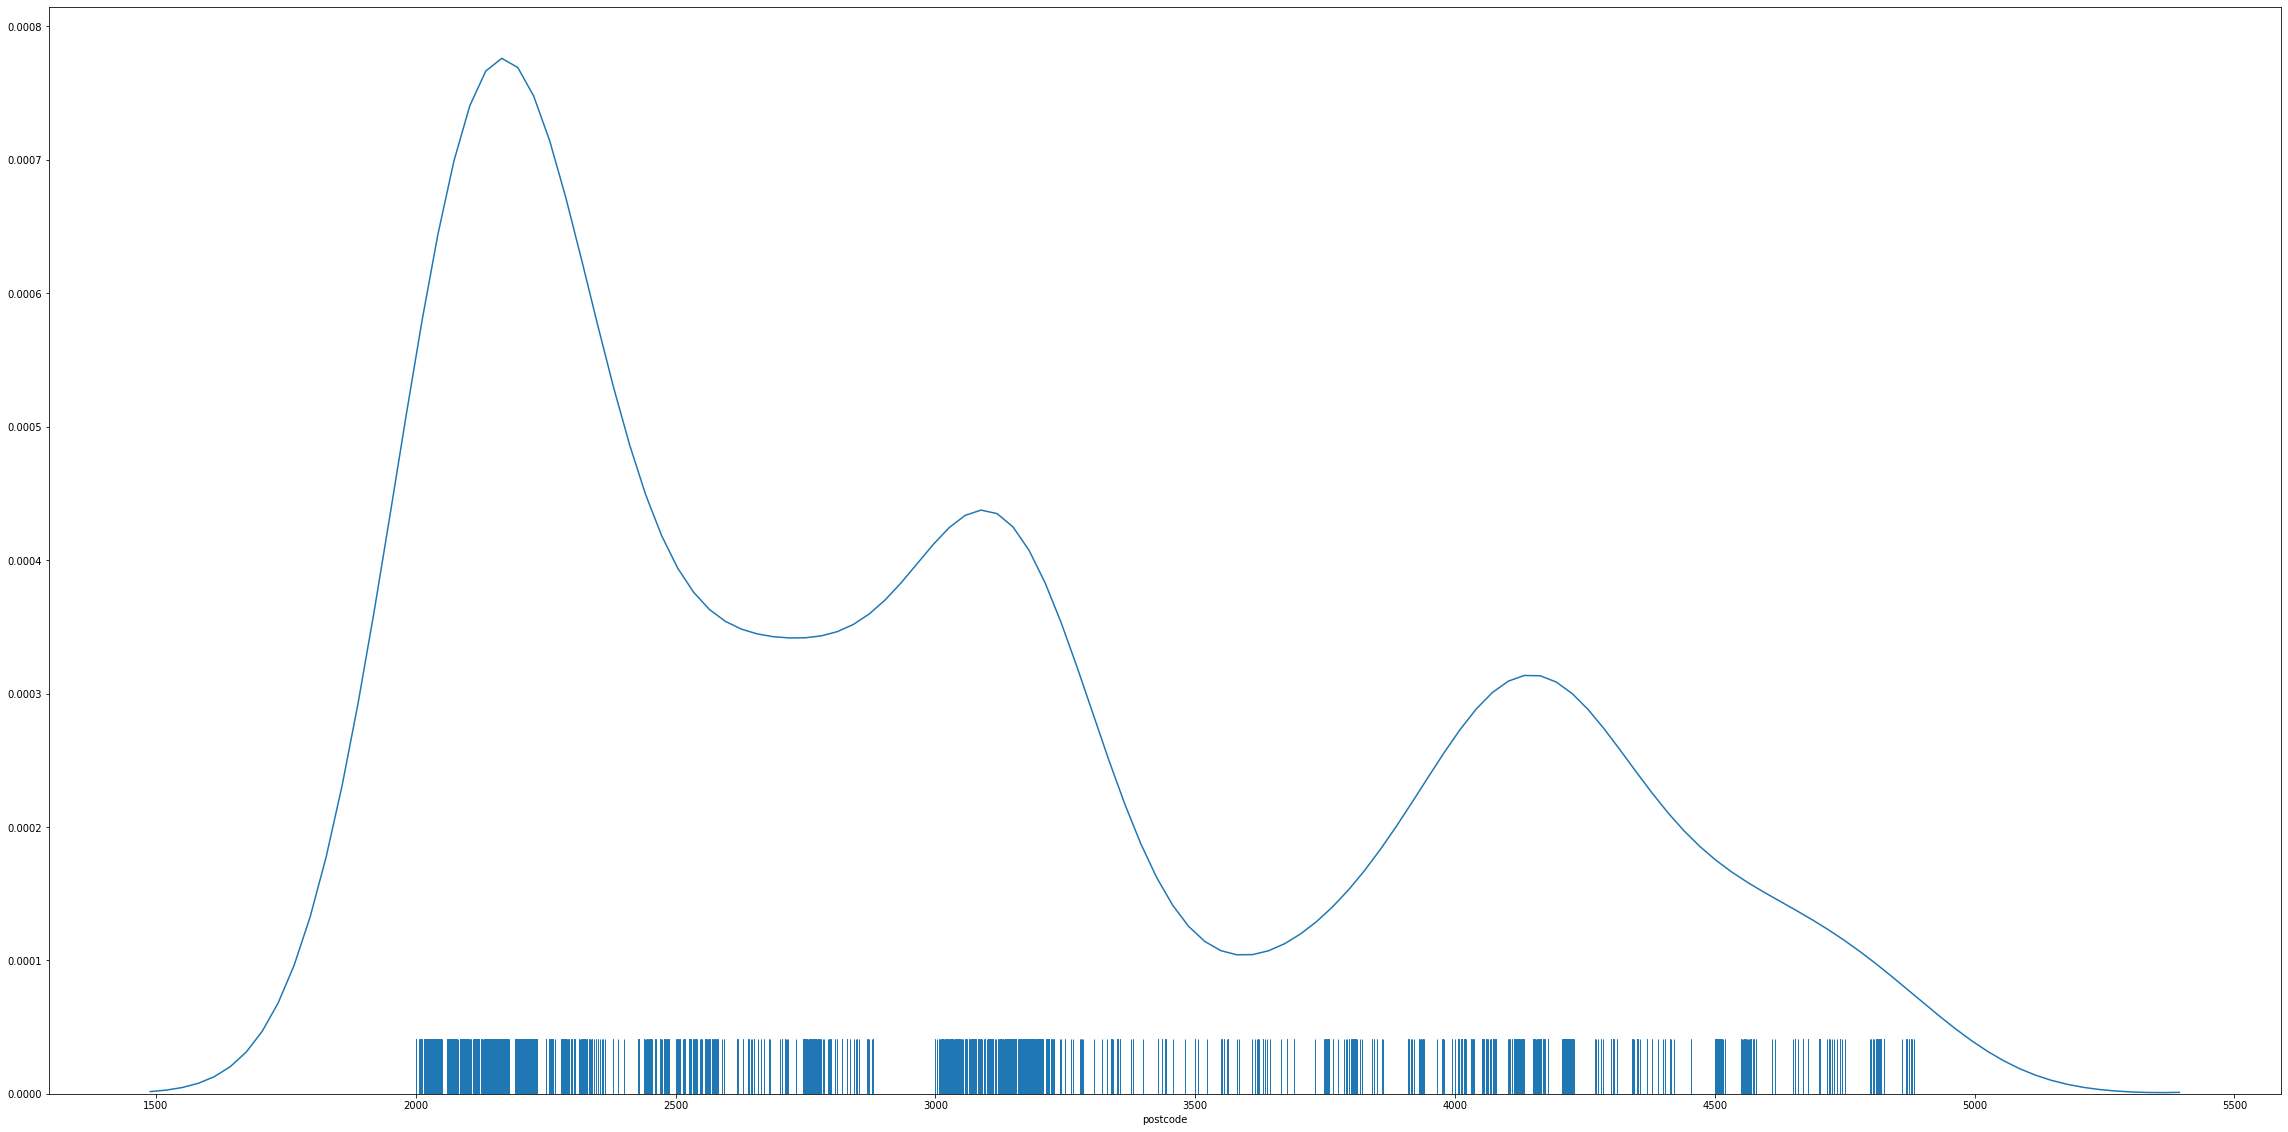

In [35]:
postcode= Num_check(custadd, 'postcode')

public_method_names = [method for method in dir(postcode) if callable(getattr(postcode, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(postcode, method)()  # call

### Problem Summary - postcode
| Problem  | Solution  |   
|---|---|
|The data type is int but actually object is better data type for this column|convert the data type to object|

### 4. state   (dtype: object, missing value: 0)

Count: 3999
Null:  0
PCT:   0.0

Top  10:
2170    31
2155    30
2145    30
2153    29
2770    26
3977    26
2560    26
2065    25
2148    22
2763    22
Name: postcode, dtype: int64

Last 10:
2517    1
4564    1
4562    1
2474    1
3556    1
4552    1
4555    1
2485    1
3580    1
4421    1
Name: postcode, dtype: int64



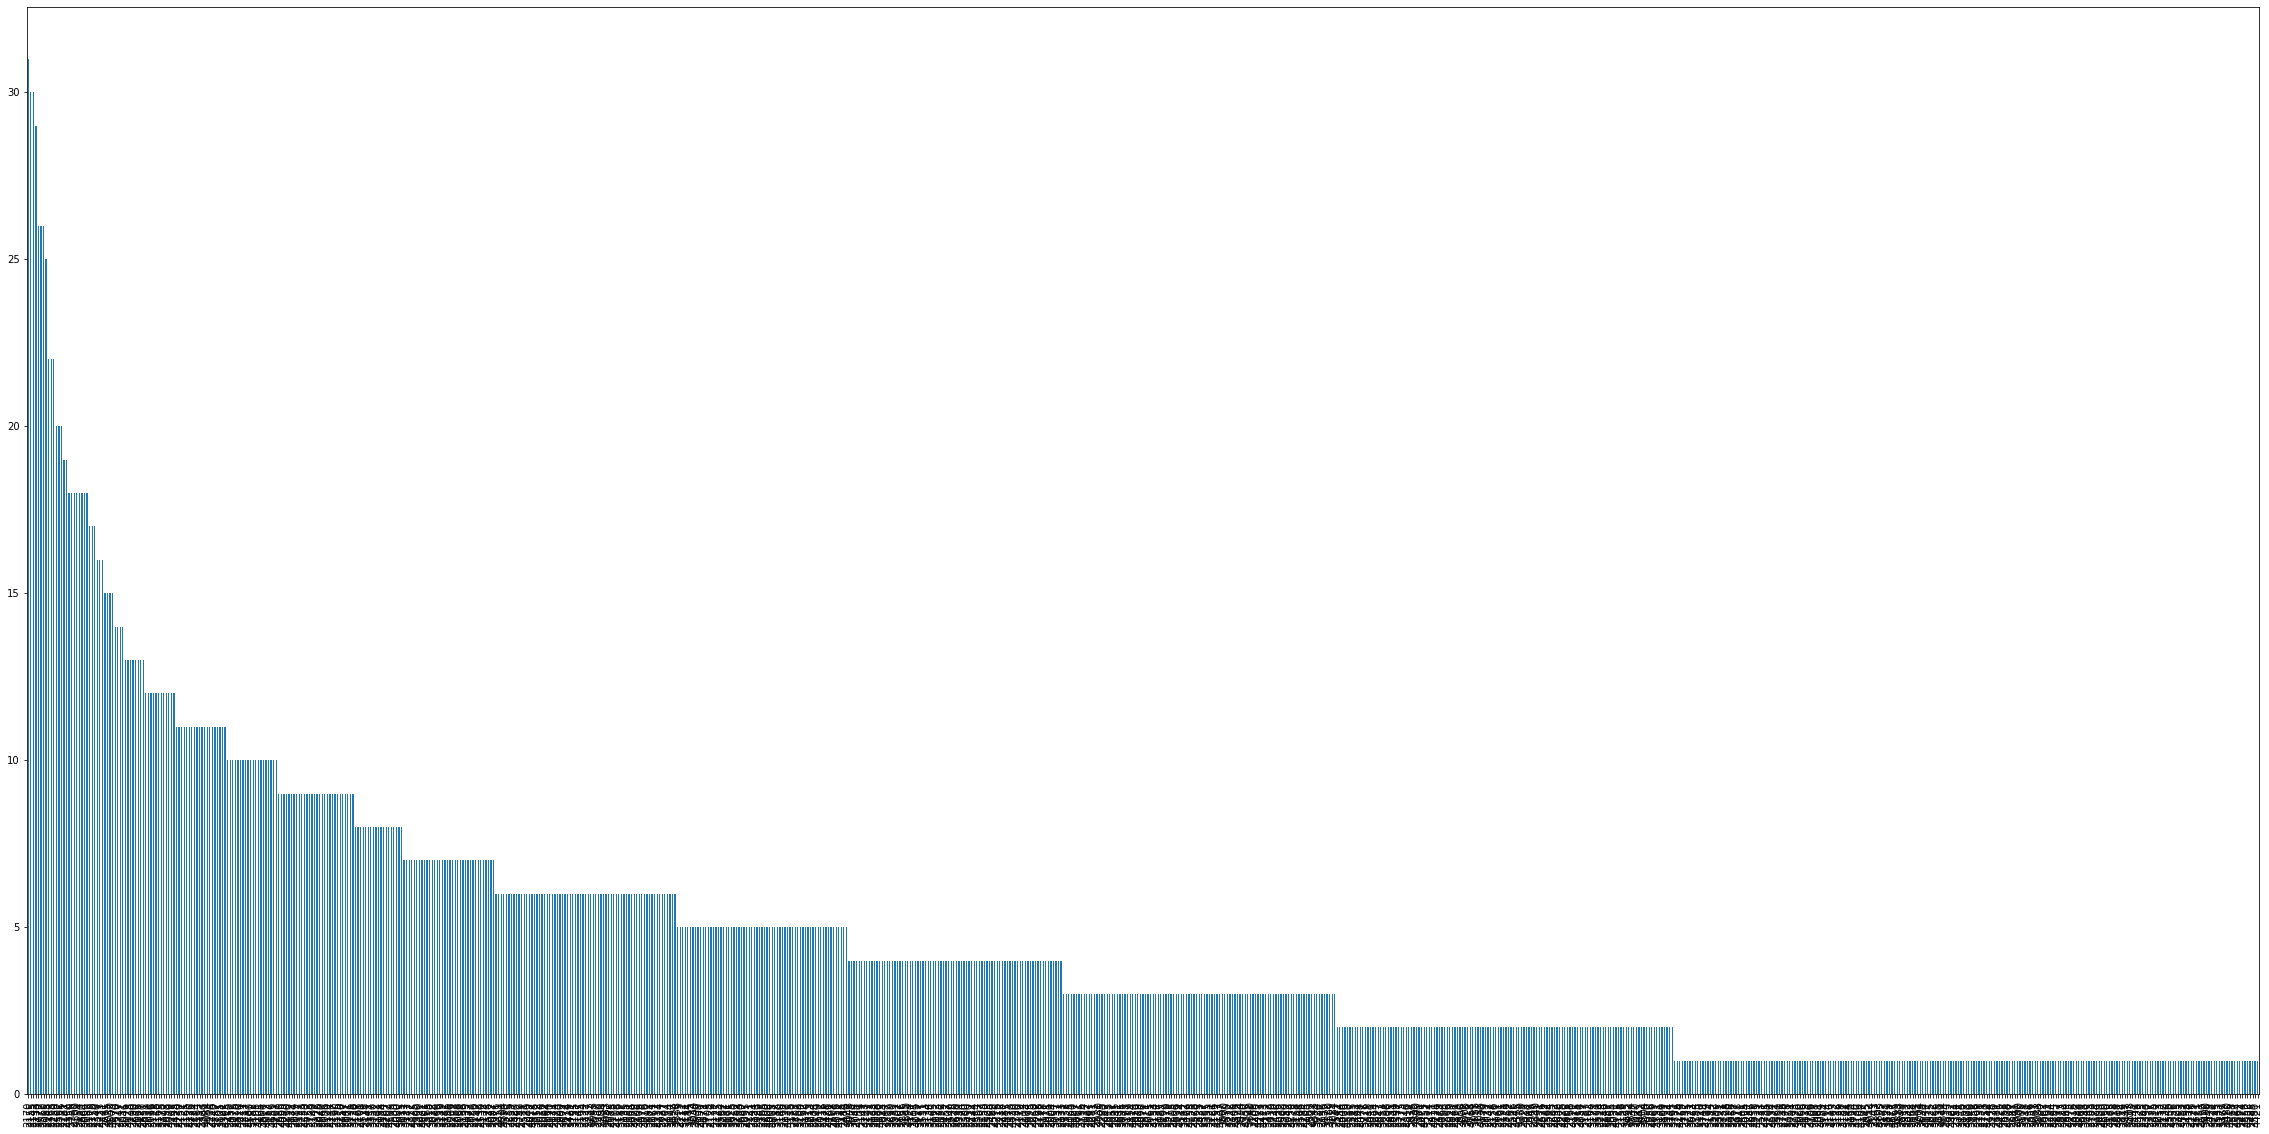

In [36]:
state= Cat_check(custadd, 'postcode')

public_method_names = [method for method in dir(state) if callable(getattr(state, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(state, method)()  # call

### 5. country   (dtype: object, missing value: 0)

Count: 3999
Null:  0
PCT:   0.0

Top  10:
Australia    3999
Name: country, dtype: int64

Last 10:
Australia    3999
Name: country, dtype: int64



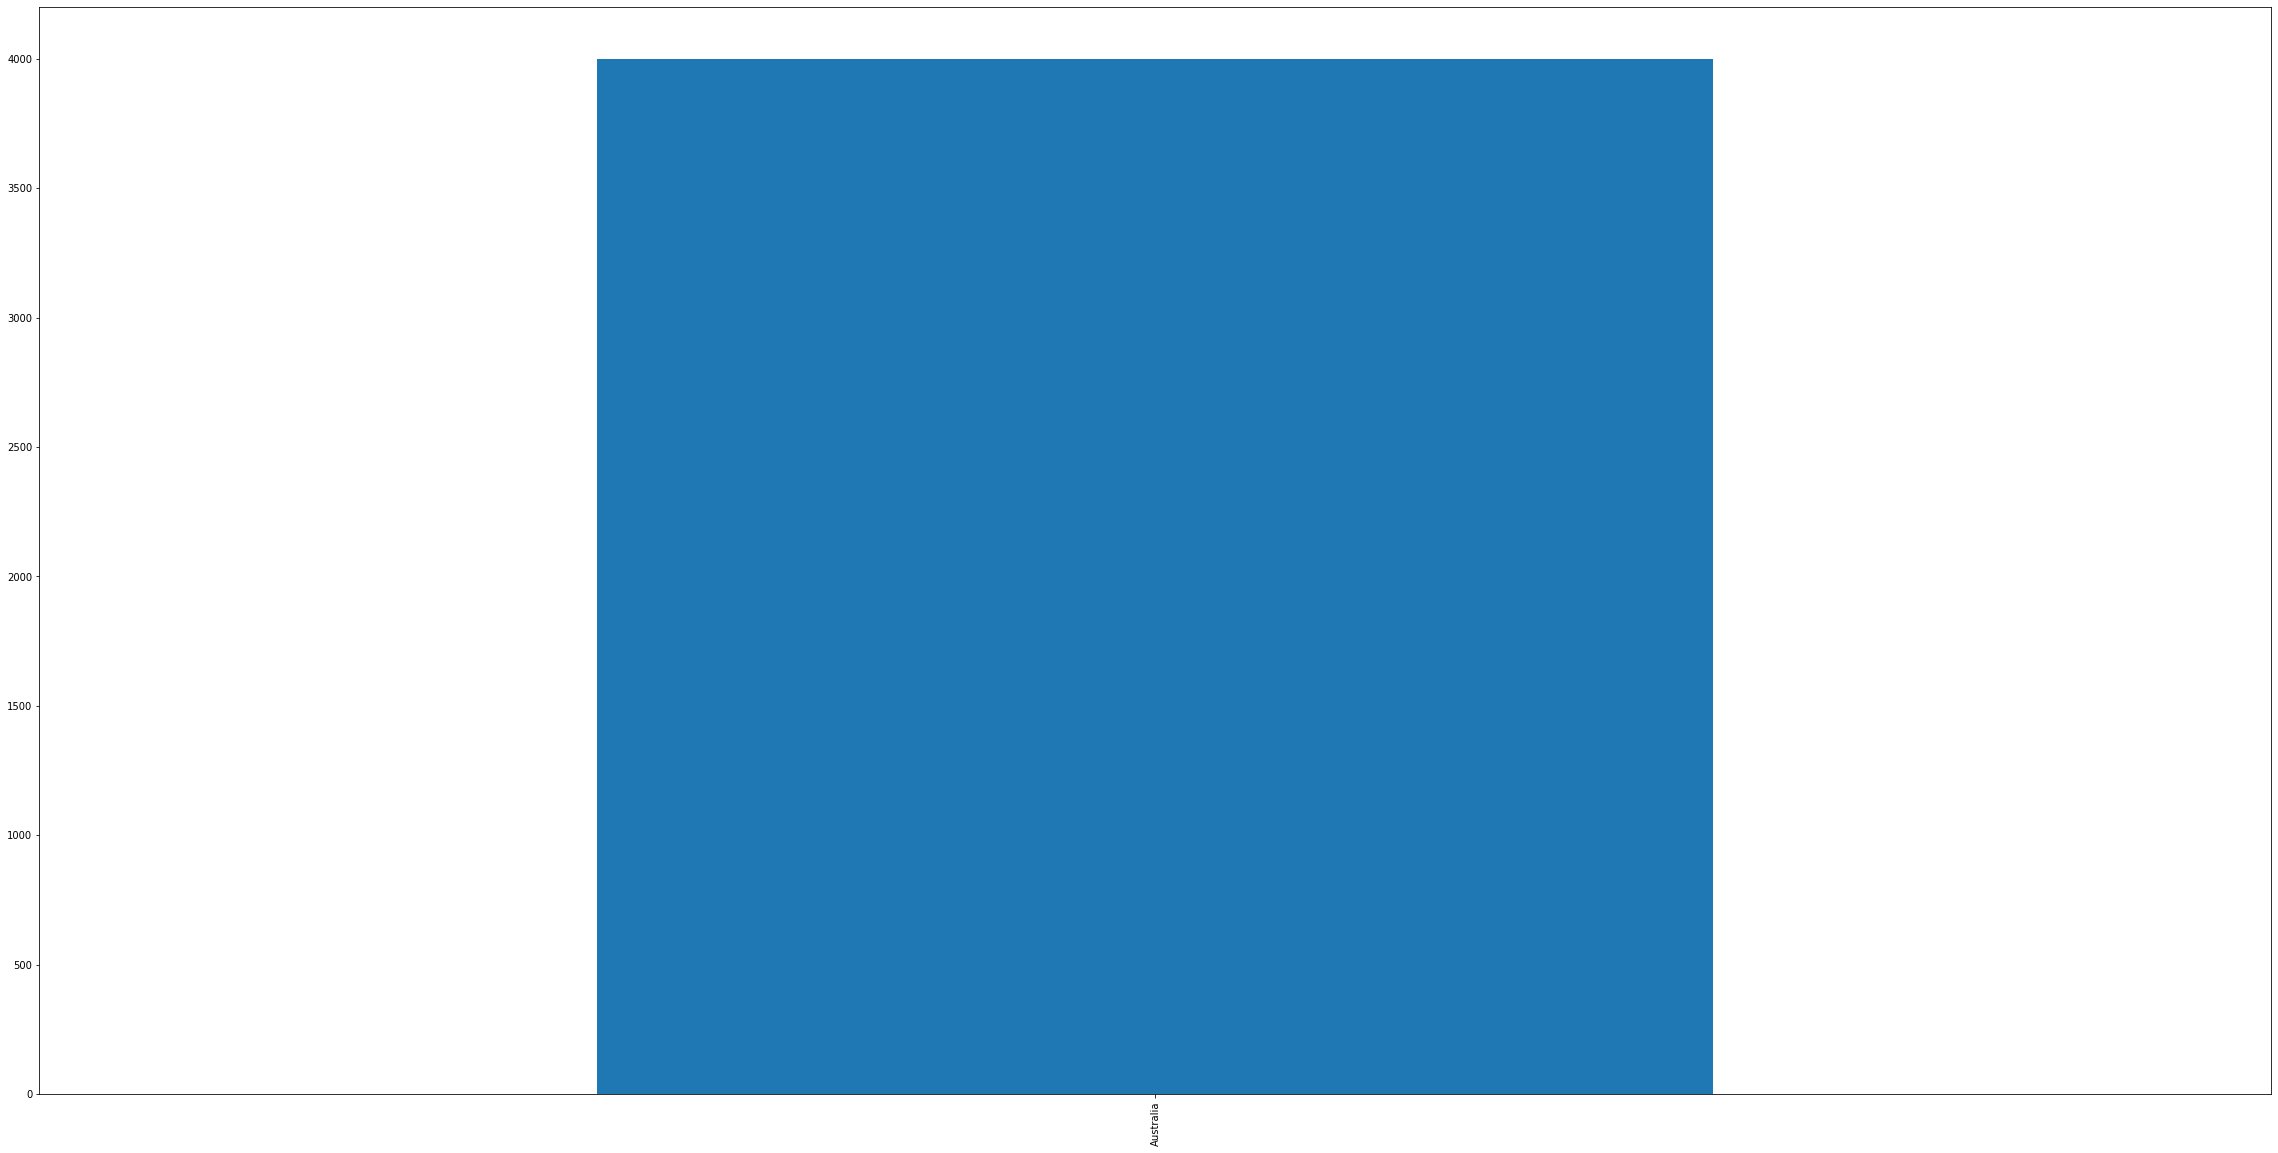

In [37]:
country= Cat_check(custadd, 'country')

public_method_names = [method for method in dir(country) if callable(getattr(country, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(country, method)()  # call

### 6. property_valuation   (dtype: int, missing value: 0)

Maximum: 12
Minimum: 1

Count: 3999
Null:  0
PCT:   0.0



,customer_id,address,postcode,state,country,property_valuation
32,37,54 Sage Plaza,4726,QLD,Australia,1
75,80,7 Jackson Point,3561,VIC,Australia,1
110,115,8194 Sachtjen Drive,3844,VIC,Australia,1
122,127,0 Pearson Crossing,4405,QLD,Australia,1
128,133,19392 7th Trail,4744,QLD,Australia,1
134,139,215 Lindbergh Trail,4401,QLD,Australia,1
176,181,8256 Annamark Court,3638,VIC,Australia,1
179,184,50 Meadow Ridge Way,2880,NSW,Australia,1
240,245,07227 Hoard Terrace,3500,VIC,Australia,1
249,254,0850 Schmedeman Drive,3580,VIC,Australia,1


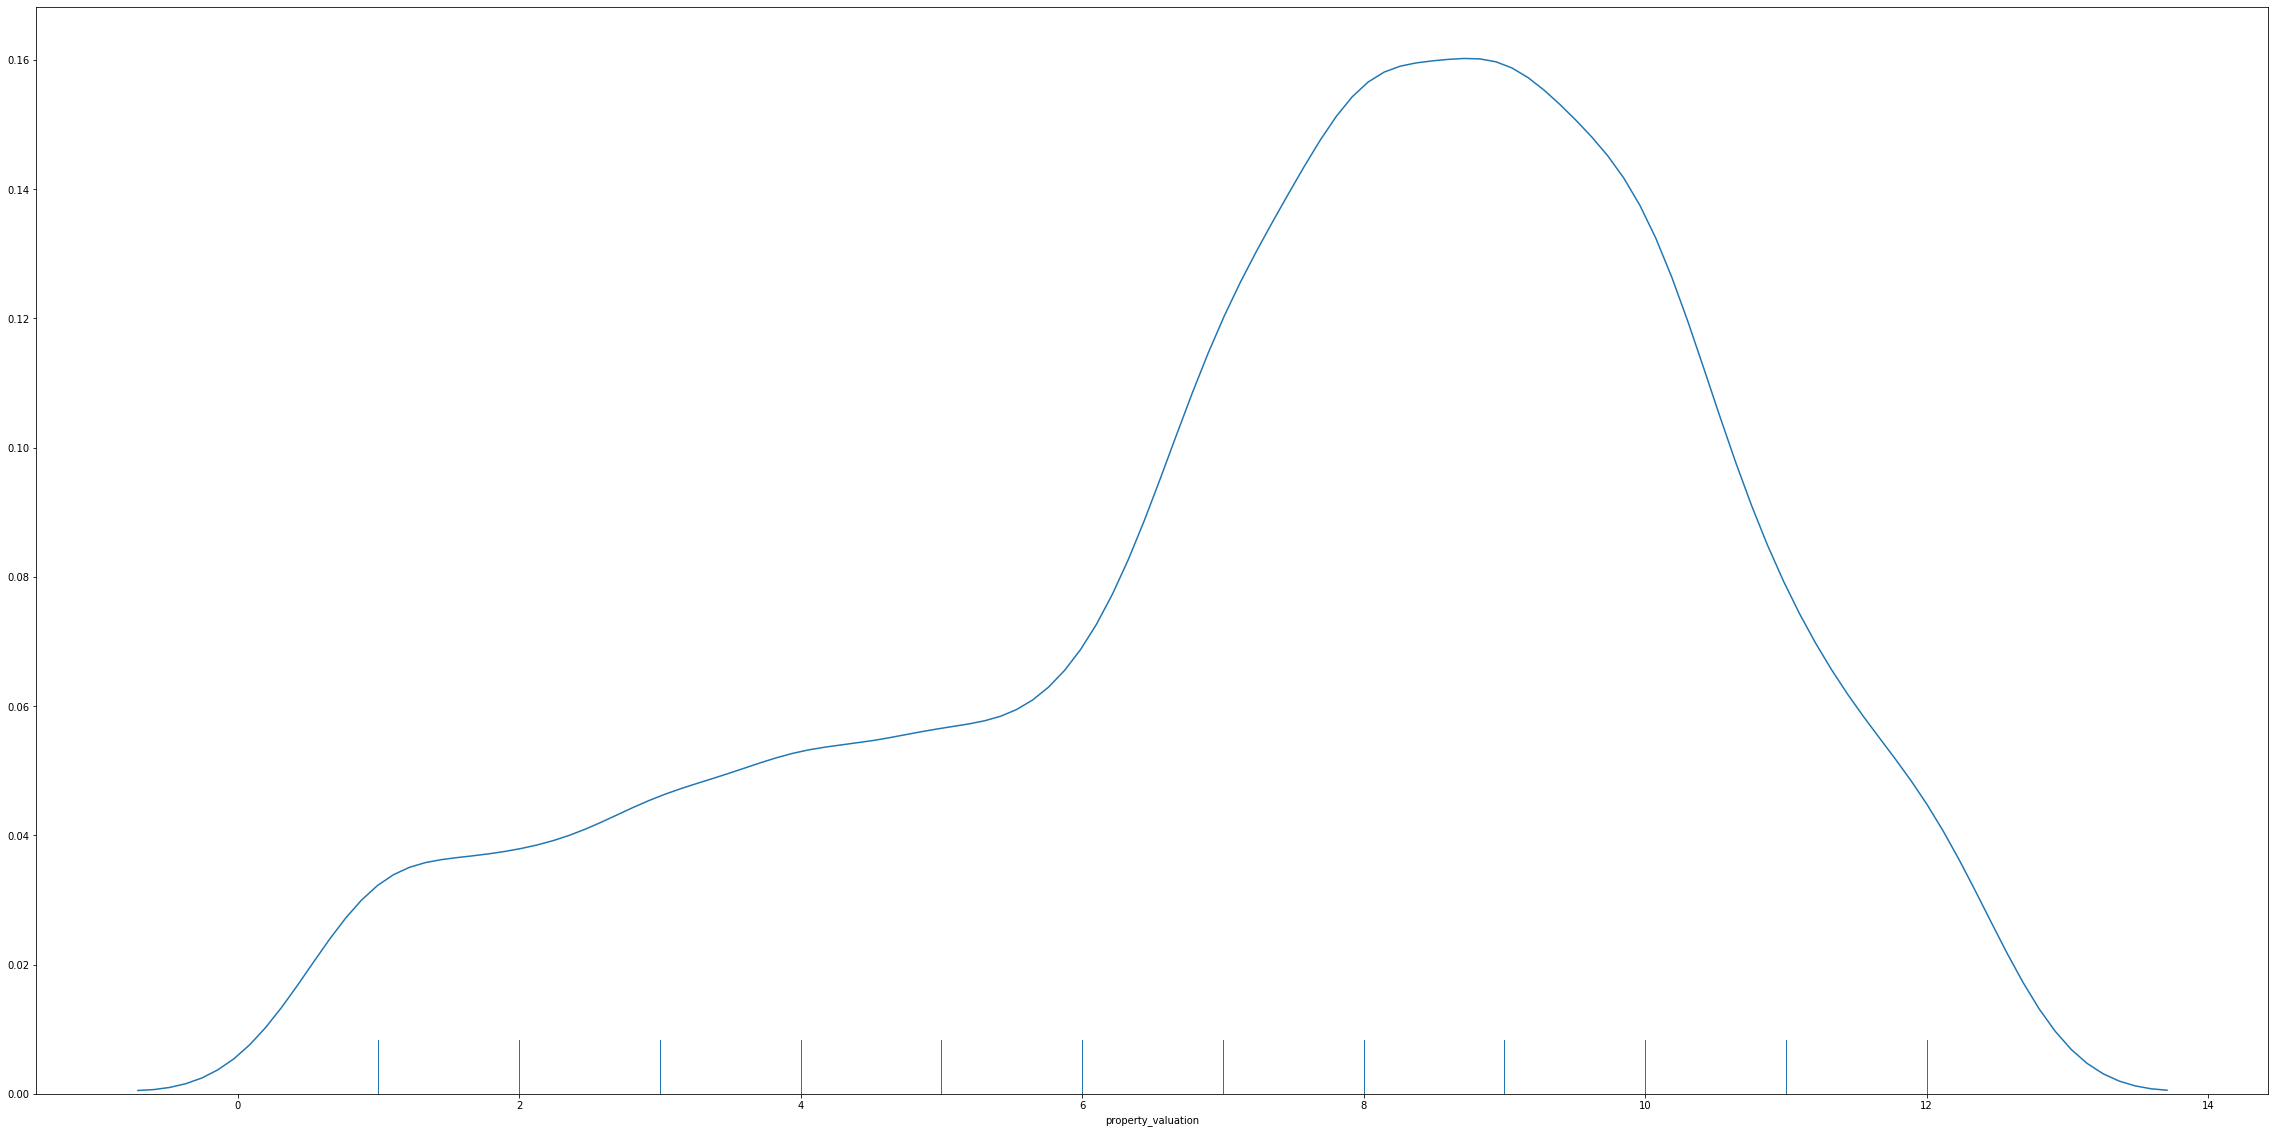

In [38]:
property_valuation= Num_check(custadd, 'property_valuation')

public_method_names = [method for method in dir(property_valuation) if callable(getattr(property_valuation, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(property_valuation, method)()  # call

In [39]:
# outlier inspection
outlier_pop = property_valuation.num_find_outliers()
outlier_pop.shape

(154, 6)

In [40]:
outlier_pop.property_valuation.unique()

array([1])

In [41]:
custadd.property_valuation.describe()

count    3999.000000
mean        7.514379
std         2.824663
min         1.000000
25%         6.000000
50%         8.000000
75%        10.000000
max        12.000000
Name: property_valuation, dtype: float64

### Problem Summary - property_valuation
| Problem  | Solution  |   
|---|---|
|even though the data contain 154 outliers, it seems the data is reasonable and it is not typo. I will remain it.|remain|

---

# Transactions

__DataFrame__

In [42]:
transactions = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name='Transactions', 
                             skiprows = 1, header=0)
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [43]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

__DataSet Overview__

In [44]:
transactions.describe(include='all')

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000,19640.000000,20000,19803,19803,19803,19803,20000.000000,19803.000000,19803.000000
unique,NaN,NaN,NaN,364,NaN,2,6,4,3,3,NaN,NaN,NaN
top,NaN,NaN,NaN,2017-02-14 00:00:00,NaN,Approved,Solex,Standard,medium,medium,NaN,NaN,NaN
freq,NaN,NaN,NaN,82,NaN,19821,4253,14176,13826,12990,NaN,NaN,NaN
first,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,10000.500000,45.36465,1738.246050,NaN,0.500458,NaN,NaN,NaN,NaN,NaN,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,NaN,0.500013,NaN,NaN,NaN,NaN,NaN,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,575.270000,215.140000,35667.000000


__Missing Value Check__

In [45]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [46]:
transactions.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'list_price', 'standard_cost', 'product_first_sold_date'], dtype='object')

### 1. transaction_date   (dtype: datetime, missing value: 0)

In [47]:
print ('Minimum Date: {}\nMaximum Date: {}'.format(transactions.transaction_date.min(), transactions.transaction_date.max()))

Minimum Date: 2017-01-01 00:00:00
Maximum Date: 2017-12-30 00:00:00


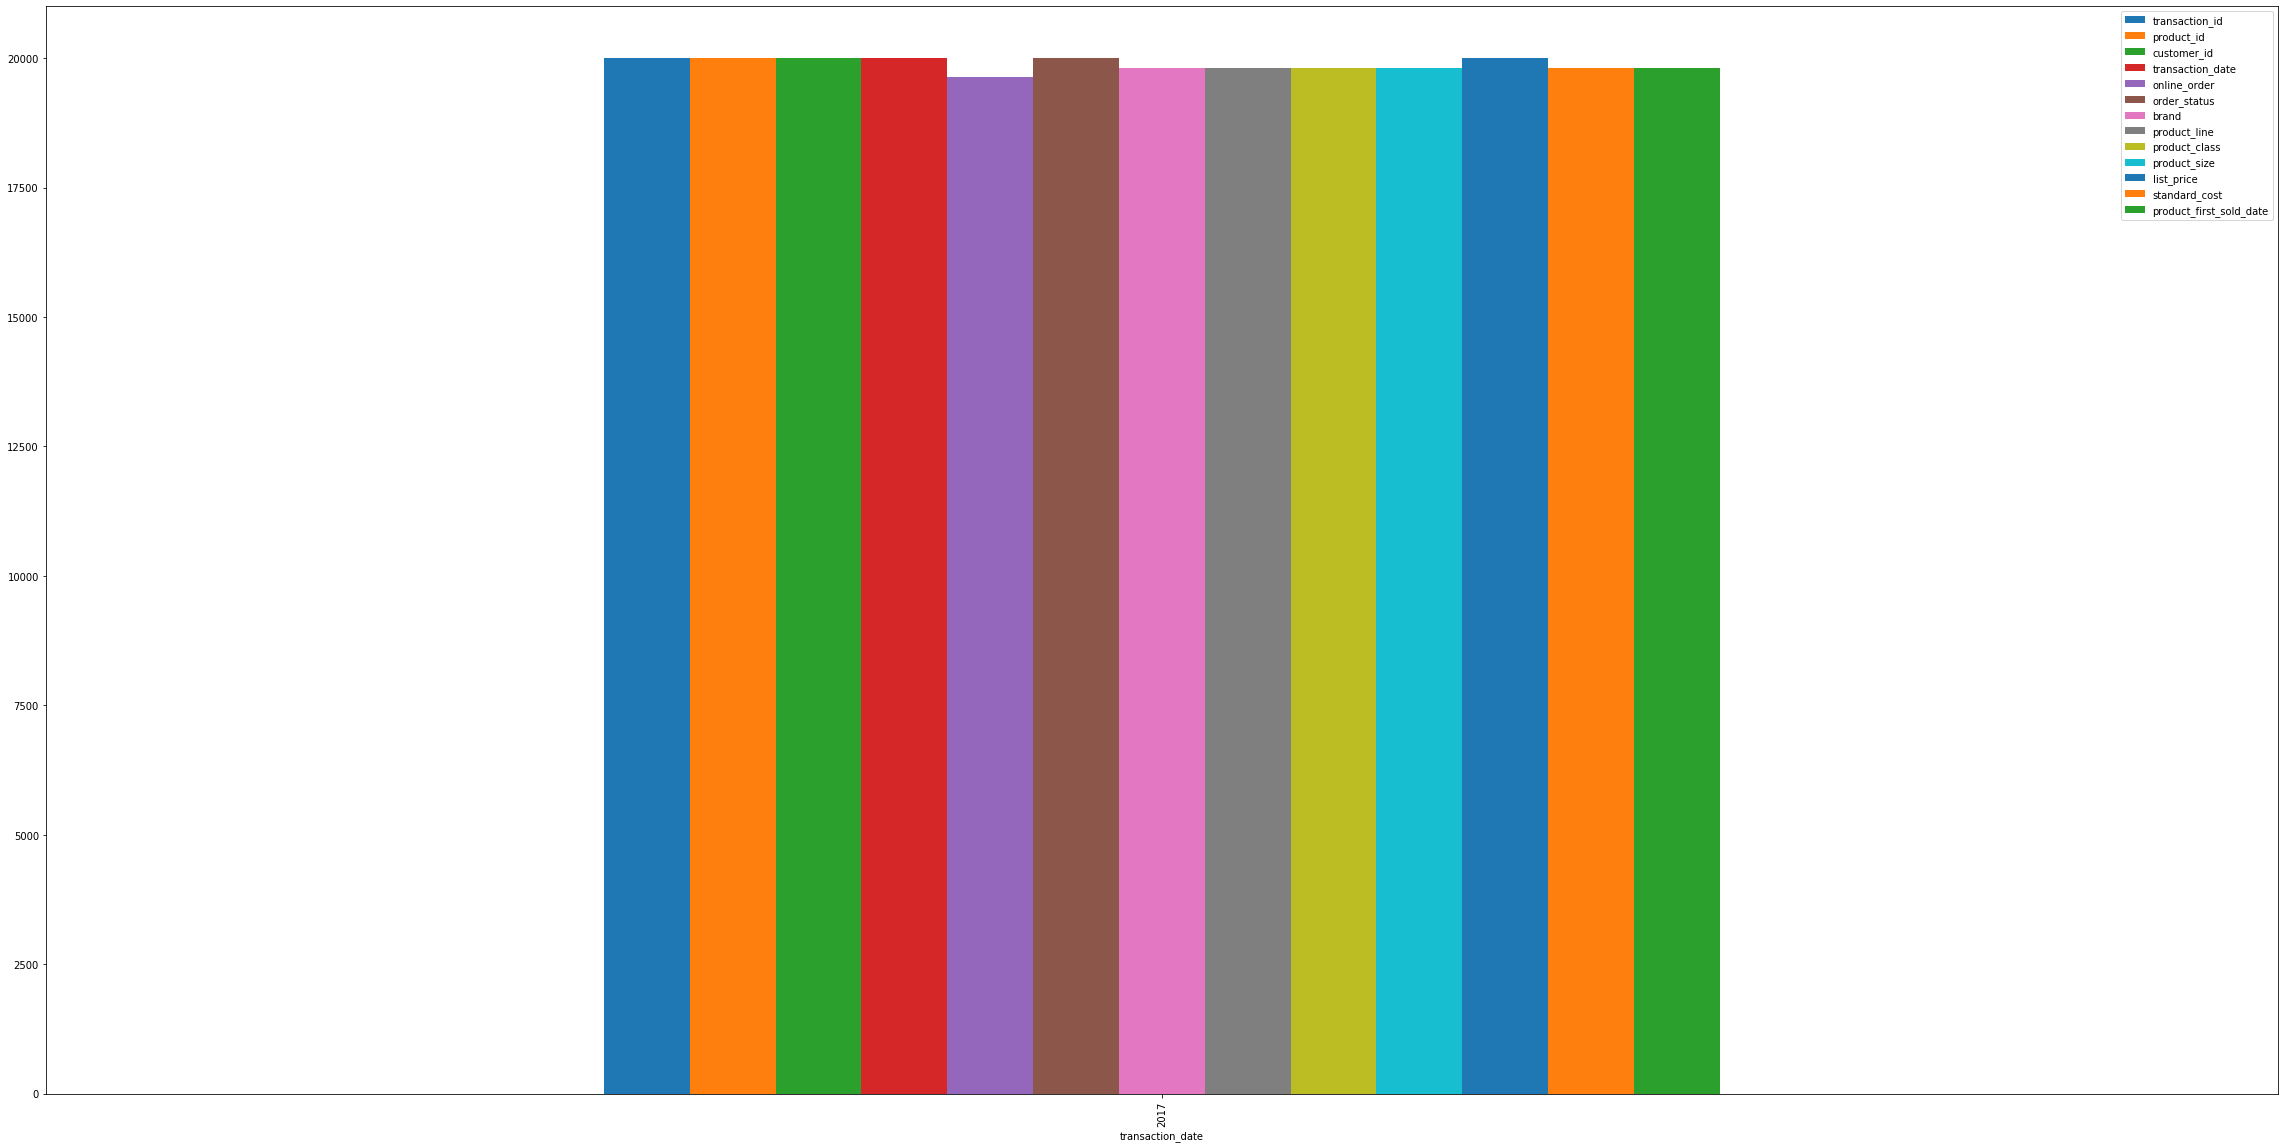

In [48]:
transactions.groupby(transactions.transaction_date.dt.year).count().plot(kind="bar")

In [49]:
pd.options.display.max_rows = 4000
transactions.groupby([transactions.transaction_date.dt.year, transactions.transaction_date.dt.month]).size()

transaction_date  transaction_date
2017              1                   1682
                  2                   1623
                  3                   1656
                  4                   1655
                  5                   1685
                  6                   1581
                  7                   1717
                  8                   1749
                  9                   1572
                  10                  1771
                  11                  1665
                  12                  1644
dtype: int64

### 2. transaction_date   (dtype: datetime, missing value: 0)

In [50]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

Count: 20000
Null:  0
PCT:   0.0

Top  10:
Approved     19821
Cancelled      179
Name: order_status, dtype: int64

Last 10:
Approved     19821
Cancelled      179
Name: order_status, dtype: int64



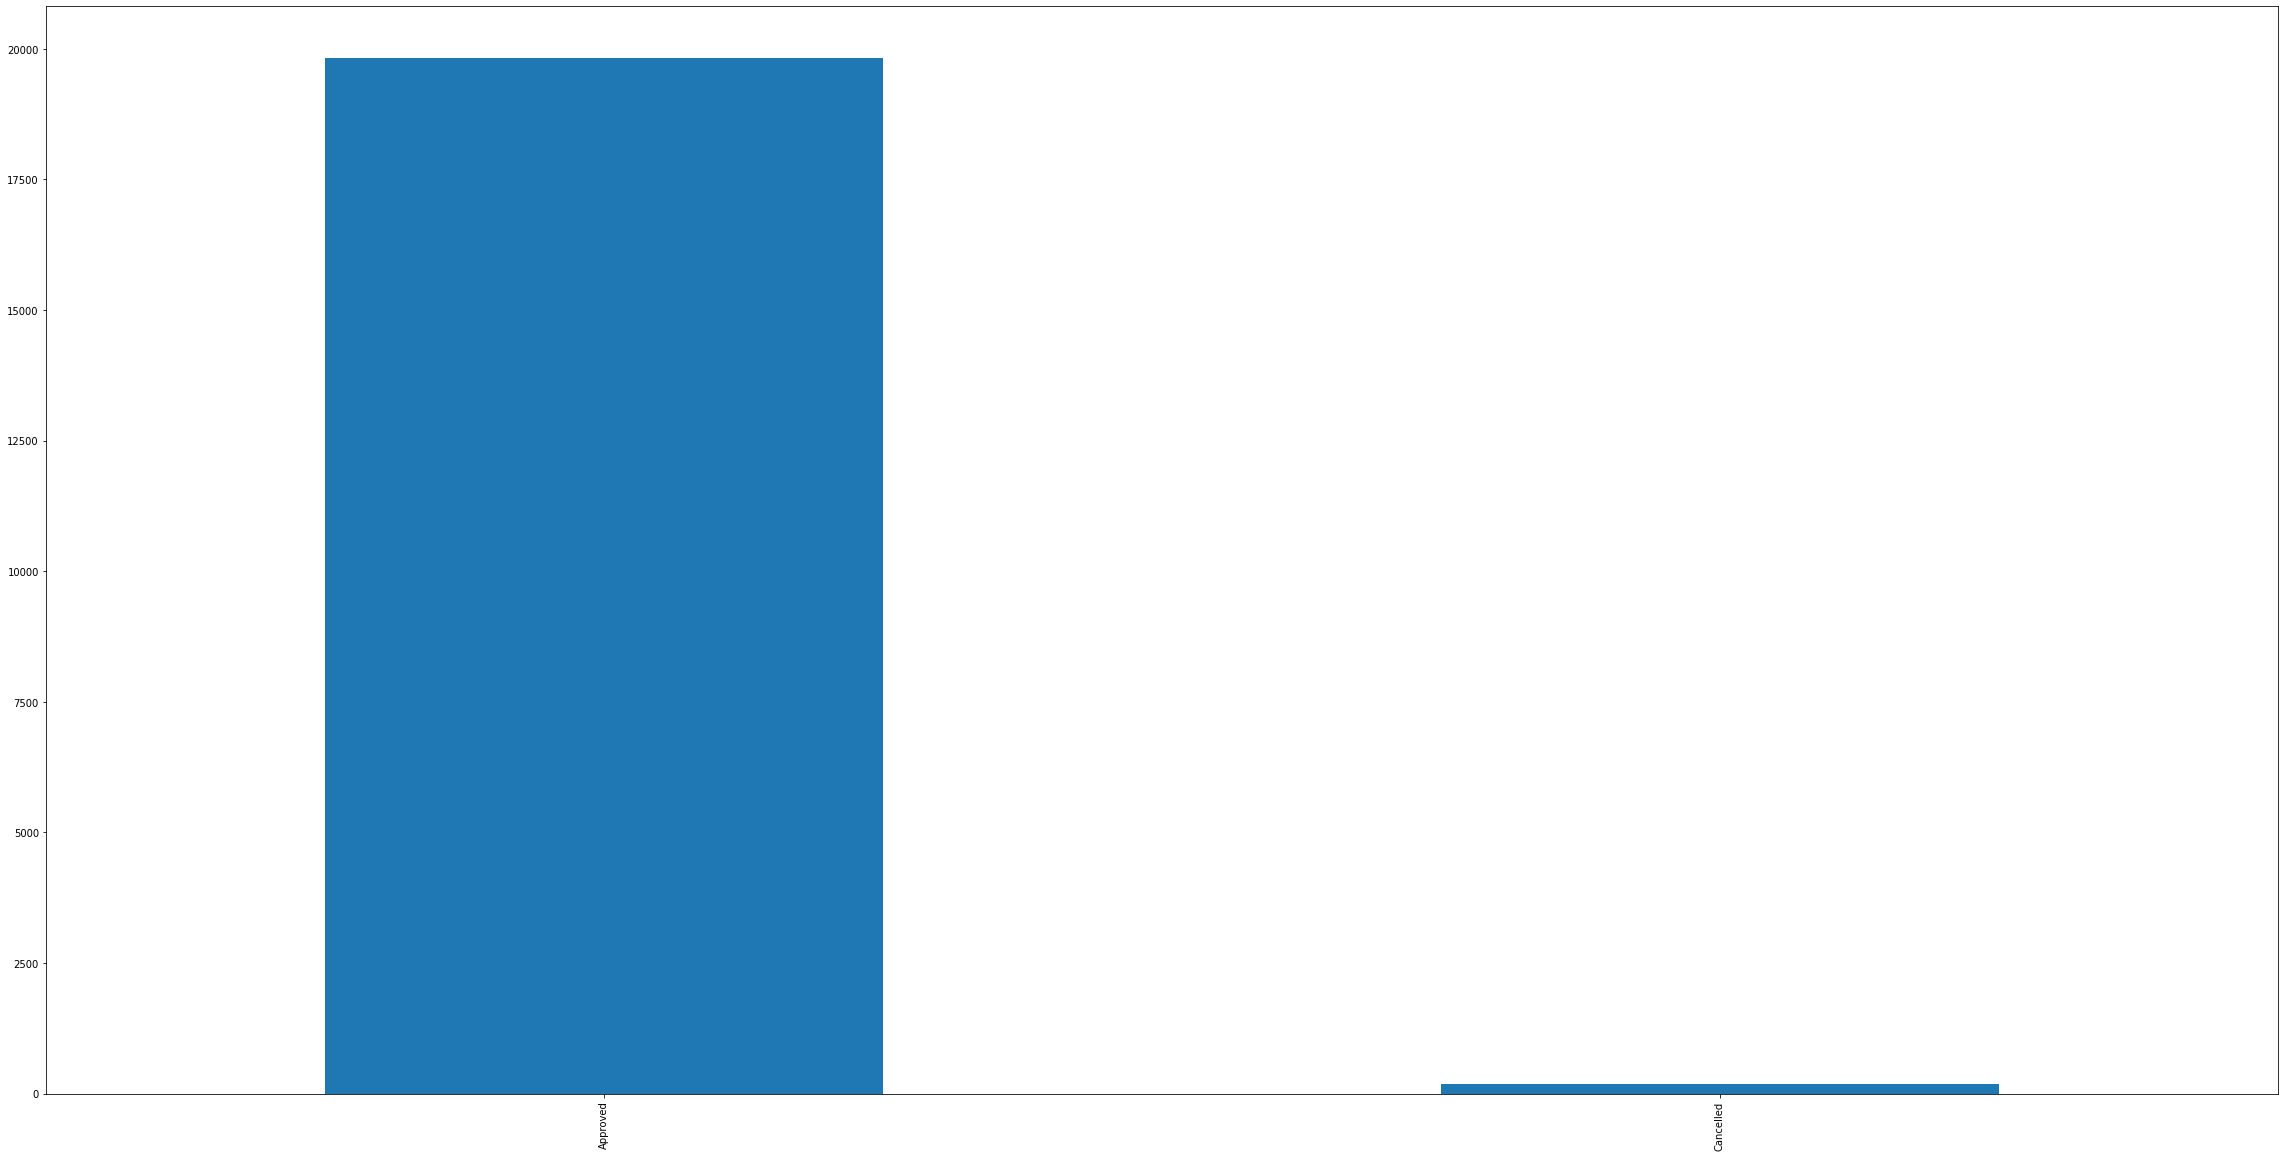

In [51]:
order_status= Cat_check(transactions, 'order_status')

public_method_names = [method for method in dir(order_status) if callable(getattr(order_status, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(order_status, method)()  # call

In [52]:
transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### 3. online_order   (dtype: float, missing value: 360)

Maximum: 1.0
Minimum: 0.0

Count: 19640
Null:  360
PCT:   1.8



/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


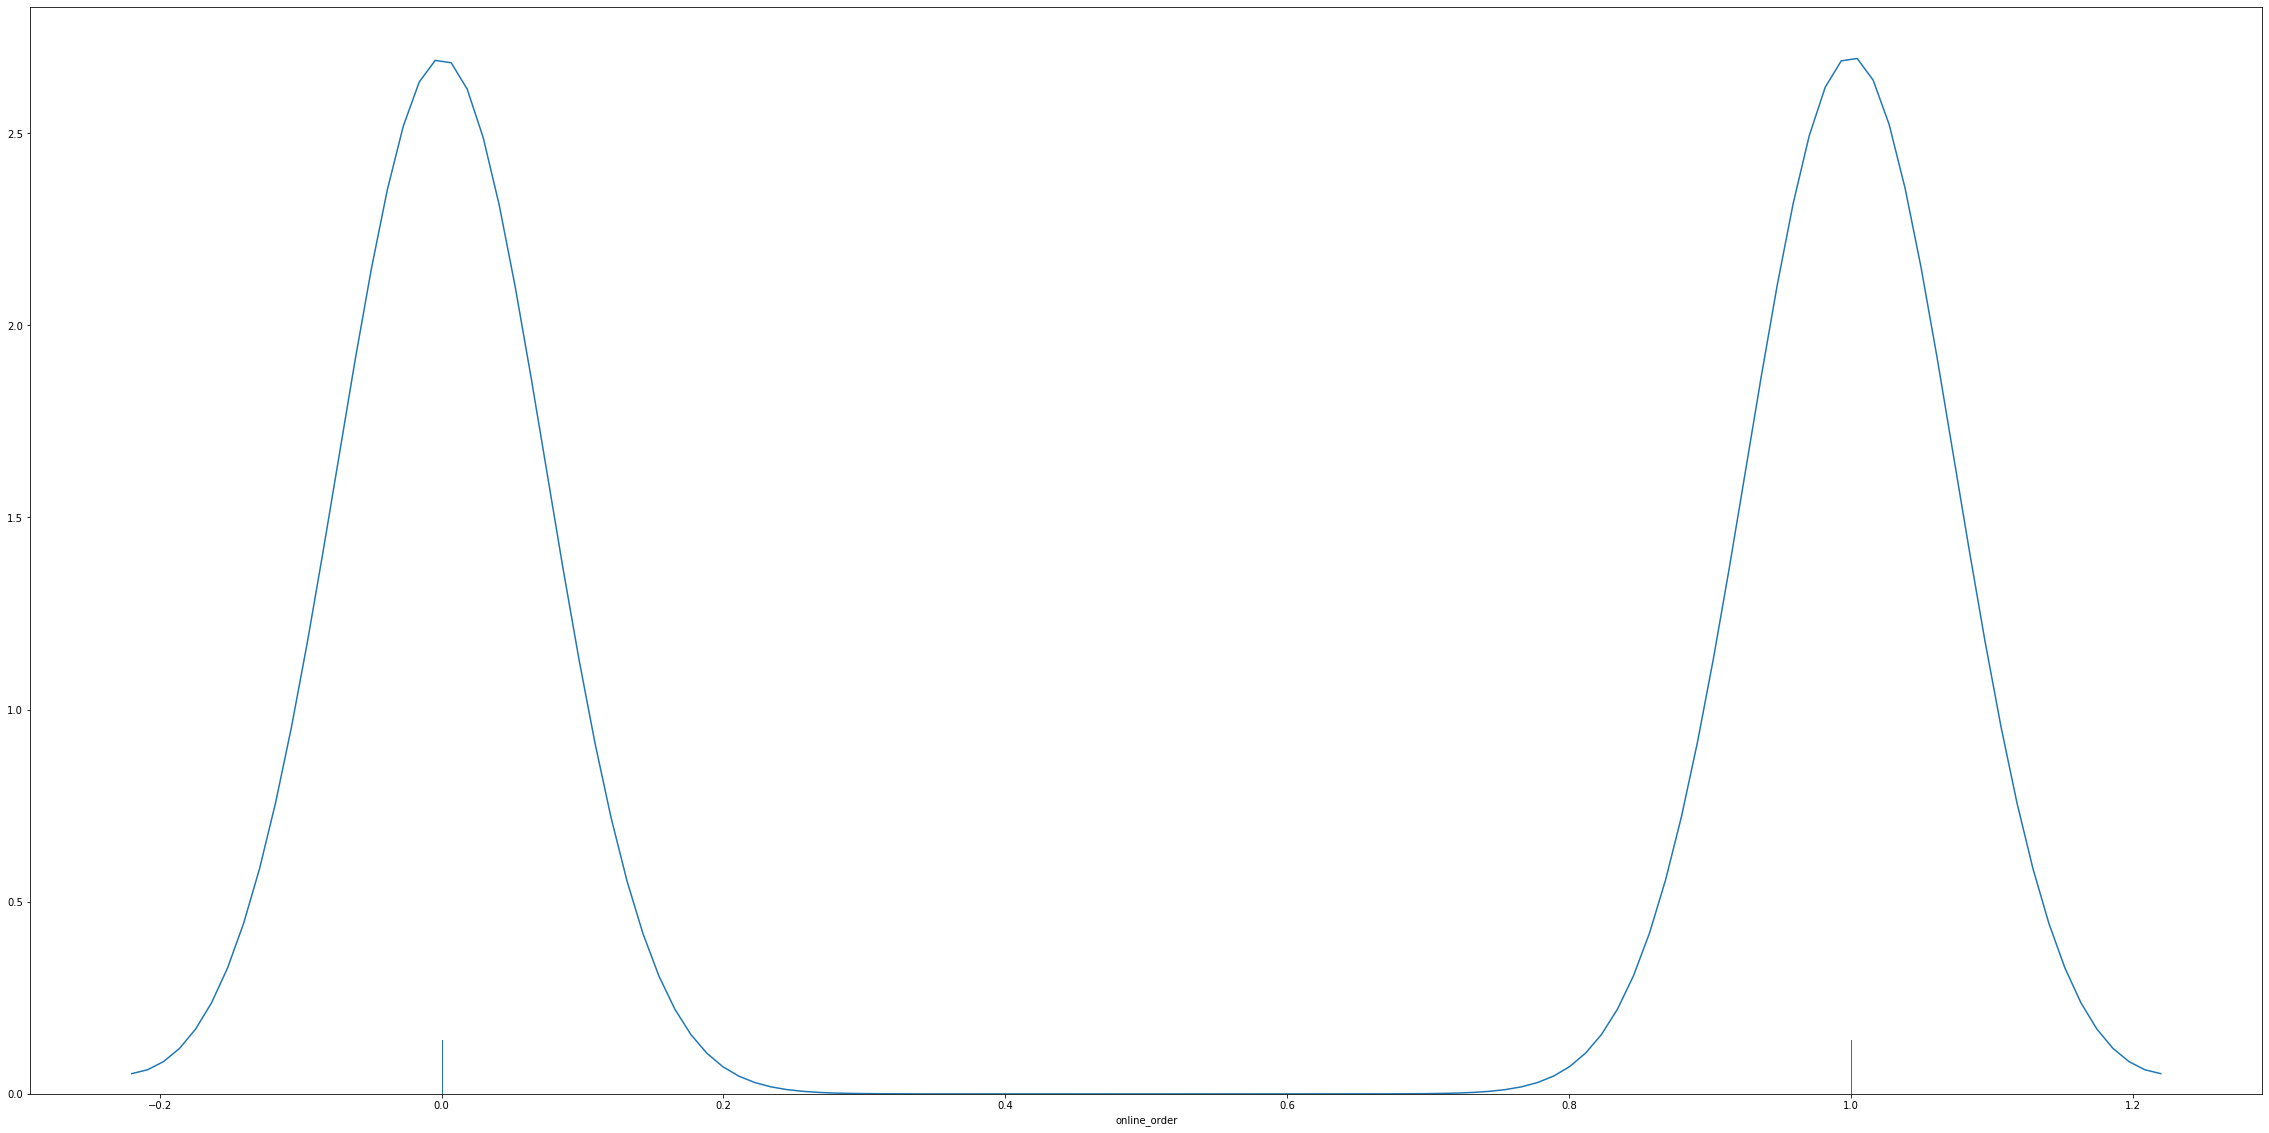

In [53]:
online_order = Num_check(transactions, 'online_order')

public_method_names = [method for method in dir(online_order) if callable(getattr(online_order, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(online_order, method)()  # call

Count: 19640
Null:  360
PCT:   1.8

Top  10:
1.0    9829
0.0    9811
Name: online_order, dtype: int64

Last 10:
1.0    9829
0.0    9811
Name: online_order, dtype: int64



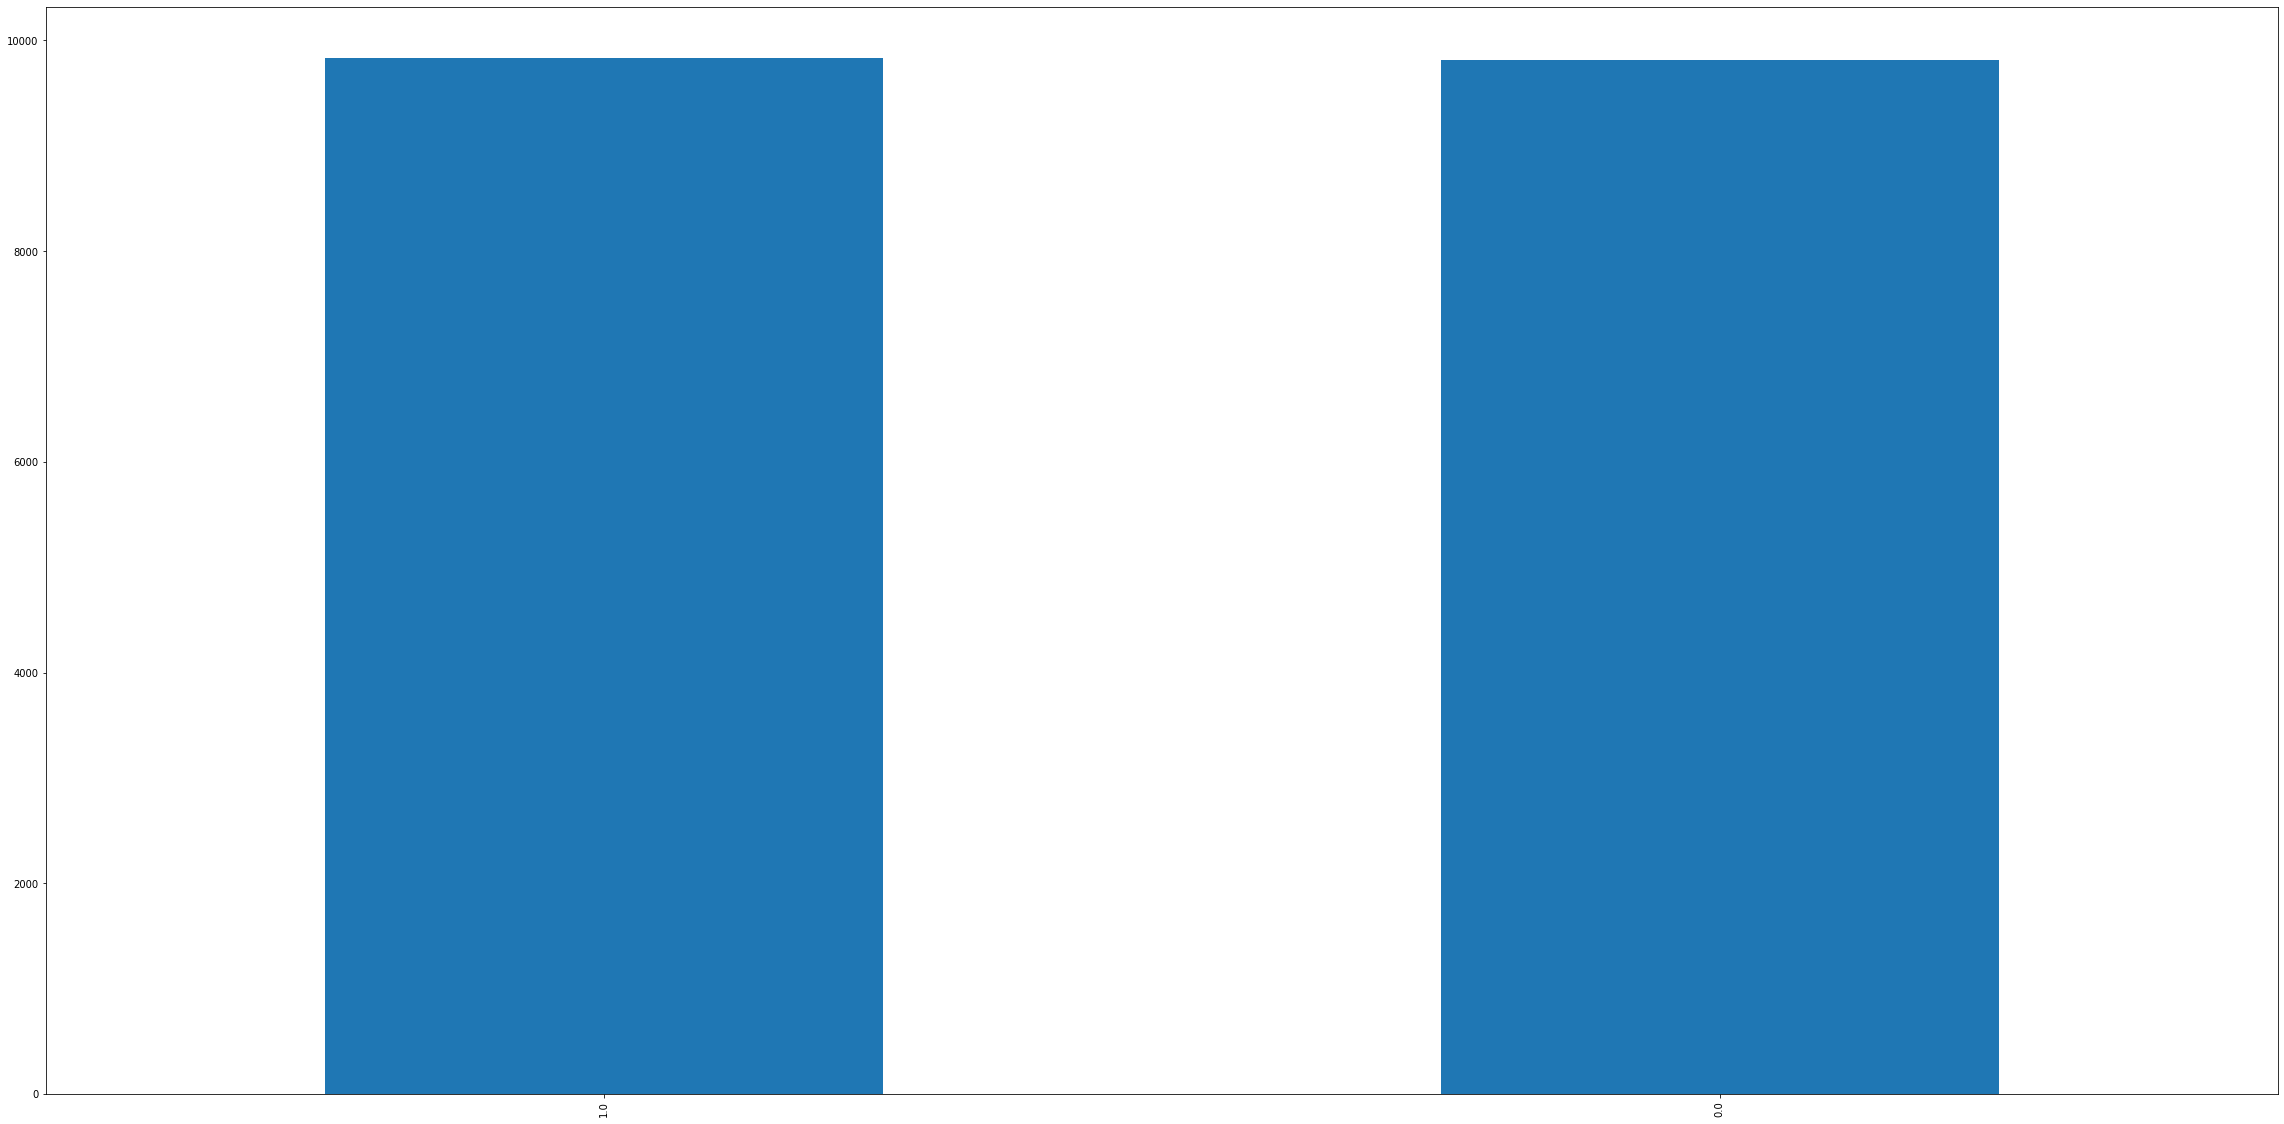

In [54]:
online_order = Cat_check(transactions, 'online_order')

public_method_names = [method for method in dir(online_order) if callable(getattr(online_order, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(online_order, method)()  # call

### Problem Summary - online_order
| Problem  | Solution  |   
|---|---|
|360 missing values| evenly distribute to each exist class (1,0) or just drop it all)|

### 4. brand   (dtype: objet, missing value: 197)

In [55]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

Count: 19803
Null:  197
PCT:   0.985

Top  10:
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

Last 10:
Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64



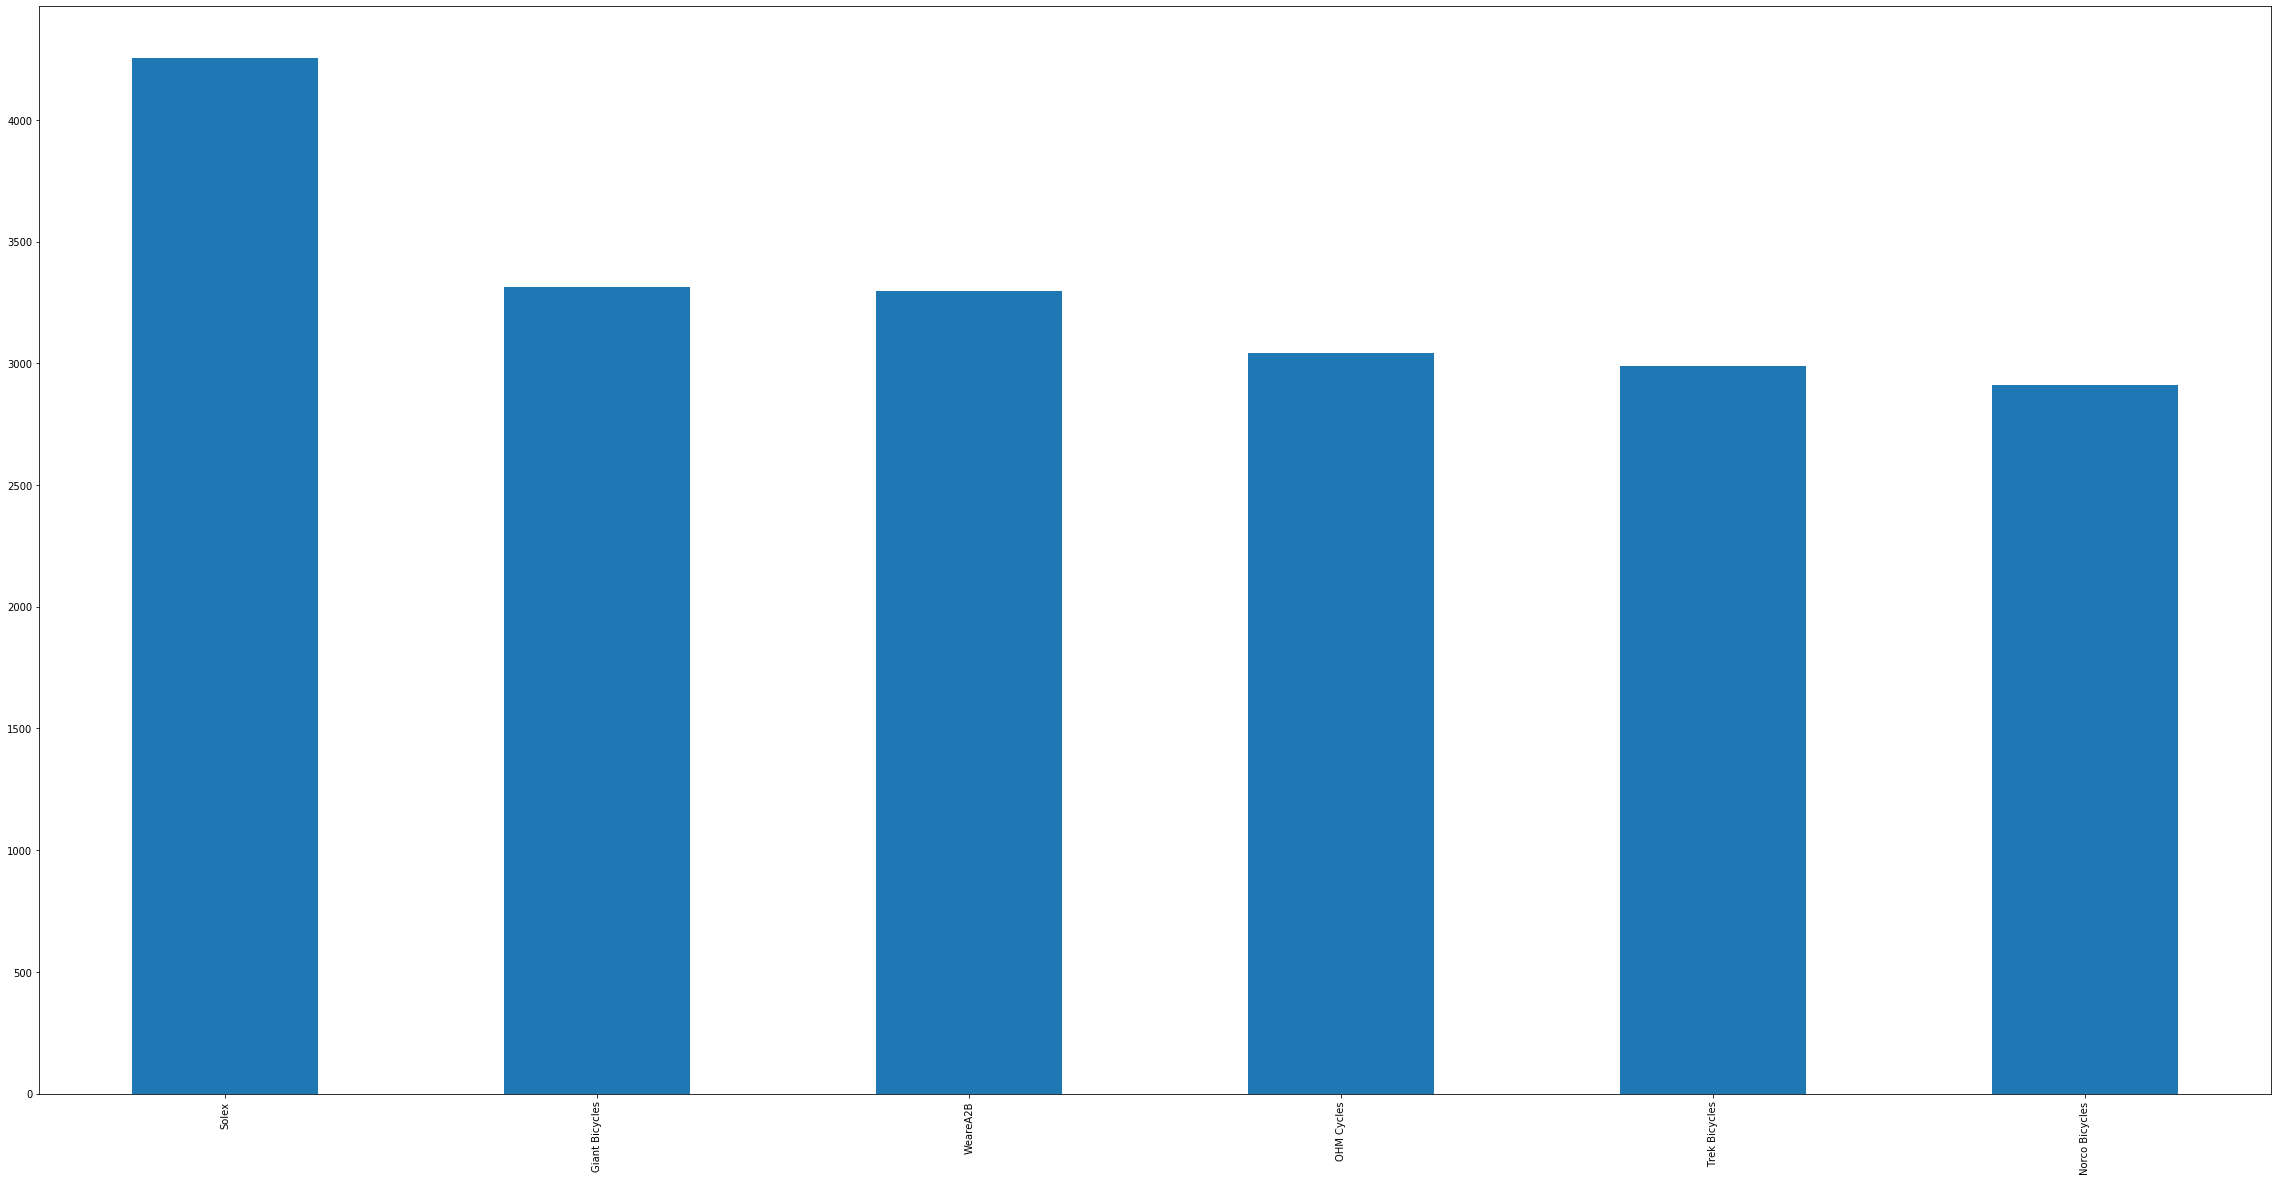

In [56]:
brand = Cat_check(transactions, 'brand')

public_method_names = [method for method in dir(brand) if callable(getattr(brand, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(brand, method)()  # call

### Problem Summary - brand
| Problem  | Solution  |   
|---|---|
|197 missing values| using "Unknown" label to replace|

### 5. product_line   (dtype: objet, missing value: )

Count: 19803
Null:  197
PCT:   0.985

Top  10:
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

Last 10:
Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64



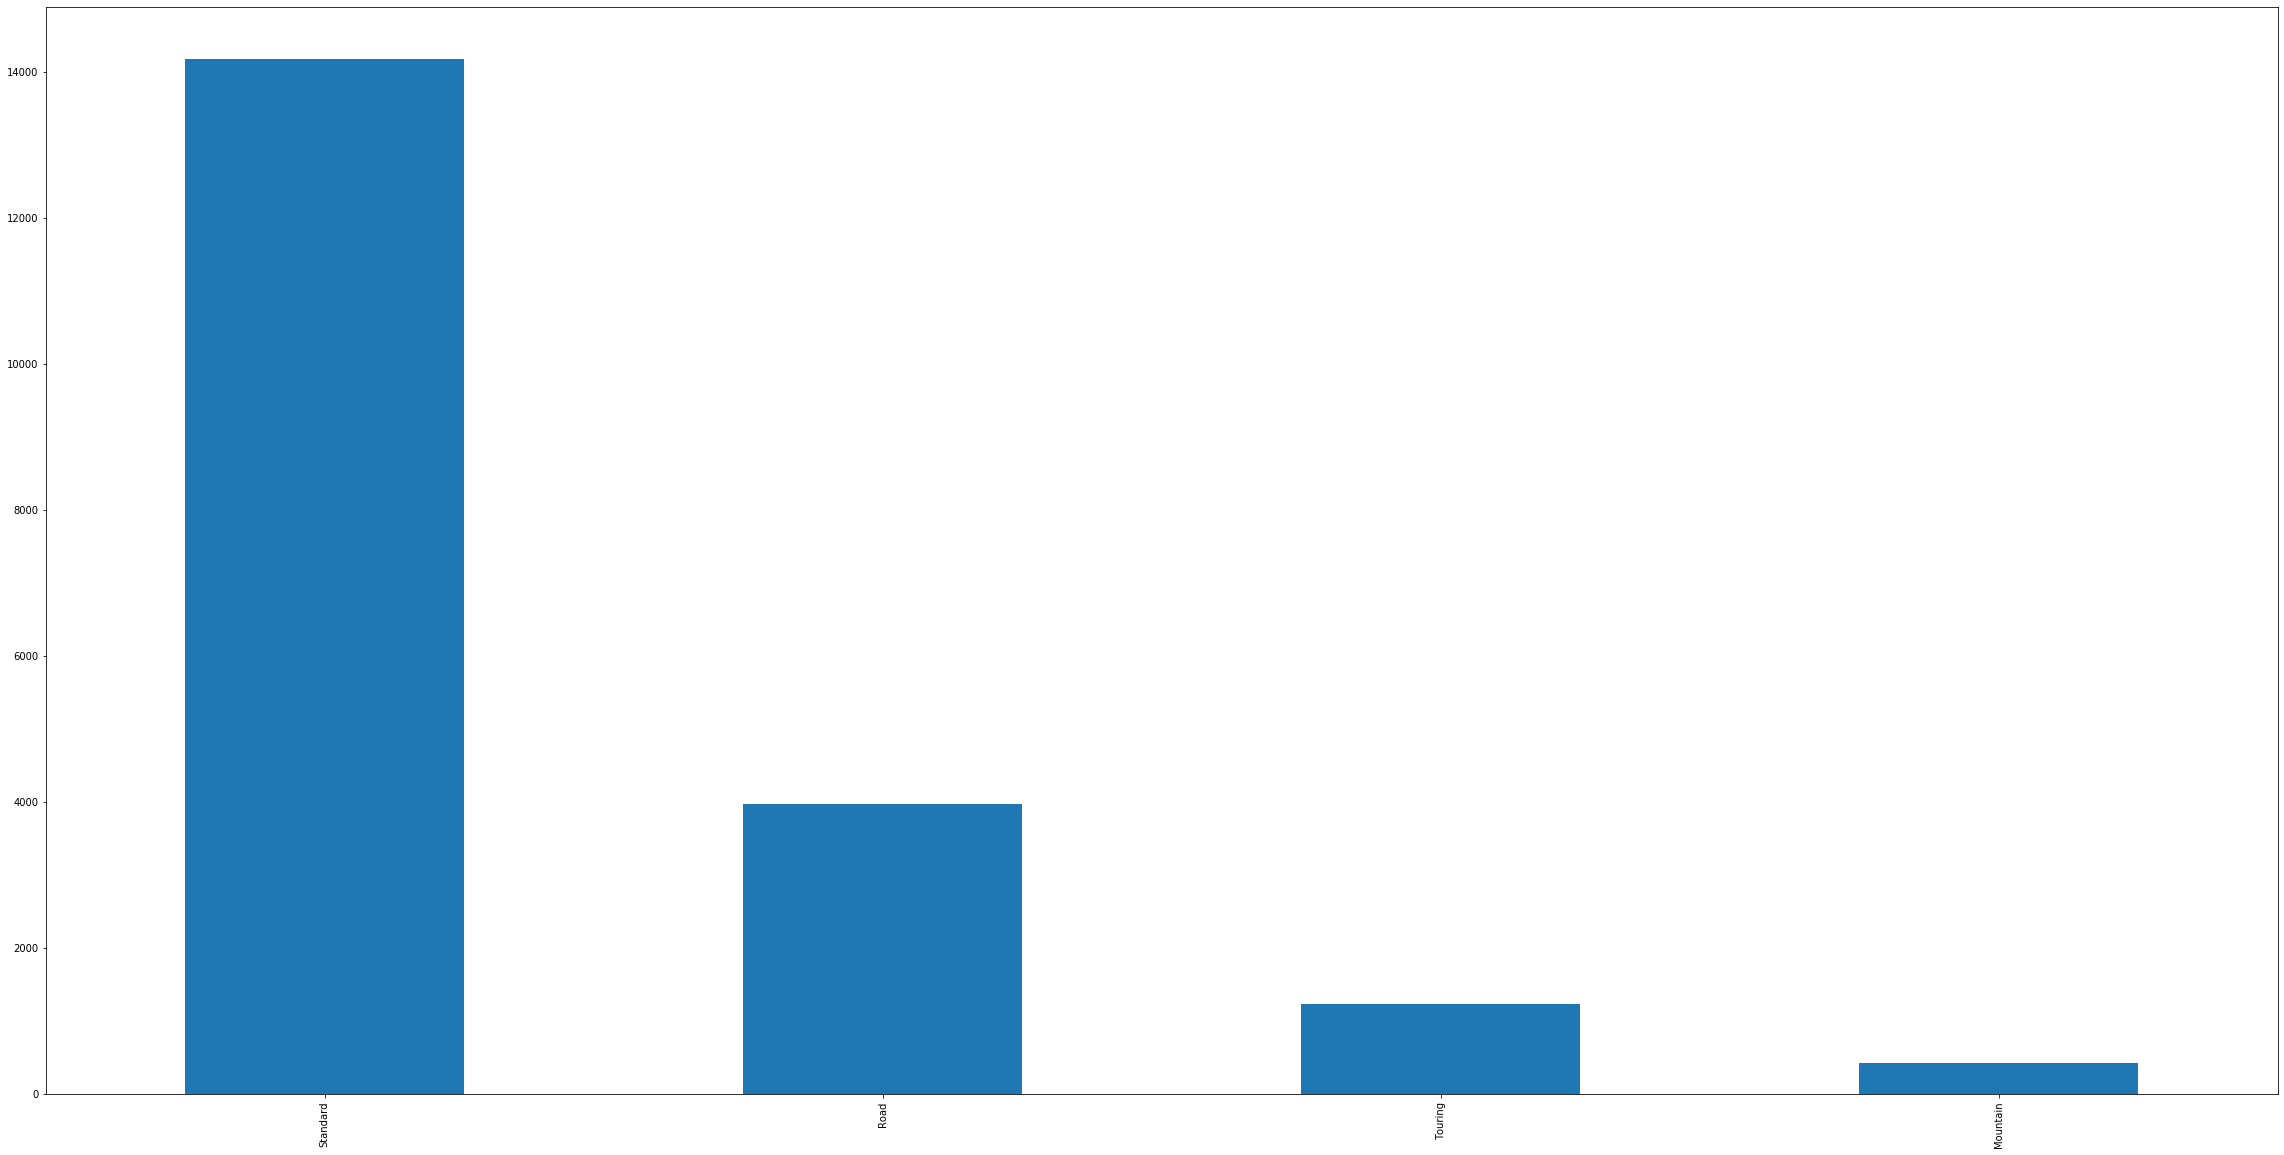

In [57]:
product_line = Cat_check(transactions, 'product_line')

public_method_names = [method for method in dir(product_line) if callable(getattr(product_line, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_line, method)()  # call

In [58]:
transactions.query("(product_line != product_line) and (brand != brand) " )

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
136,137,0,431,2017-09-23,0.0,Approved,NaN,NaN,NaN,NaN,1942.61,NaN,NaN
159,160,0,3300,2017-08-27,0.0,Approved,NaN,NaN,NaN,NaN,1656.86,NaN,NaN
366,367,0,1614,2017-03-10,0.0,Approved,NaN,NaN,NaN,NaN,850.89,NaN,NaN
406,407,0,2559,2017-06-14,1.0,Approved,NaN,NaN,NaN,NaN,710.59,NaN,NaN
676,677,0,2609,2017-07-02,0.0,Approved,NaN,NaN,NaN,NaN,1972.01,NaN,NaN
780,781,0,897,2017-05-10,1.0,Approved,NaN,NaN,NaN,NaN,311.54,NaN,NaN
1003,1004,0,2254,2017-05-16,0.0,Cancelled,NaN,NaN,NaN,NaN,205.84,NaN,NaN
1130,1131,0,2163,2017-03-09,0.0,Approved,NaN,NaN,NaN,NaN,605.54,NaN,NaN
1196,1197,0,2234,2017-04-04,0.0,Approved,NaN,NaN,NaN,NaN,756.31,NaN,NaN
1282,1283,0,397,2017-08-09,0.0,Approved,NaN,NaN,NaN,NaN,850.00,NaN,NaN


### Problem Summary - product_line
| Problem  | Solution  |   
|---|---|
|197 missing values| using "Unknown" label to replace|
|if brand is null prodict_line also null||

### 6. product_class   (dtype: objet, missing value: )

Count: 19803
Null:  197
PCT:   0.985

Top  10:
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

Last 10:
medium    13826
high       3013
low        2964
Name: product_class, dtype: int64



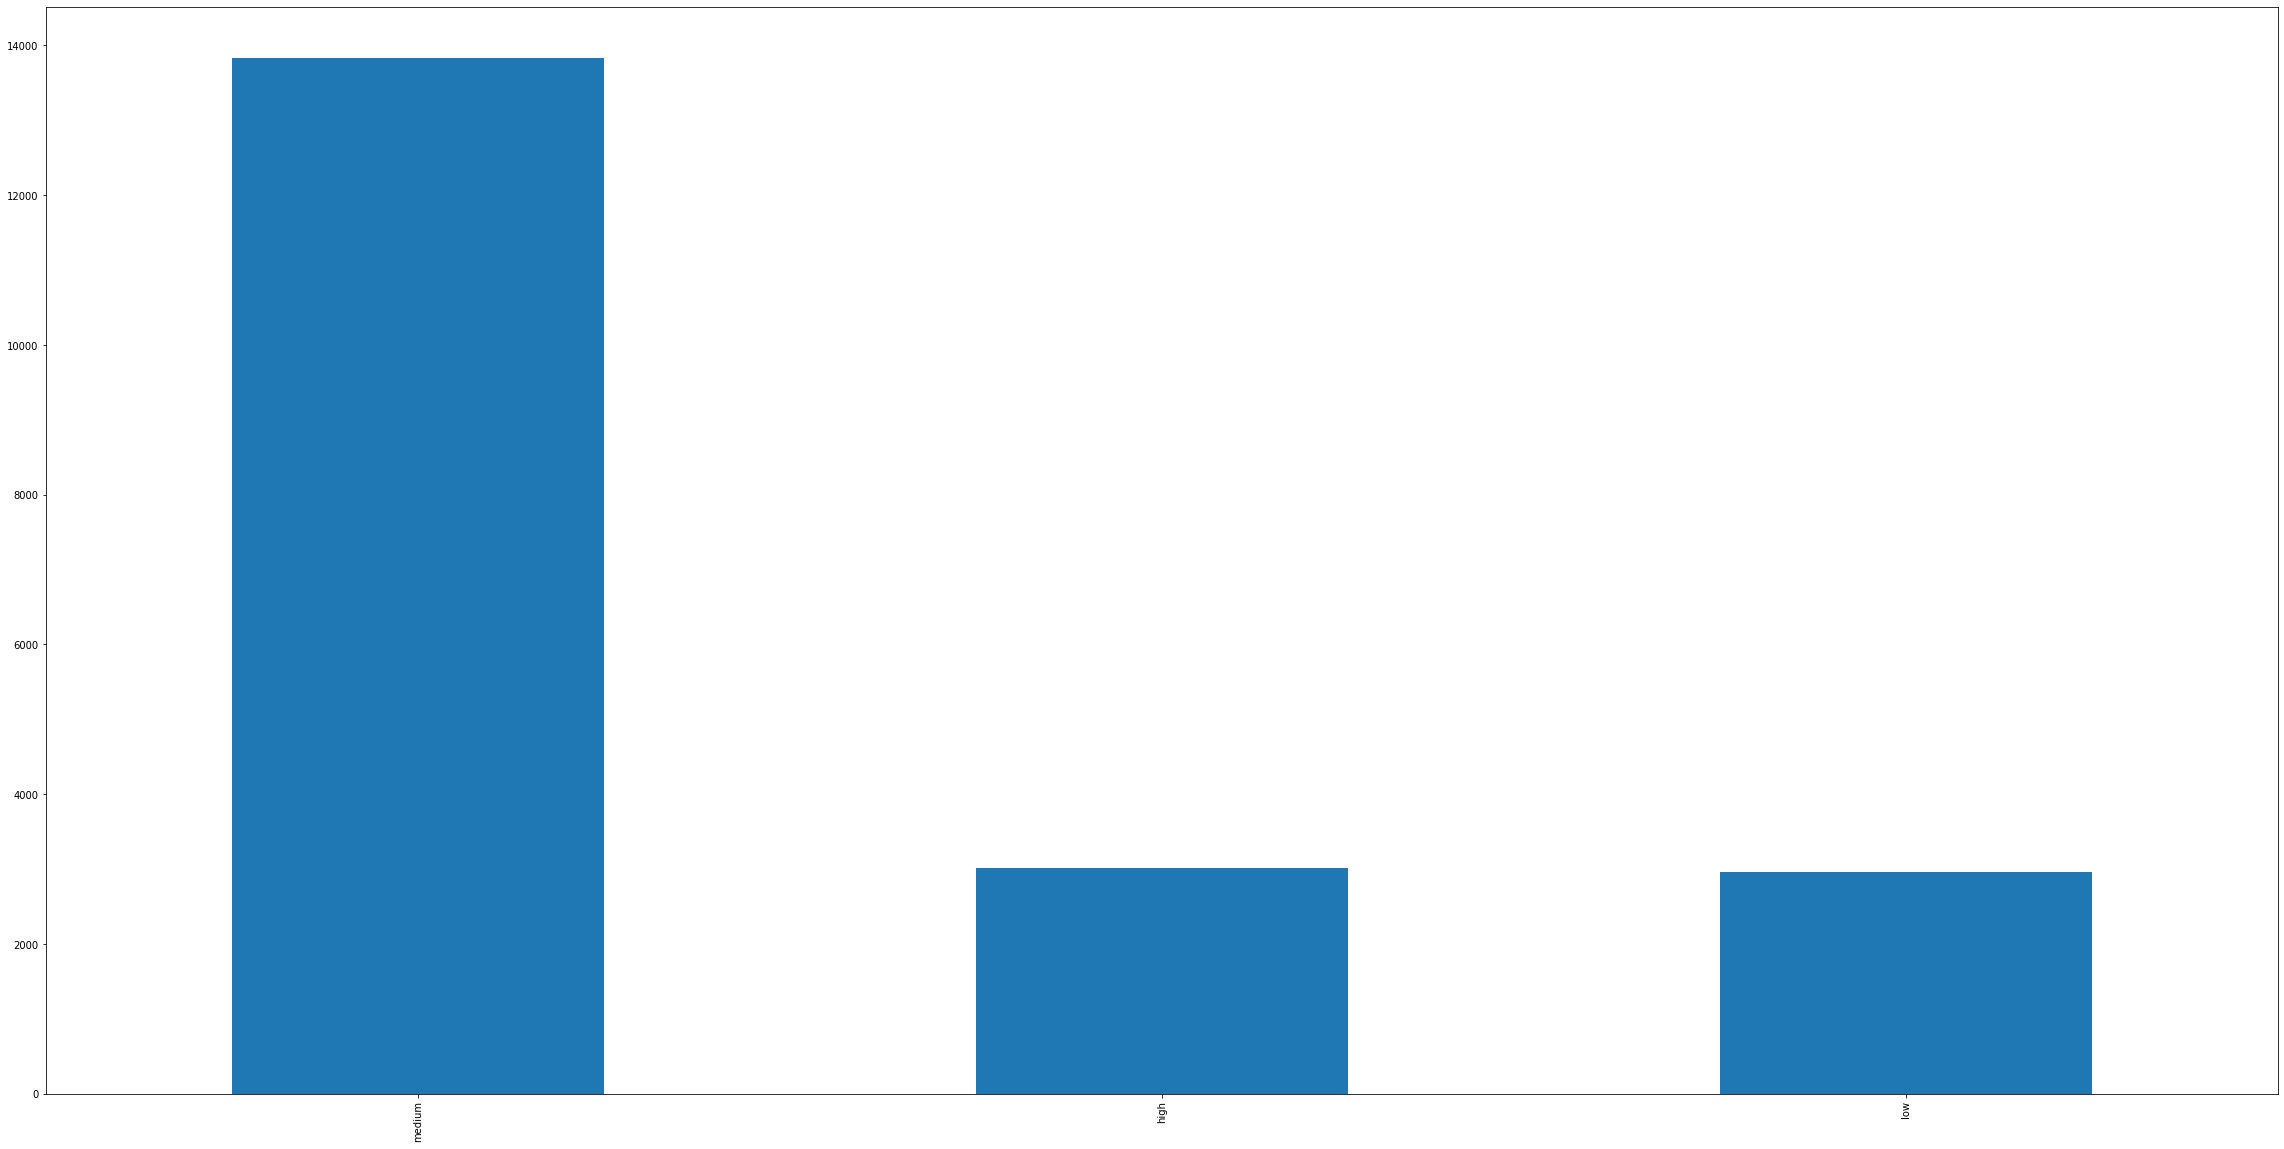

In [59]:
product_class = Cat_check(transactions, 'product_class')

public_method_names = [method for method in dir(product_class) if callable(getattr(product_class, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_class, method)()  # call

### Problem Summary - product_class
| Problem  | Solution  |   
|---|---|
|197 missing values| using "Unknown" label to replace|
|if brand, product_line are null product_class also null||

### 7. product_size   (dtype: objet, missing value: )

Count: 19803
Null:  197
PCT:   0.985

Top  10:
medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

Last 10:
medium    12990
large      3976
small      2837
Name: product_size, dtype: int64



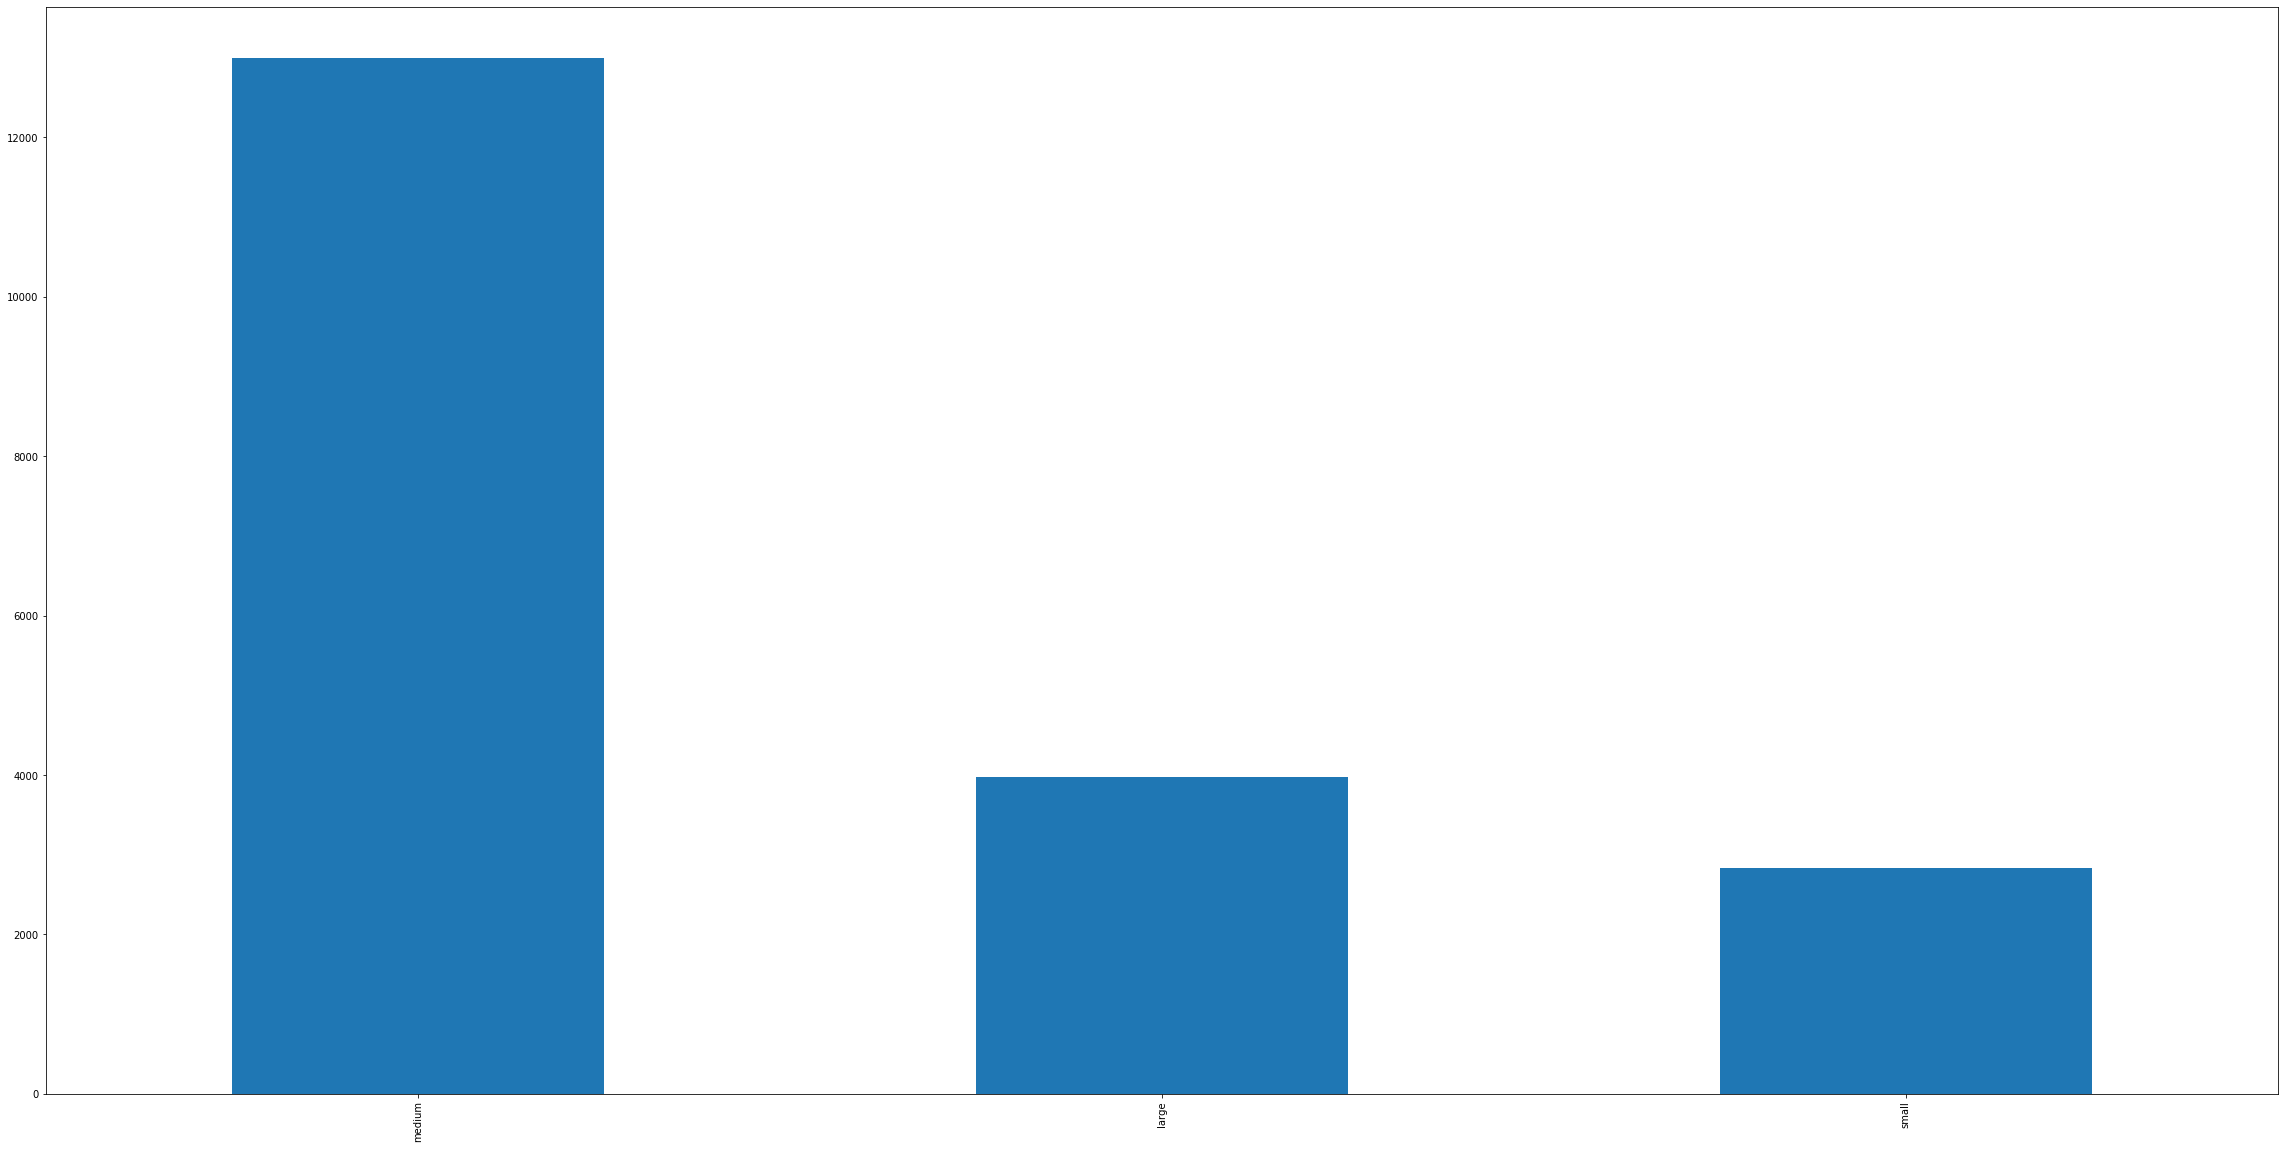

In [60]:
product_size = Cat_check(transactions, 'product_size')

public_method_names = [method for method in dir(product_size) if callable(getattr(product_size, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_size, method)()  # call

### Problem Summary - product_size
| Problem  | Solution  |   
|---|---|
|197 missing values| using "Unknown" label to replace|
|if brand, product_line, and product_class are null product_size also null||

### 8. list_price   (dtype: float, missing value: )

Maximum: 2091.47
Minimum: 12.01

Count: 20000
Null:  0
PCT:   0.0



,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


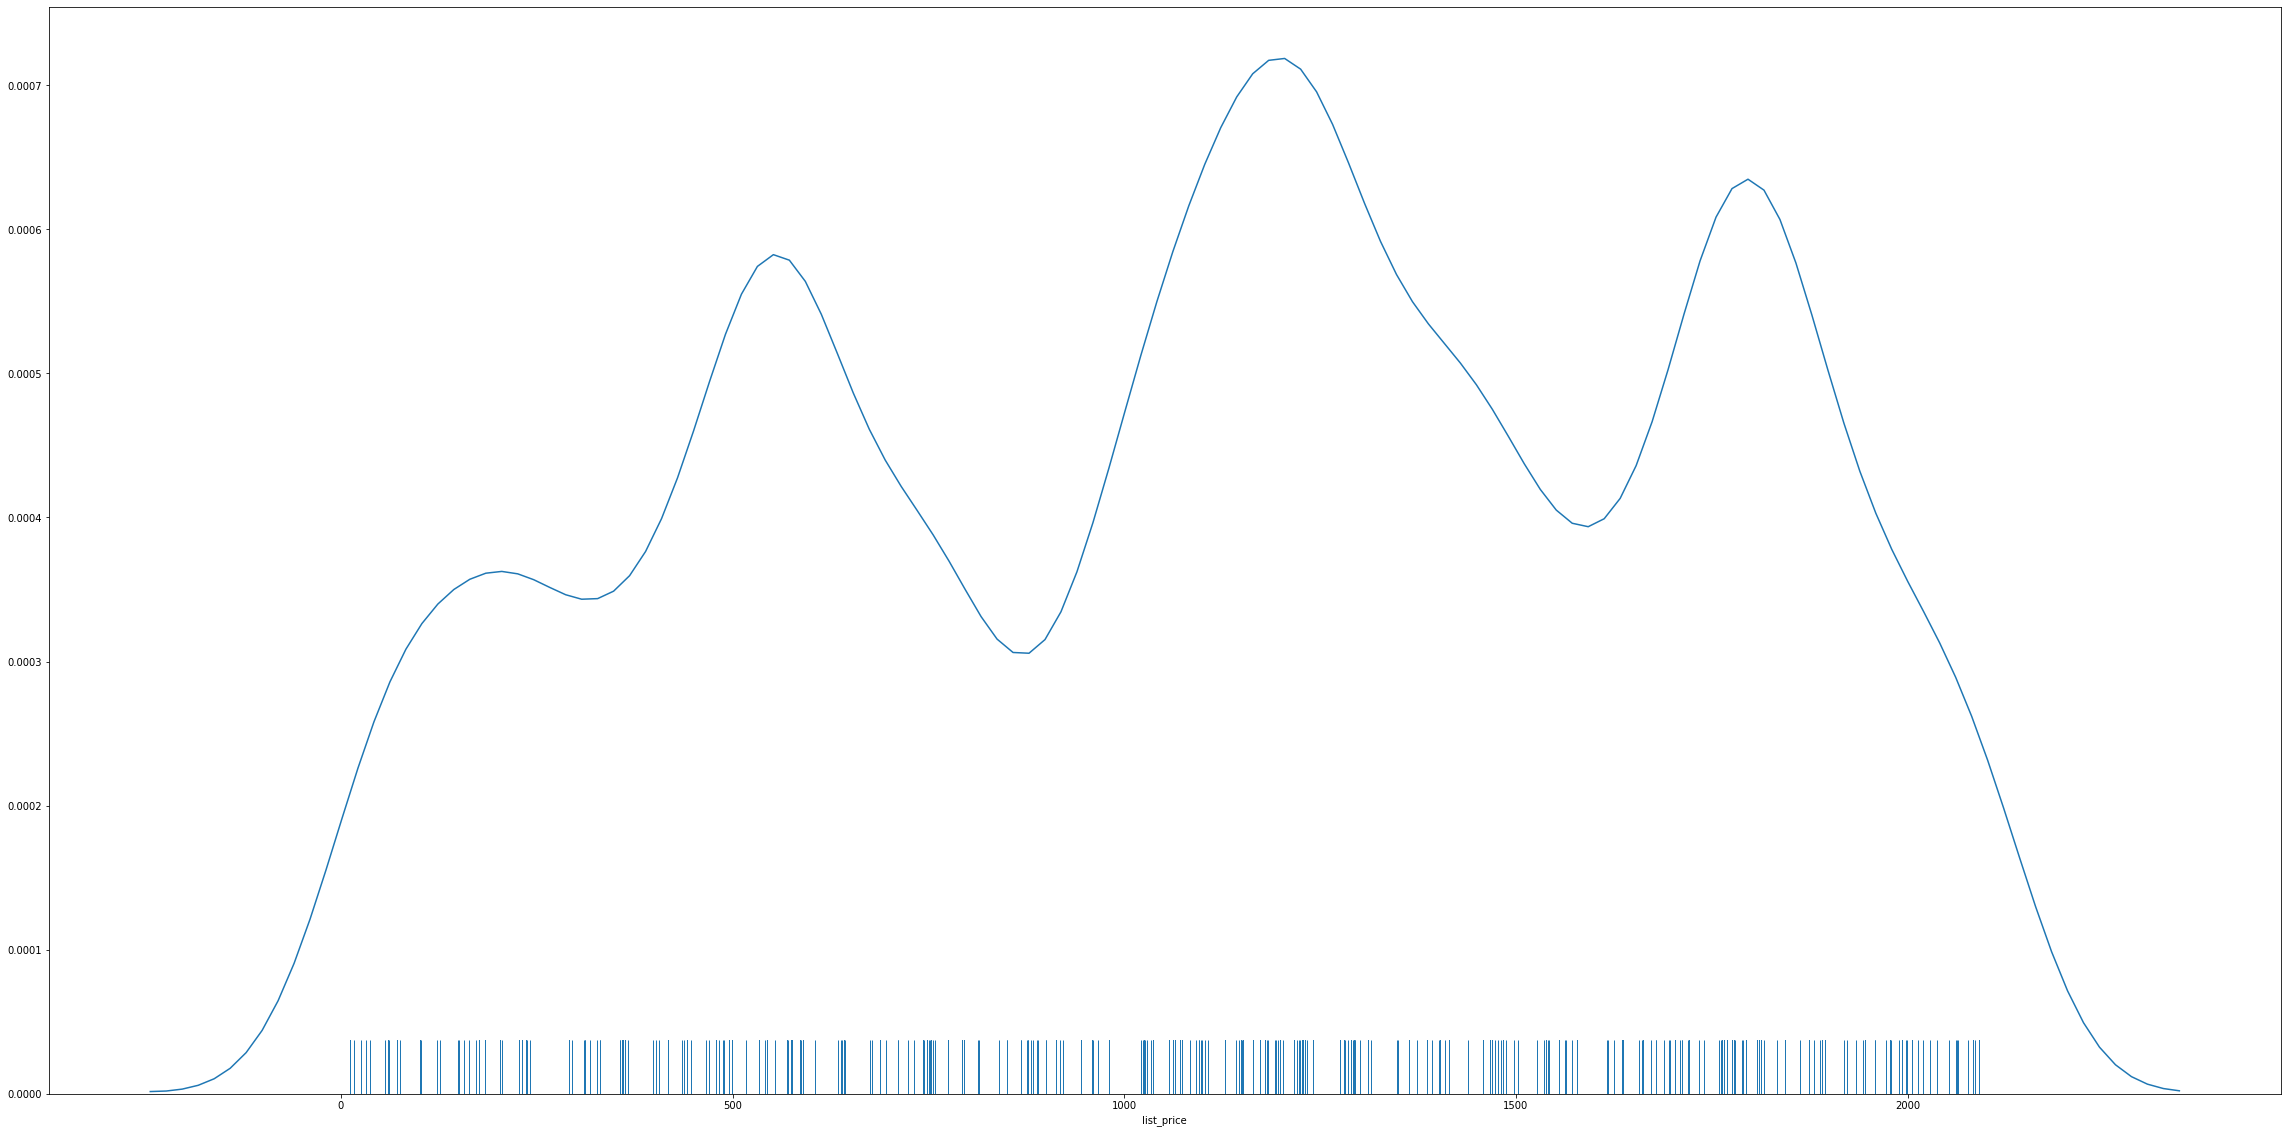

In [61]:
list_price = Num_check(transactions, 'list_price')

public_method_names = [method for method in dir(list_price) if callable(getattr(list_price, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(list_price, method)()  # call

### 9. standard_cost   (dtype: float, missing value: )

Maximum: 1759.85
Minimum: 7.21

Count: 19803
Null:  197
PCT:   0.985



/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
13,14,16,2717,2017-09-10,0.0,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,34586.0
33,34,99,2003,2017-02-28,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,38991.0
55,56,47,3406,2017-11-14,0.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,35470.0
59,60,60,3473,2017-12-18,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41848.0
116,117,42,806,2017-03-24,0.0,Approved,OHM Cycles,Road,medium,small,1810.00,1610.90,34071.0
117,118,20,22,2017-03-21,0.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,40303.0
142,143,60,2135,2017-01-26,1.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,41047.0
179,180,20,3349,2017-03-18,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,40303.0
181,182,16,2282,2017-02-18,0.0,Approved,Norco Bicycles,Standard,high,small,1661.92,1479.11,41345.0
221,222,8,939,2017-07-08,1.0,Approved,Solex,Road,medium,small,1703.52,1516.13,40649.0


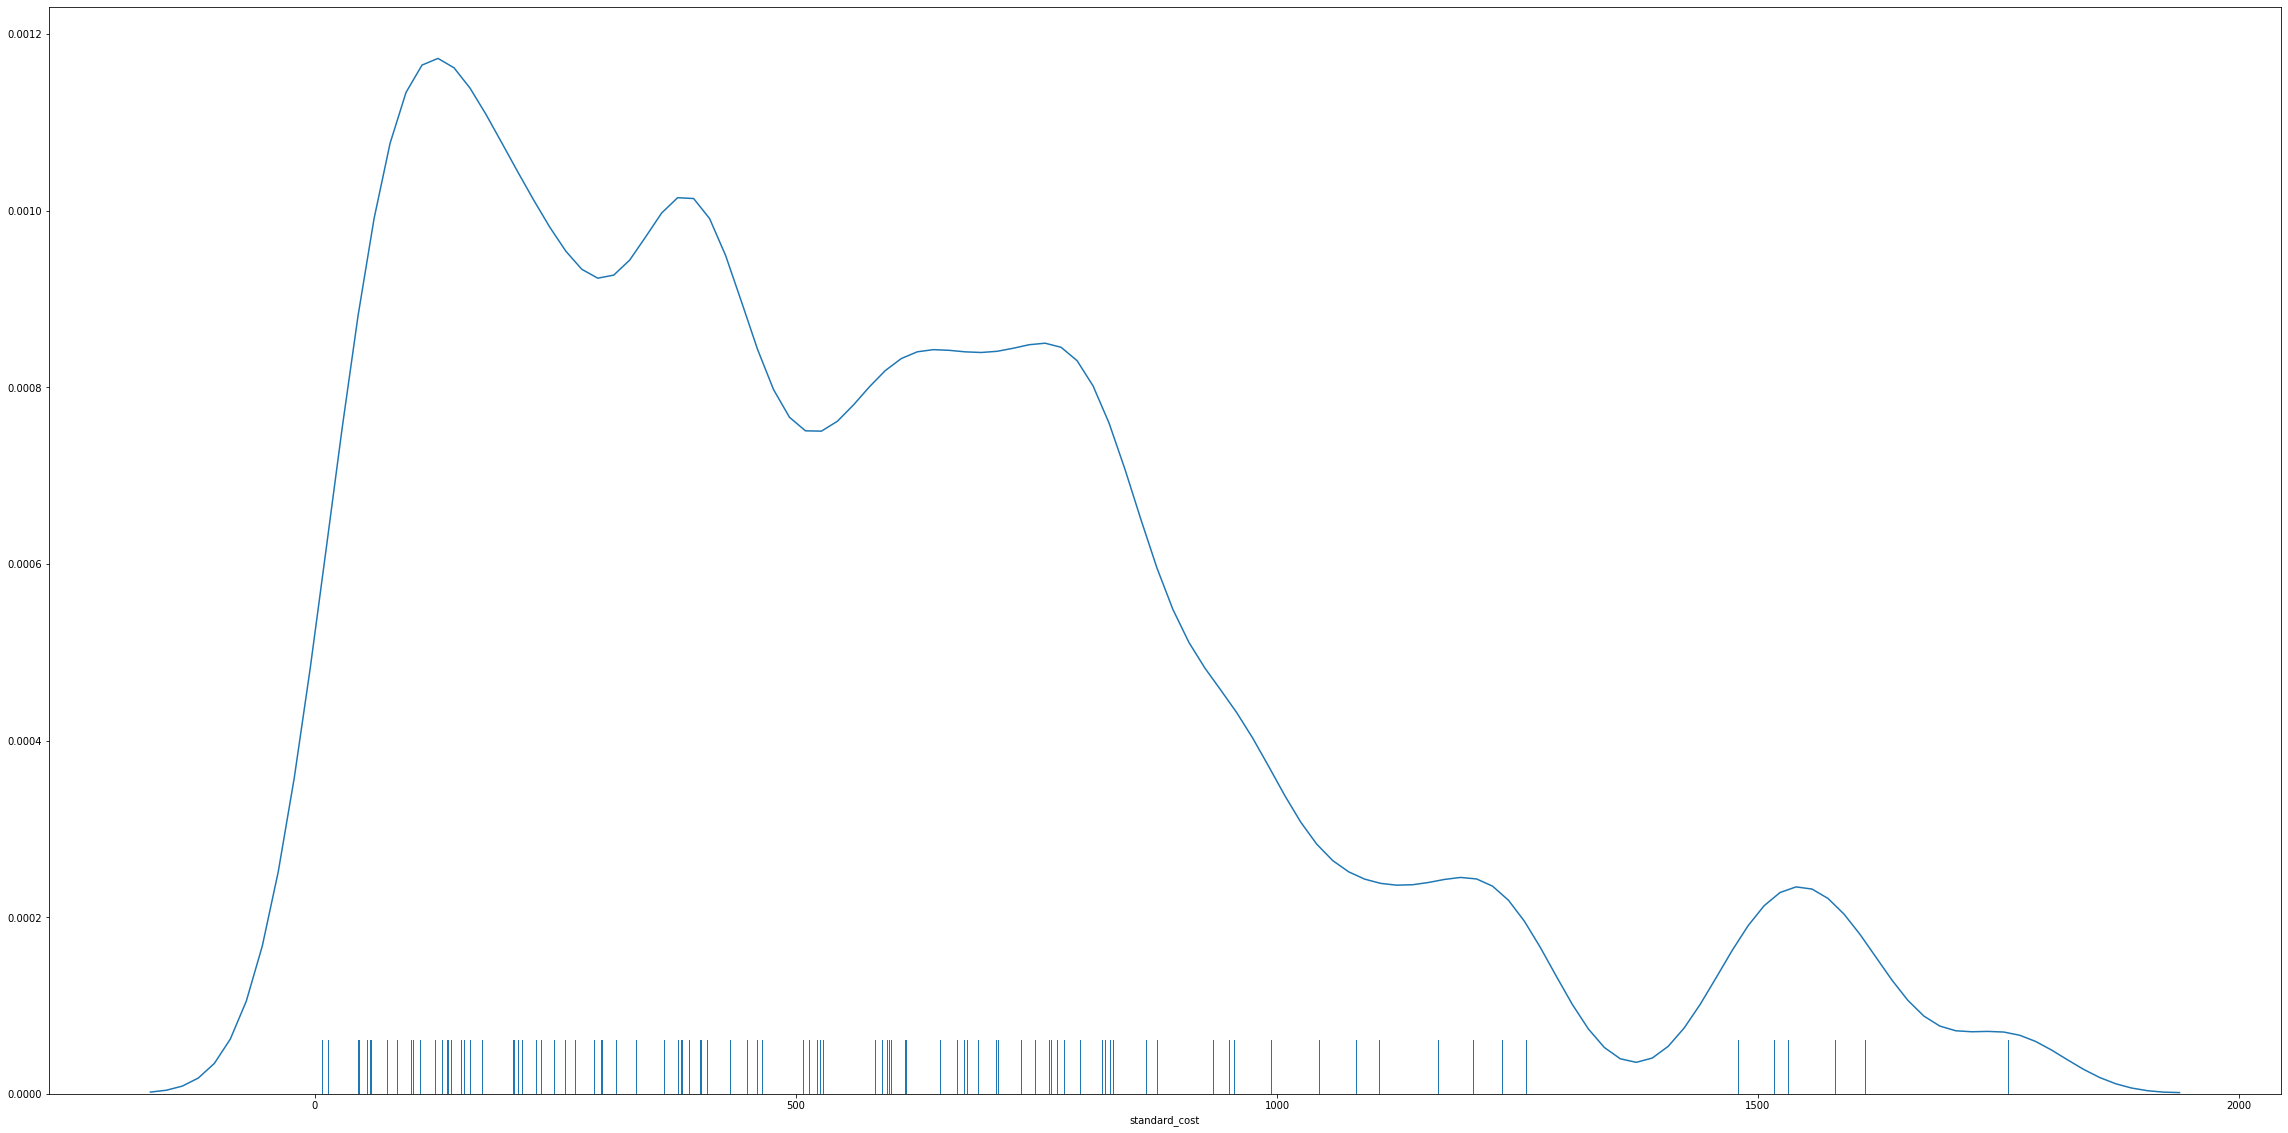

In [62]:
standard_cost = Num_check(transactions, 'standard_cost')

public_method_names = [method for method in dir(standard_cost) if callable(getattr(standard_cost, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(standard_cost, method)()  # call

In [63]:
transactions.standard_cost.describe()

count    19803.000000
mean       556.046951
std        405.955660
min          7.210000
25%        215.140000
50%        507.580000
75%        795.100000
max       1759.850000
Name: standard_cost, dtype: float64

In [64]:
std_cst = standard_cost.num_find_outliers()
std_cst.standard_cost.describe()

count    1122.000000
mean     1582.541185
std        92.093693
min      1479.110000
25%      1516.130000
50%      1580.470000
75%      1610.900000
max      1759.850000
Name: standard_cost, dtype: float64

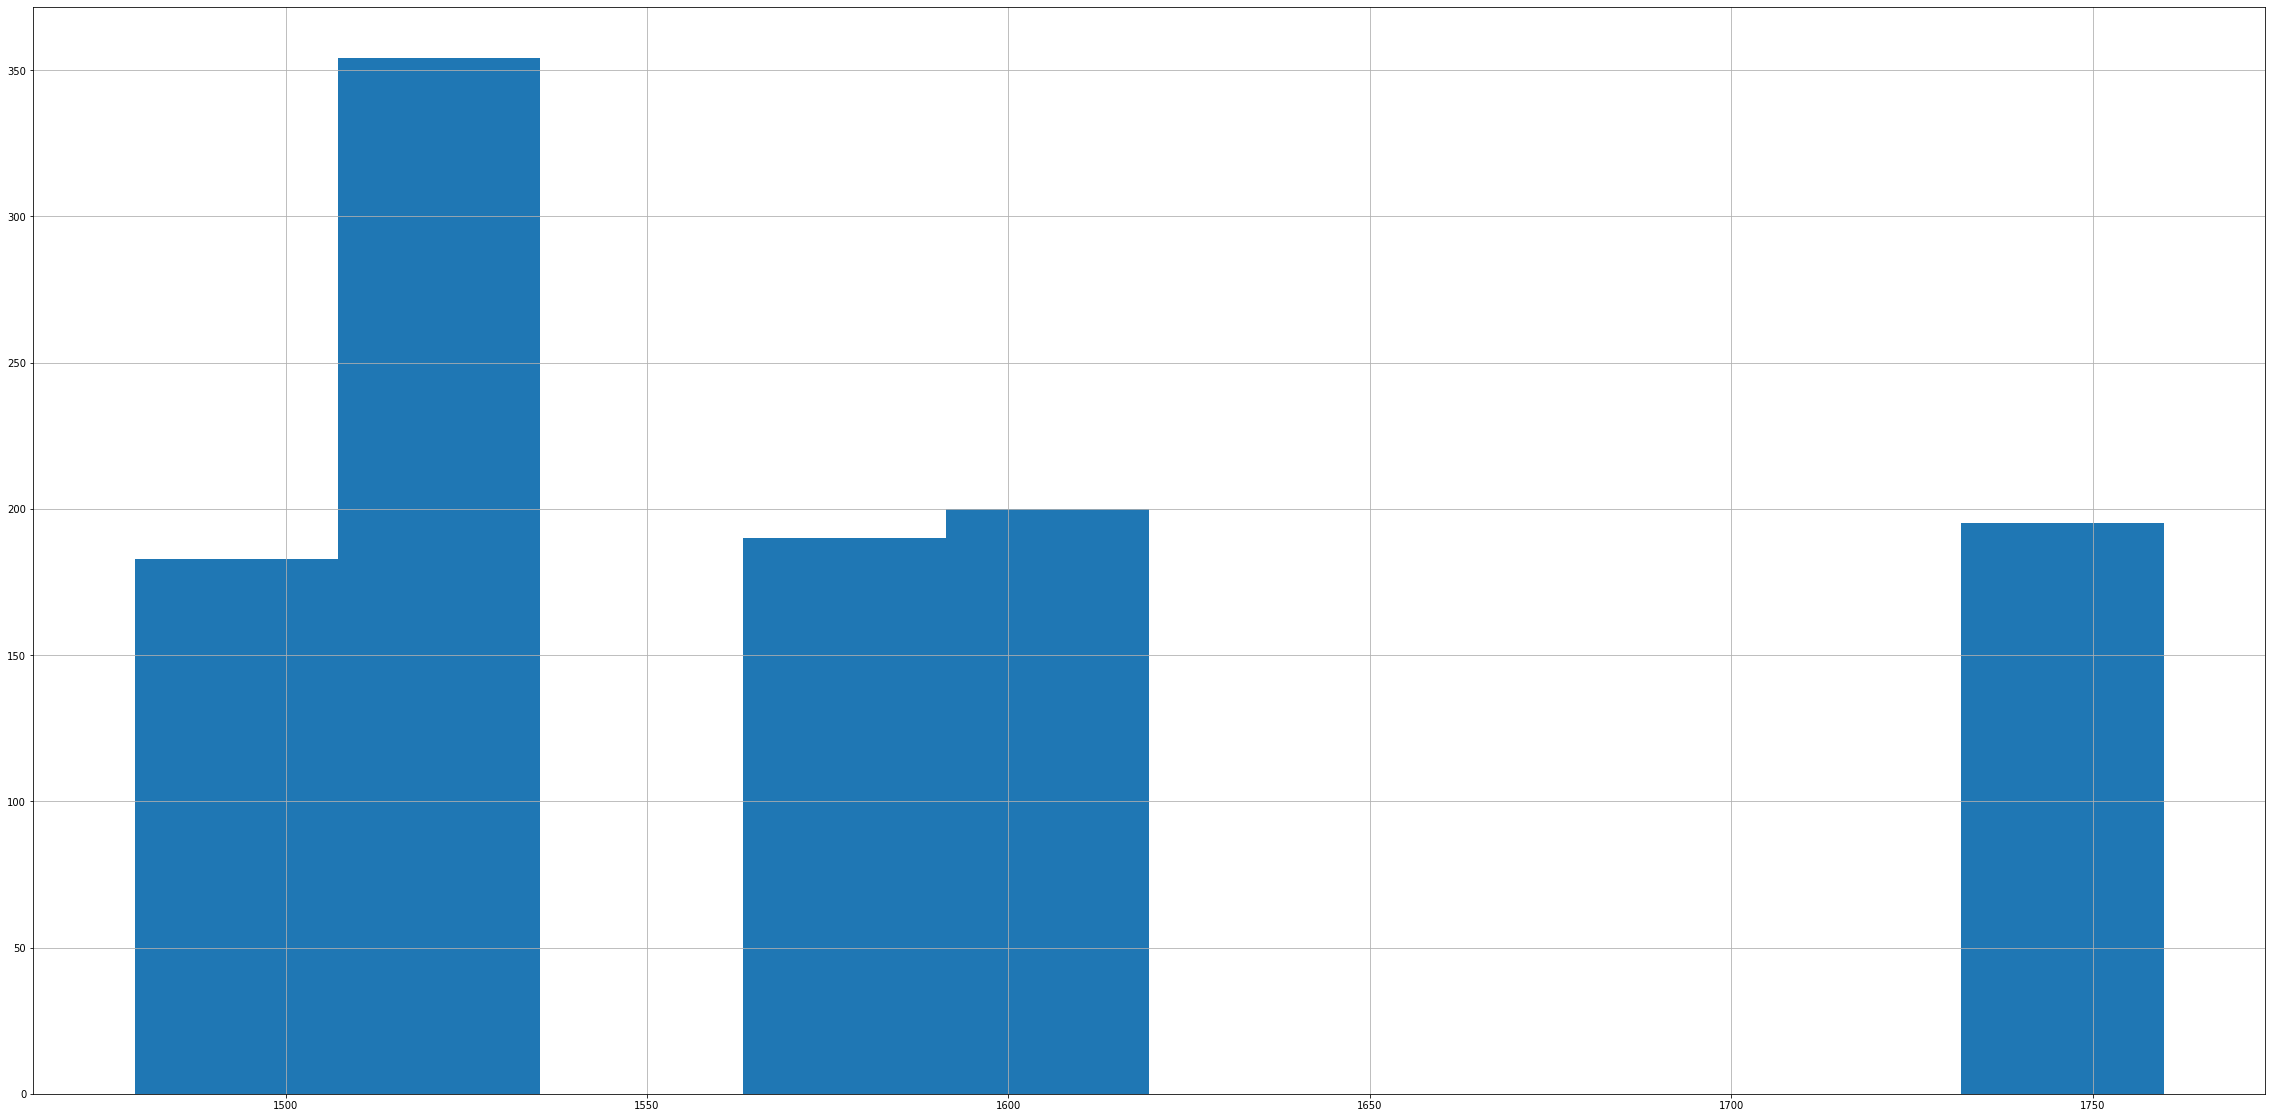

In [65]:
std_cst.standard_cost.hist()

### Problem Summary - standard_cost
| Problem  | Solution  |   
|---|---|
|1122 data are outliers, and all the outliers are concentrate on the right side of distribution -> the data skewed to the right||

### 10. product_first_sold_date   (dtype: float, missing value: )

Maximum: 42710.0
Minimum: 33259.0

Count: 19803
Null:  197
PCT:   0.985



/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date


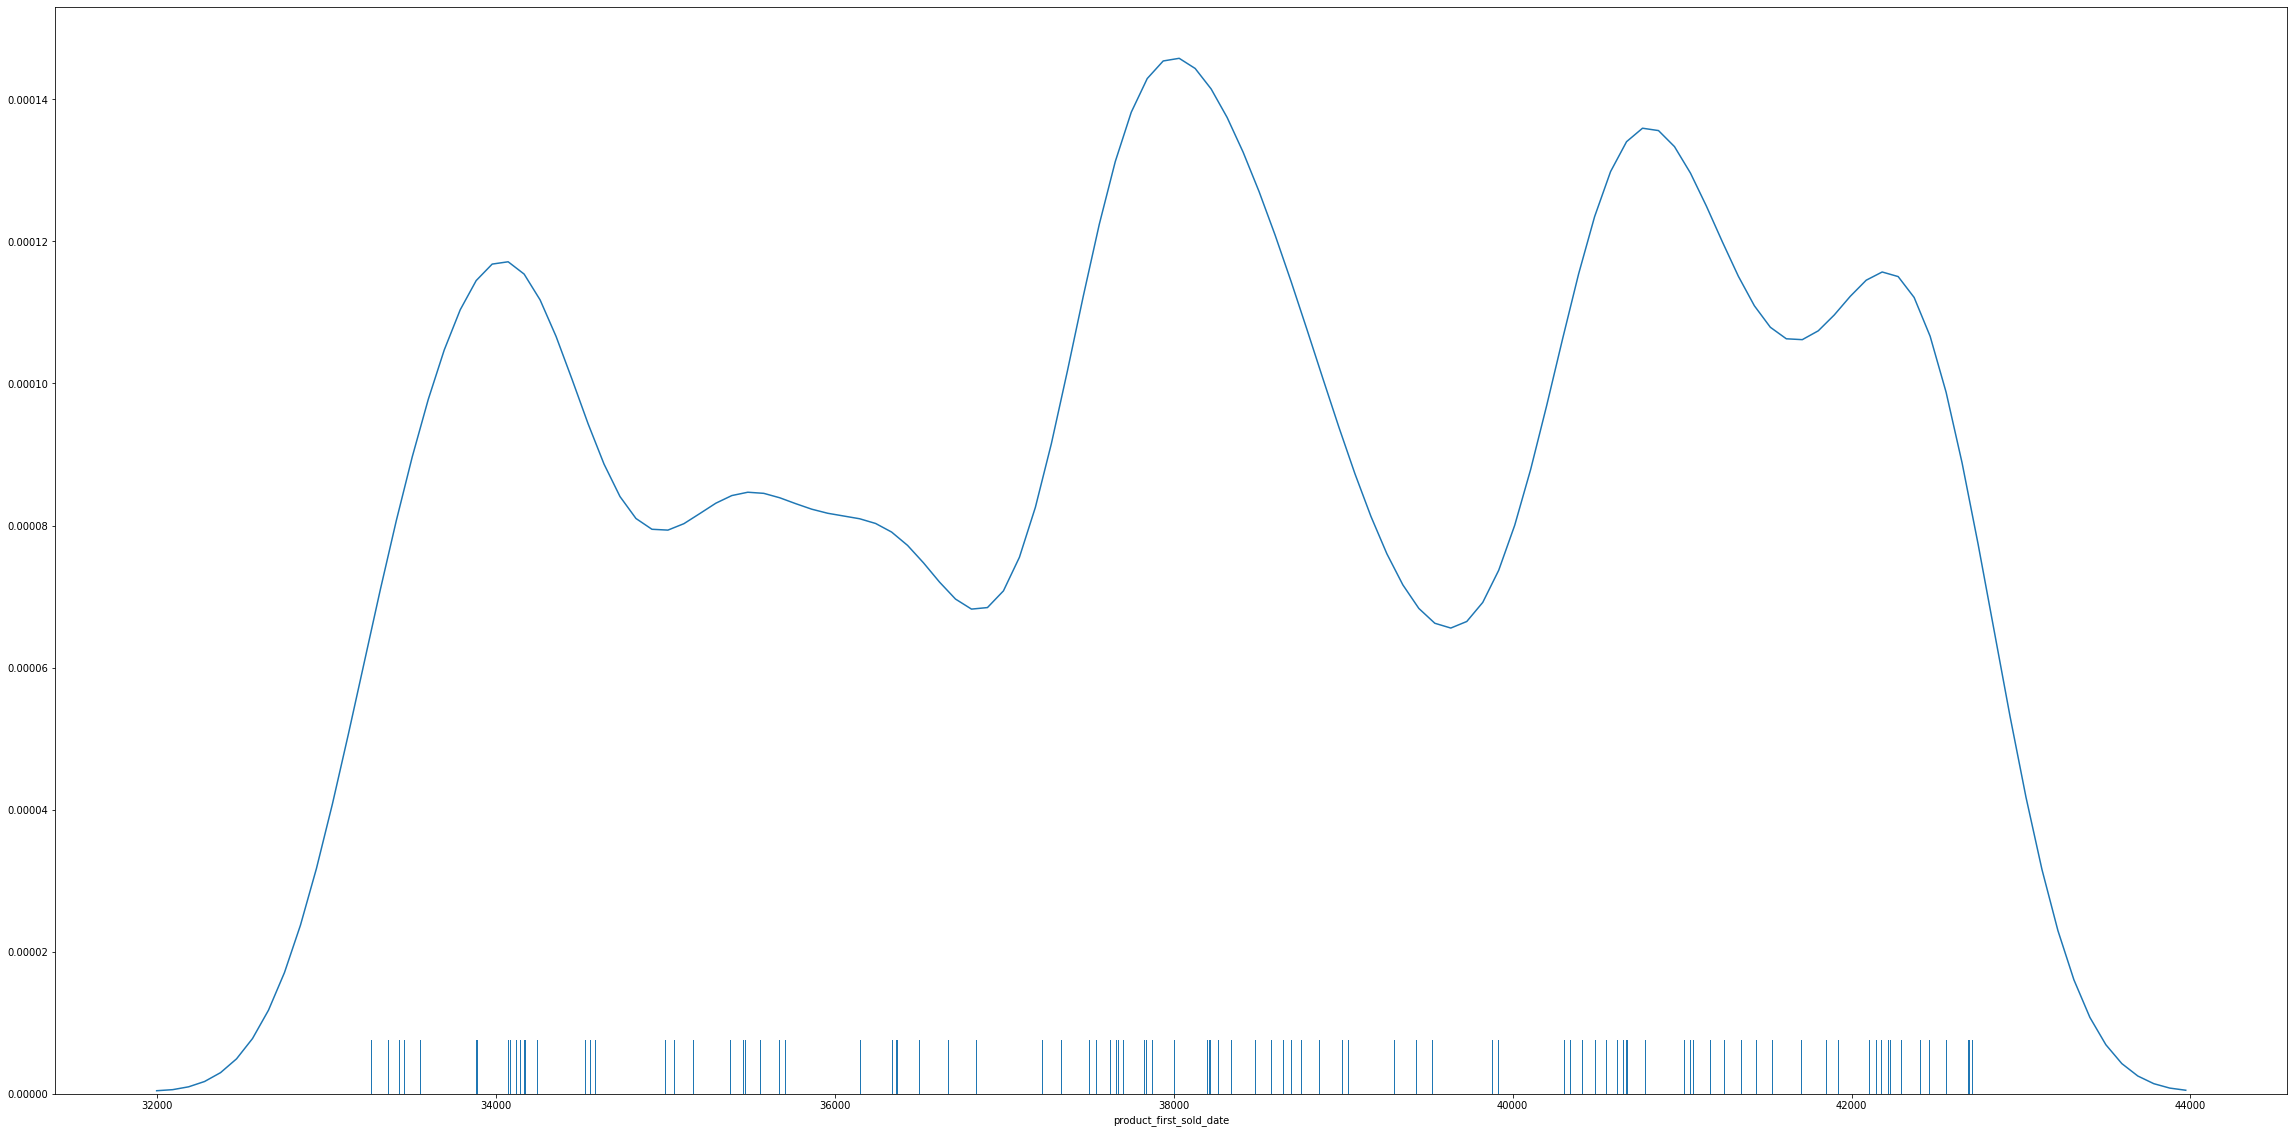

In [66]:
product_first_sold_date = Num_check(transactions, 'product_first_sold_date')

public_method_names = [method for method in dir(product_first_sold_date) if callable(getattr(product_first_sold_date, method)) if not method.startswith('_')]  # 'private' methods start from _
for method in public_method_names:
    getattr(product_first_sold_date, method)()  # call

In [67]:
transactions.product_first_sold_date.unique()

array([41245., 41701., 36361., 36145., 42226., 39031., 34165., 39915.,
       33455., 38216., 40784., 42172., 34527., 34586., 38193., 37873.,
       38206., 33888., 37337., 36334., 42145., 42404., 34079., 41047.,
       42560., 42710., 41922., 37539., 42688., 38991., 38647., 37874.,
       34996., 33549., 38693., 37668., 41533., 41009., 40553., 39427.,
       38482., 35470., 41434., 36367., 38750., 41848., 34244., 42696.,
       38258., 41167., 40672., 35707., 42295., 33552., 35667., 33879.,
       40670., 37626., 38339., 40303., 34143., 35160., 36668., 36498.,
       34071., 40649., 37823., 36146., 42105., 34115., 35052., 33364.,
       42218., 41345., 33429., 38859.,    nan, 36833., 37499., 41064.,
       33259., 35560., 37838., 37698., 35378., 38573., 38002., 39526.,
       39880., 40487., 40336., 40618., 34170., 40410., 42458., 39298.,
       35455., 37220., 37659., 40779., 34556.])

---

# Check customer_id relation
Checking all the customer ids in customer address & transcations are also in the customer main file (customer geographic).

In [68]:
custid_main = custdemo.customer_id.unique().tolist()
len(custid_main)

4000

In [69]:
custid_add = custadd.customer_id.unique().tolist()
[x for x in custid_add if x not in custid_main]

[4001, 4002, 4003]

In [70]:
custid_trans = transactions.customer_id.unique().tolist()
[x for x in custid_trans if x not in custid_main]

[5034]

### Problem Summary - customerid
| Problem  | Solution  |   
|---|---|
|4 ids are not in the customer deographic file (4001,4002,4003,5034)| check with the client|